In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("train.csv")

In [5]:
df.head(20)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,47000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,105000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(max_cols=1216)

# Select columns by index (yaha par bureau ka naya df banaya hai)
column_indices = list(range(667,1118))  # Example: Select columns from index 10 to 29
df_bureau = df.iloc[:, column_indices]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Data columns (total 1216 columns):
 #     Column                     Non-Null Count  Dtype  
---    ------                     --------------  -----  
 0     account_number             96806 non-null  int64  
 1     bad_flag                   96806 non-null  int64  
 2     onus_attribute_1           71575 non-null  float64
 3     transaction_attribute_1    71575 non-null  float64
 4     transaction_attribute_2    71575 non-null  float64
 5     transaction_attribute_3    71575 non-null  float64
 6     transaction_attribute_4    71575 non-null  float64
 7     transaction_attribute_5    71575 non-null  float64
 8     transaction_attribute_6    71575 non-null  float64
 9     transaction_attribute_7    71575 non-null  float64
 10    transaction_attribute_8    71575 non-null  float64
 11    transaction_attribute_9    71575 non-null  float64
 12    transaction_attribute_10   71575 non-null  float64
 13    transaction_

In [5]:
df_bureau.head()

,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,bureau_9,bureau_10,...,bureau_442,bureau_443,bureau_444,bureau_445,bureau_446,bureau_447,bureau_448,bureau_449,bureau_450,bureau_451
0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,22.0,0.0,...,0.206446,0.206446,NaN,NaN,NaN,NaN,NaN,NaN,0.221041,NaN
1,0.0,1.0,0.0,0.0,0.0,22.0,6.0,22.0,10.0,22.0,...,0.745607,0.781630,NaN,0.006293,NaN,NaN,NaN,1.0,0.777604,1.0
2,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,0.620168,0.056927,NaN,0.718144,NaN,NaN,NaN,NaN,0.235991,NaN
3,0.0,4.0,0.0,0.0,0.0,7.0,8.0,7.0,17.0,7.0,...,0.069228,0.086179,NaN,NaN,NaN,NaN,NaN,NaN,0.069228,NaN
4,1.0,0.0,4.0,0.0,0.0,0.0,18.0,5.0,18.0,5.0,...,0.063105,0.048779,NaN,NaN,NaN,NaN,NaN,NaN,0.063105,NaN


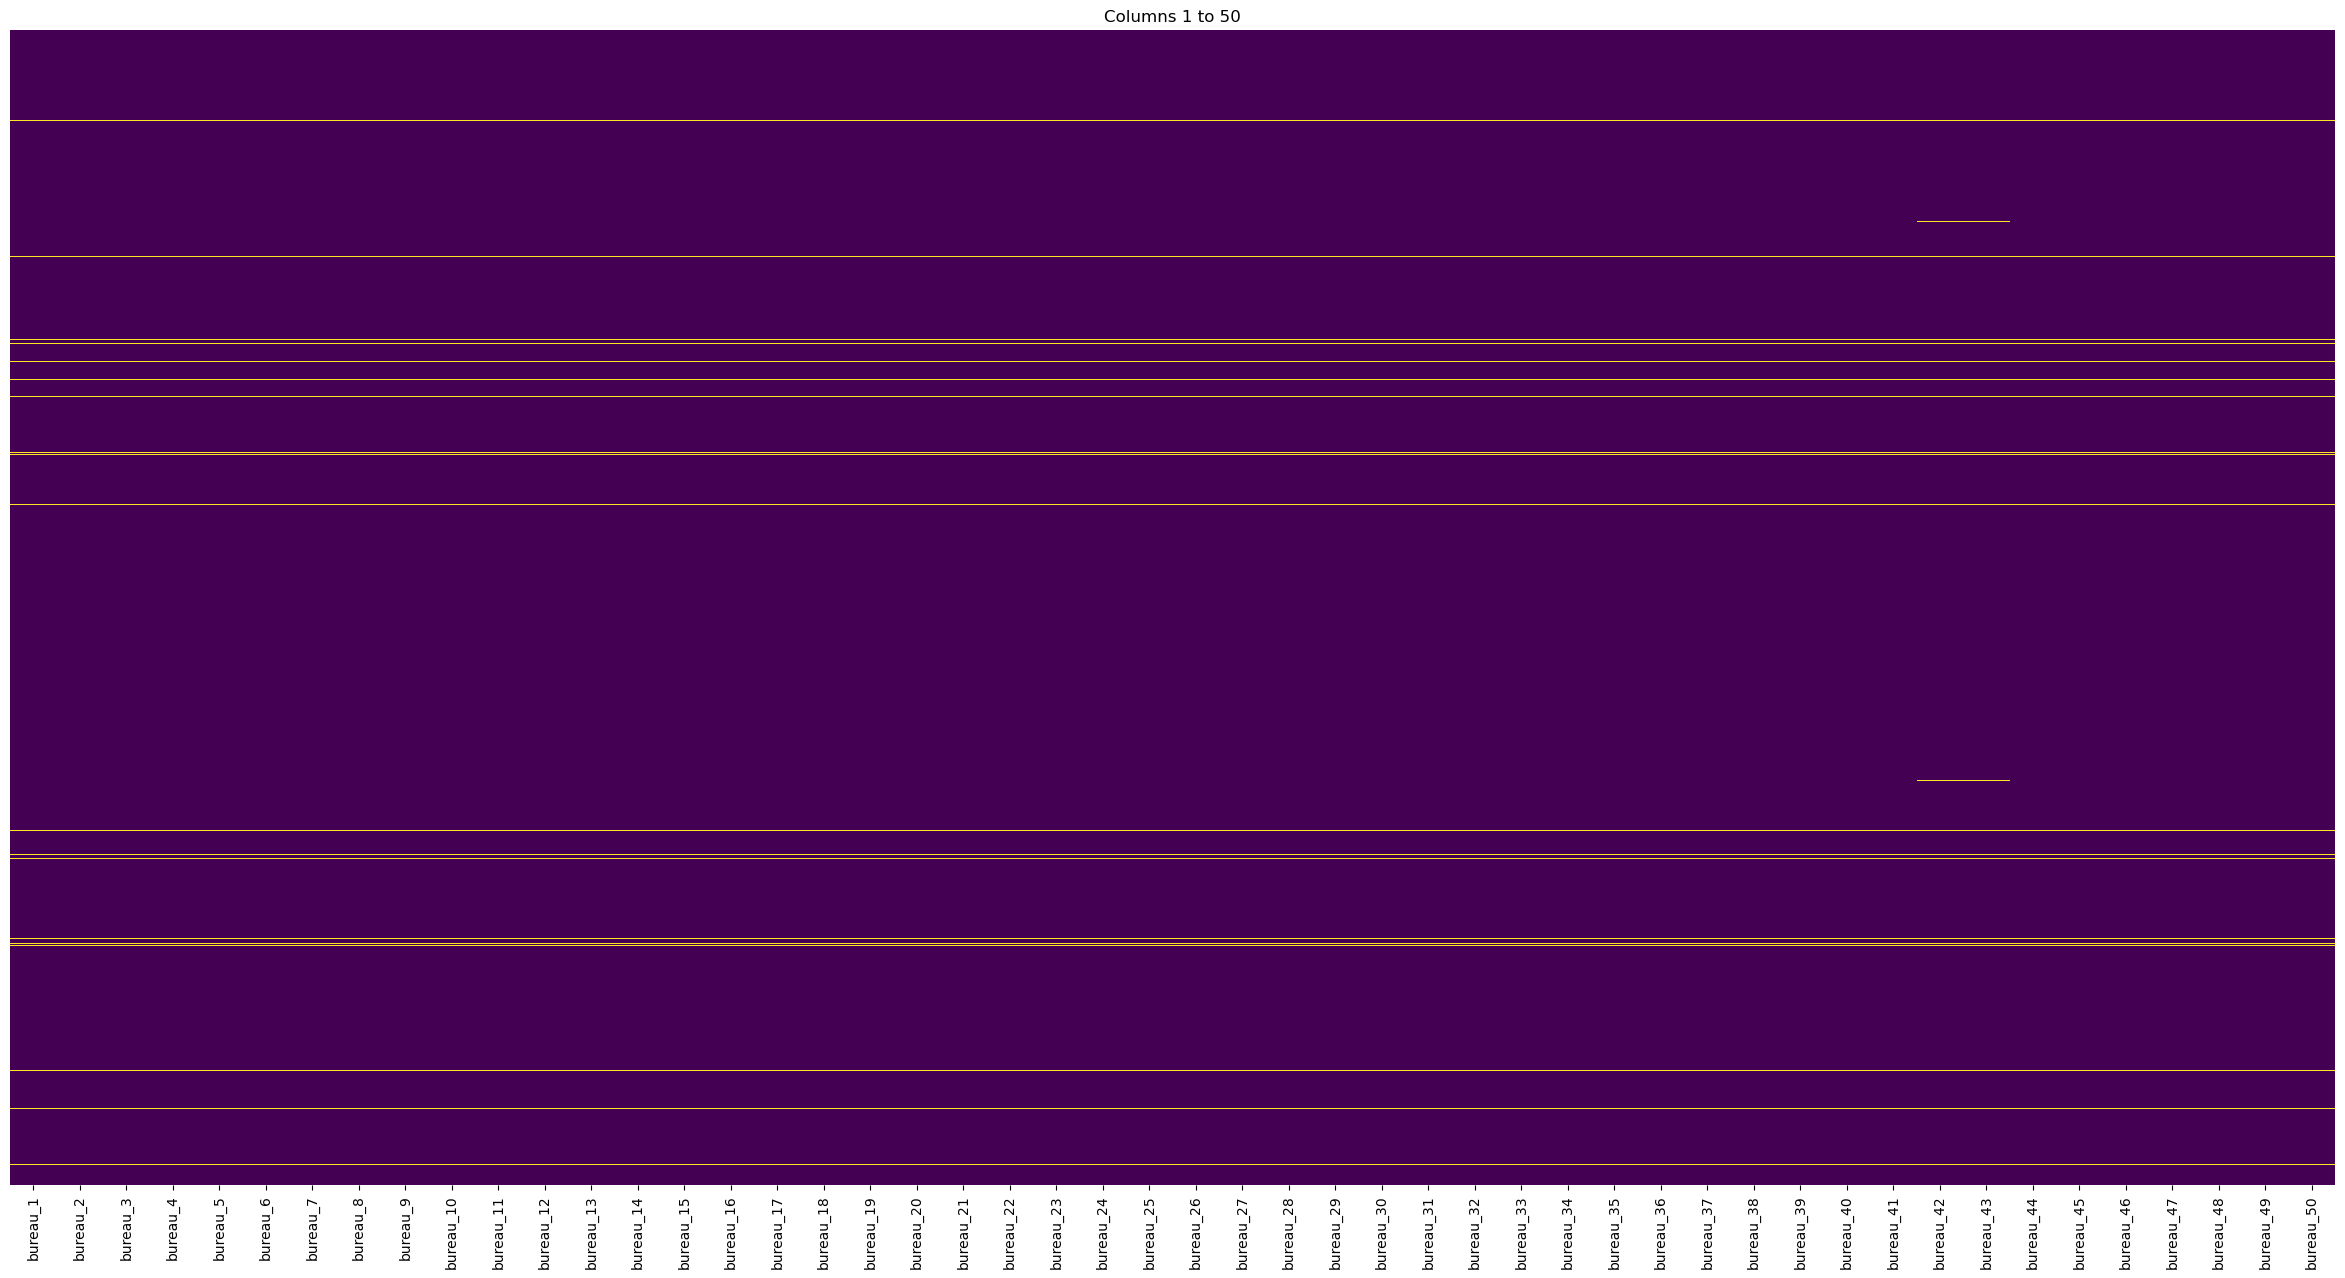

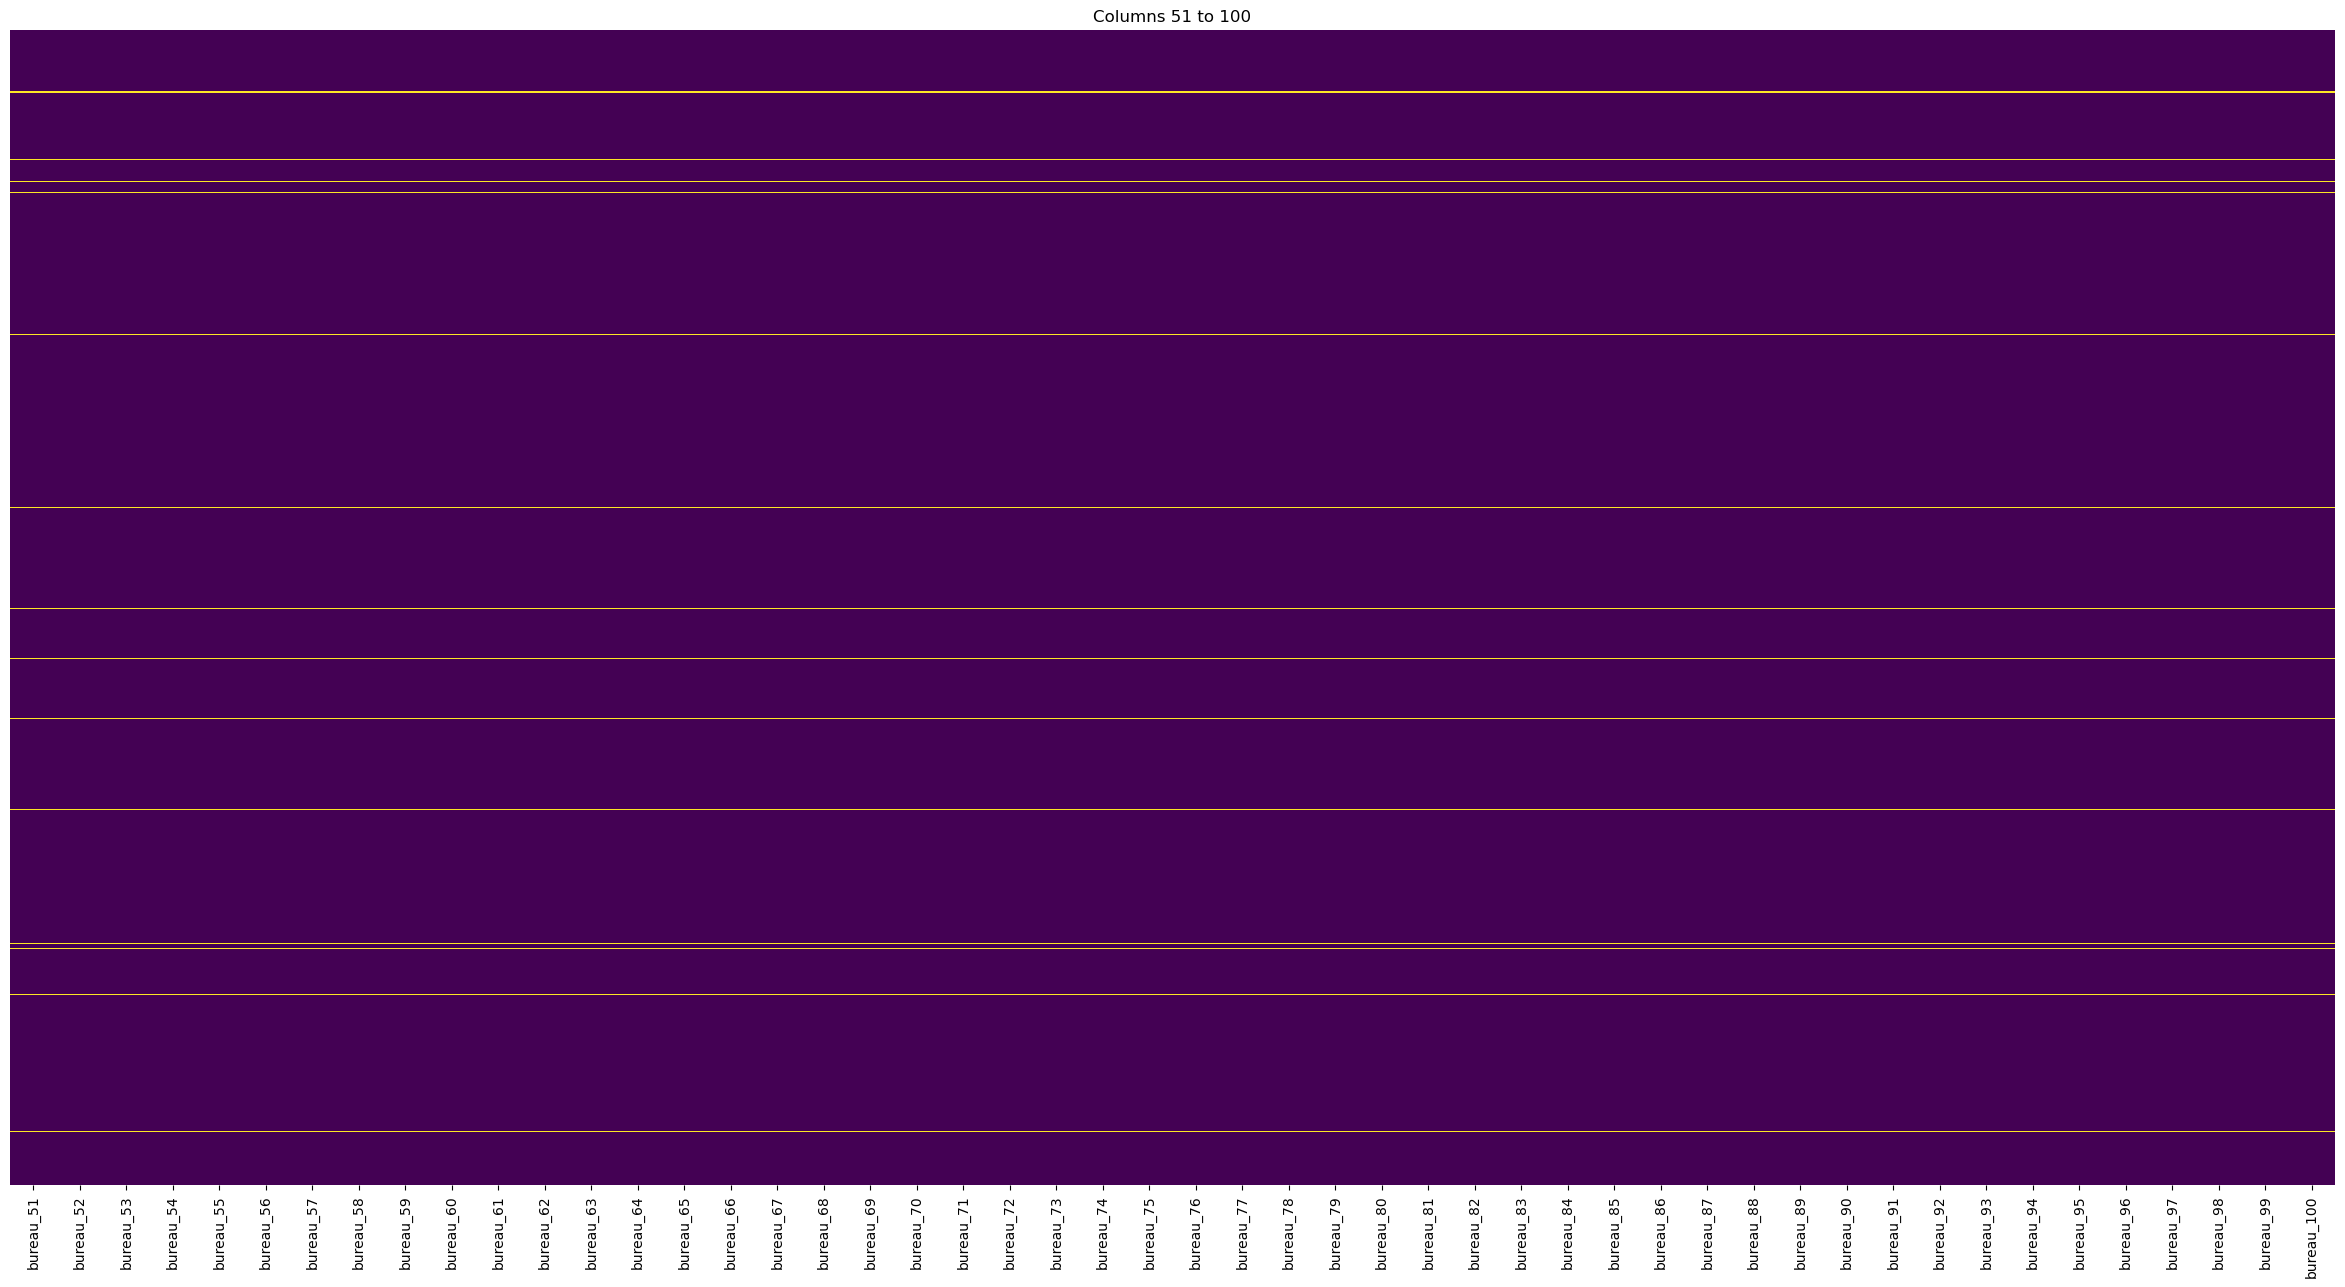

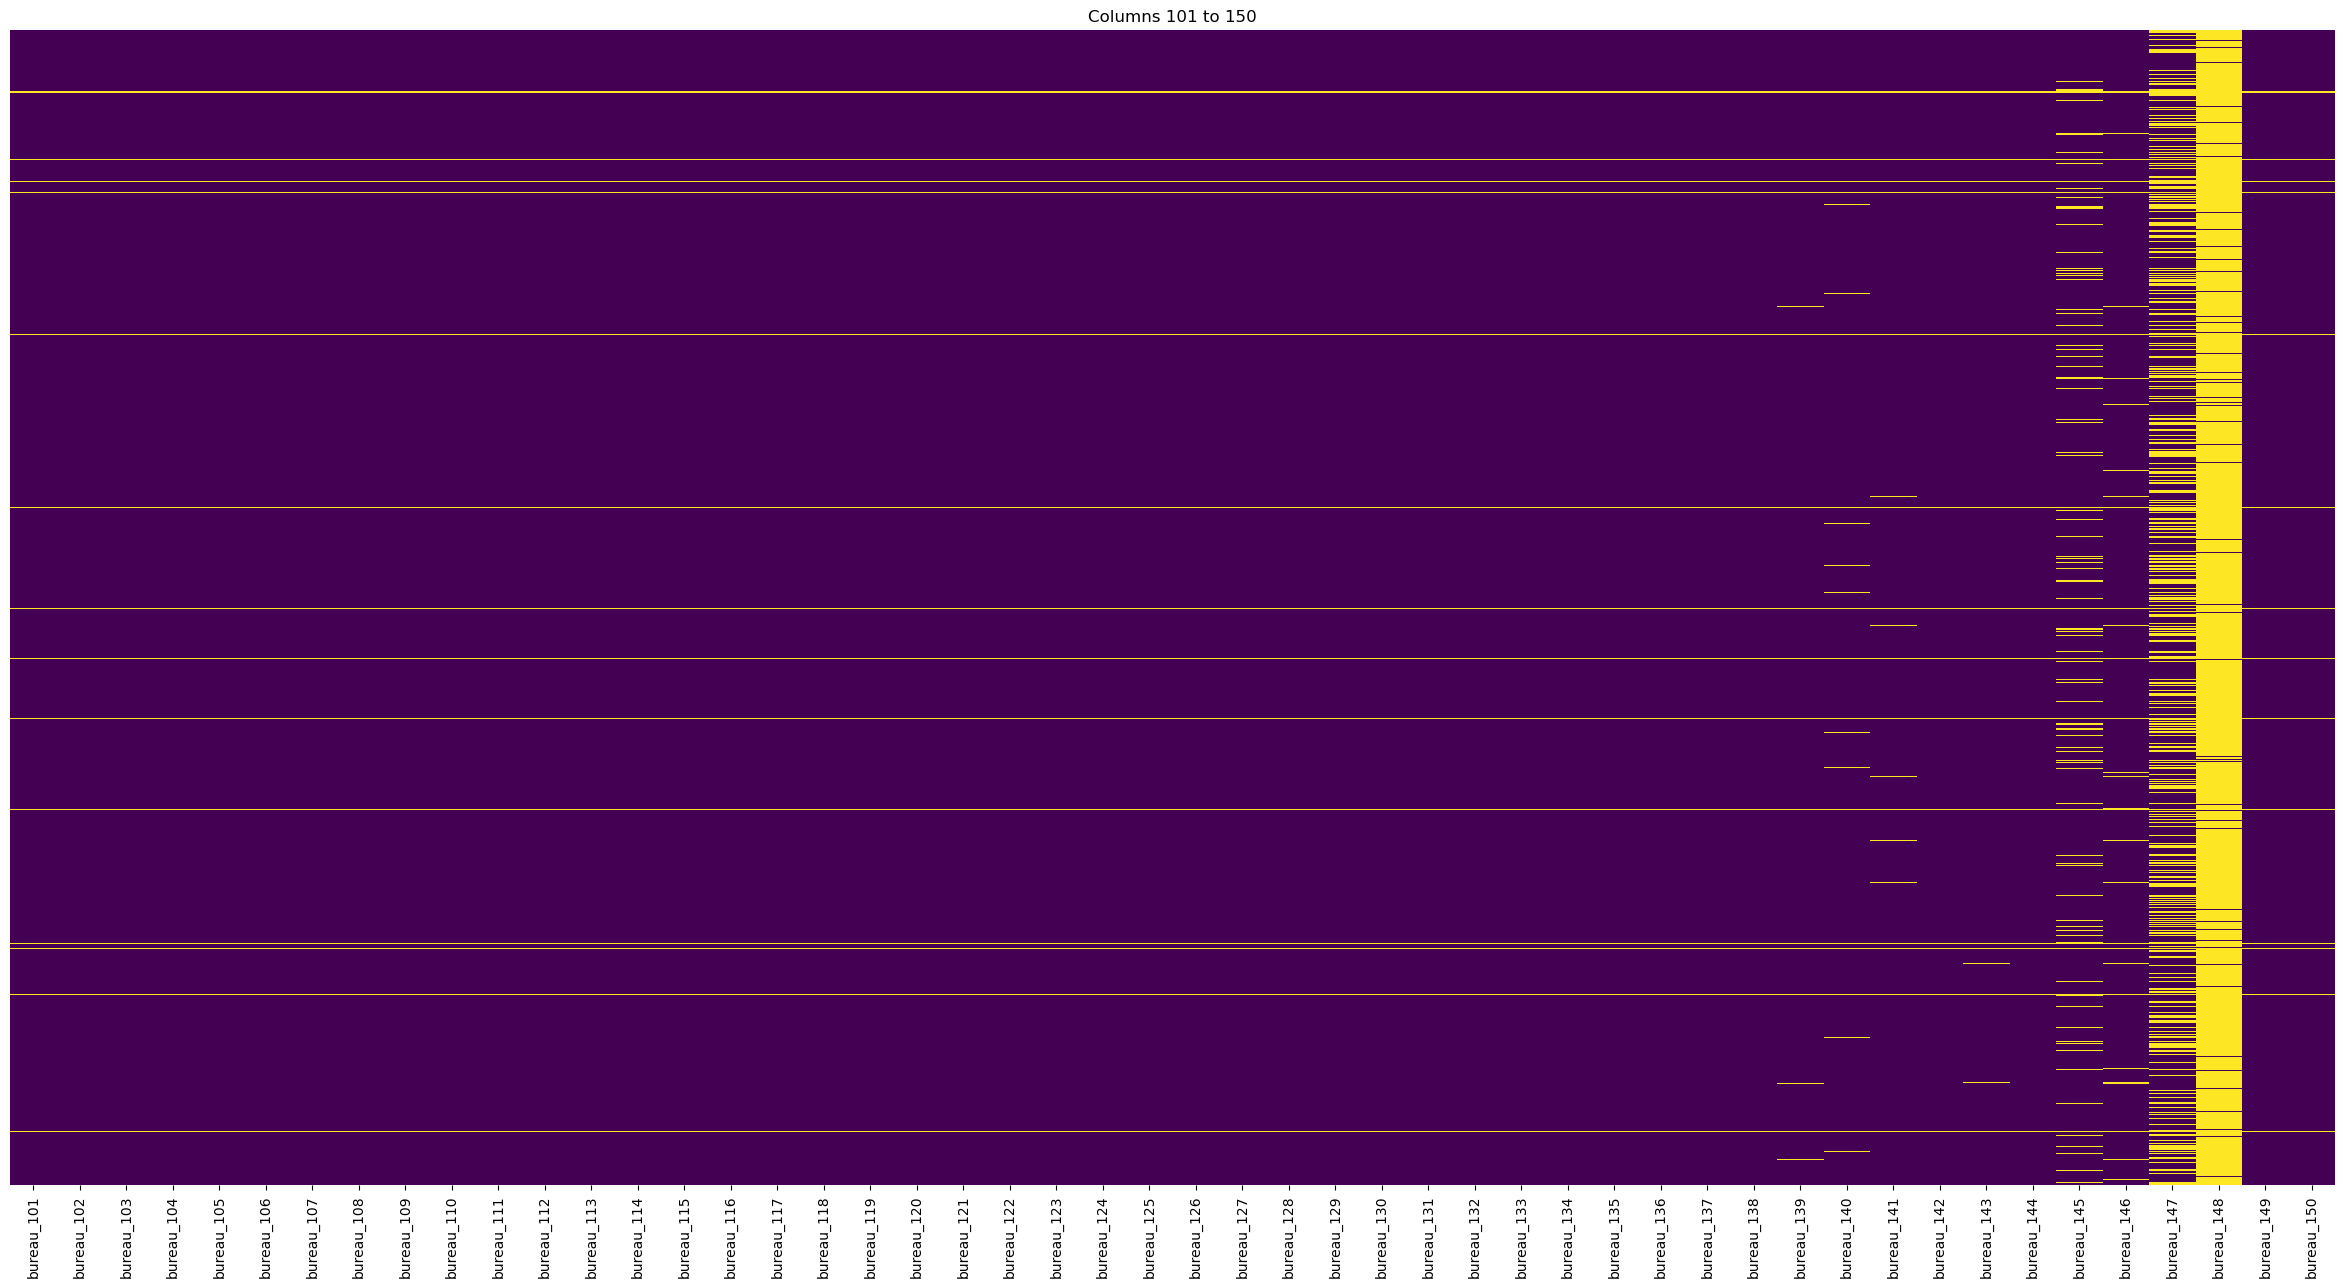

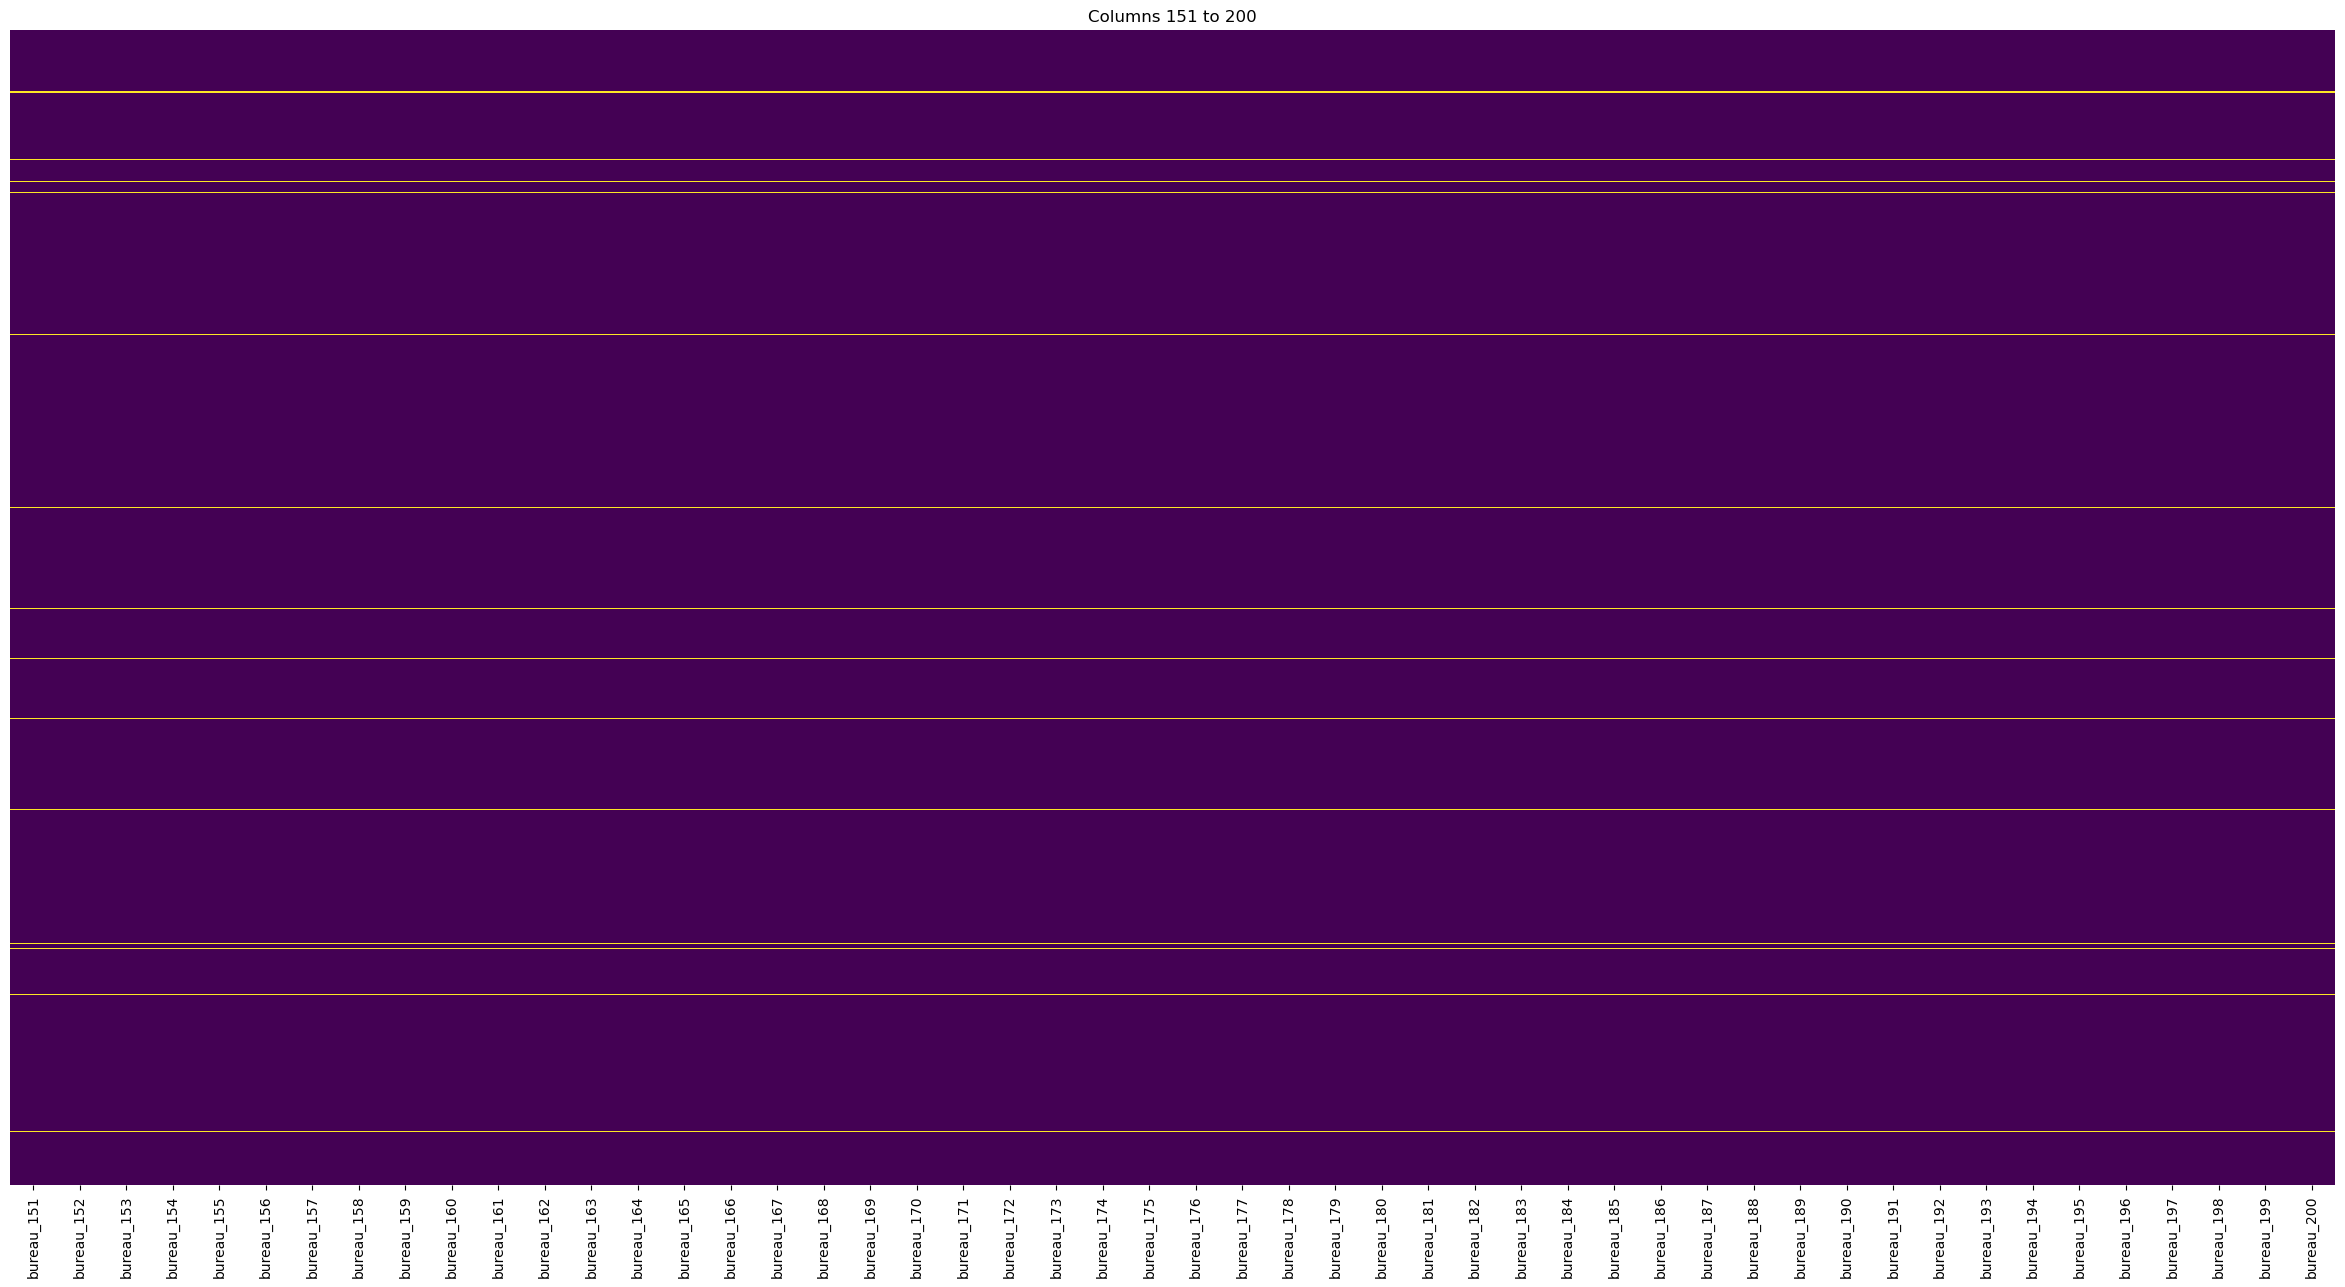

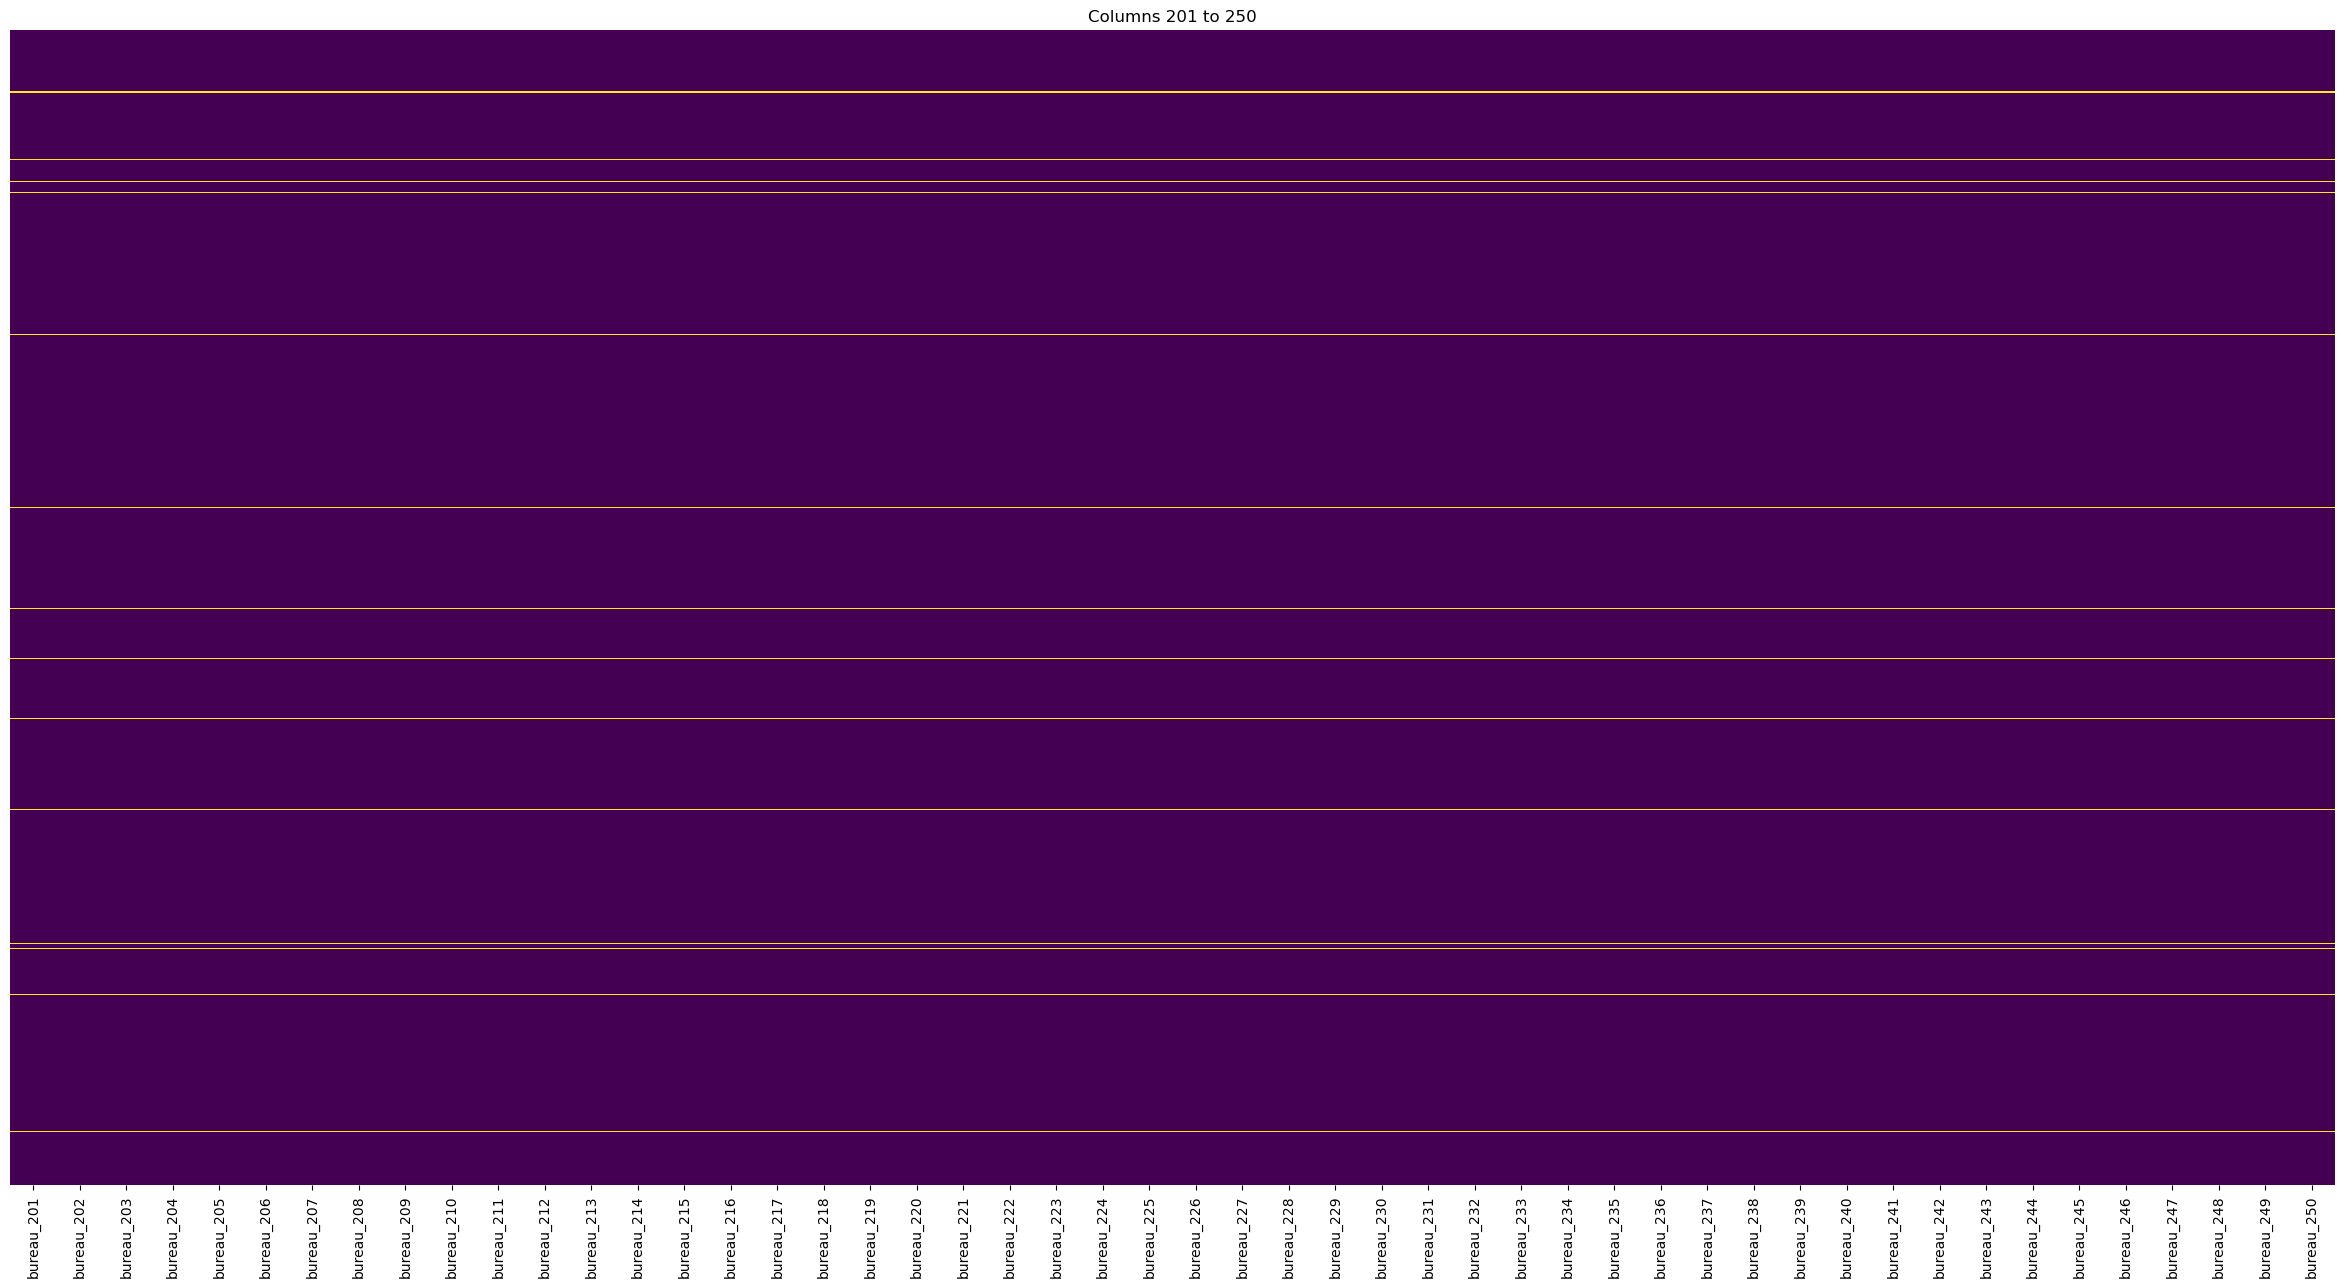

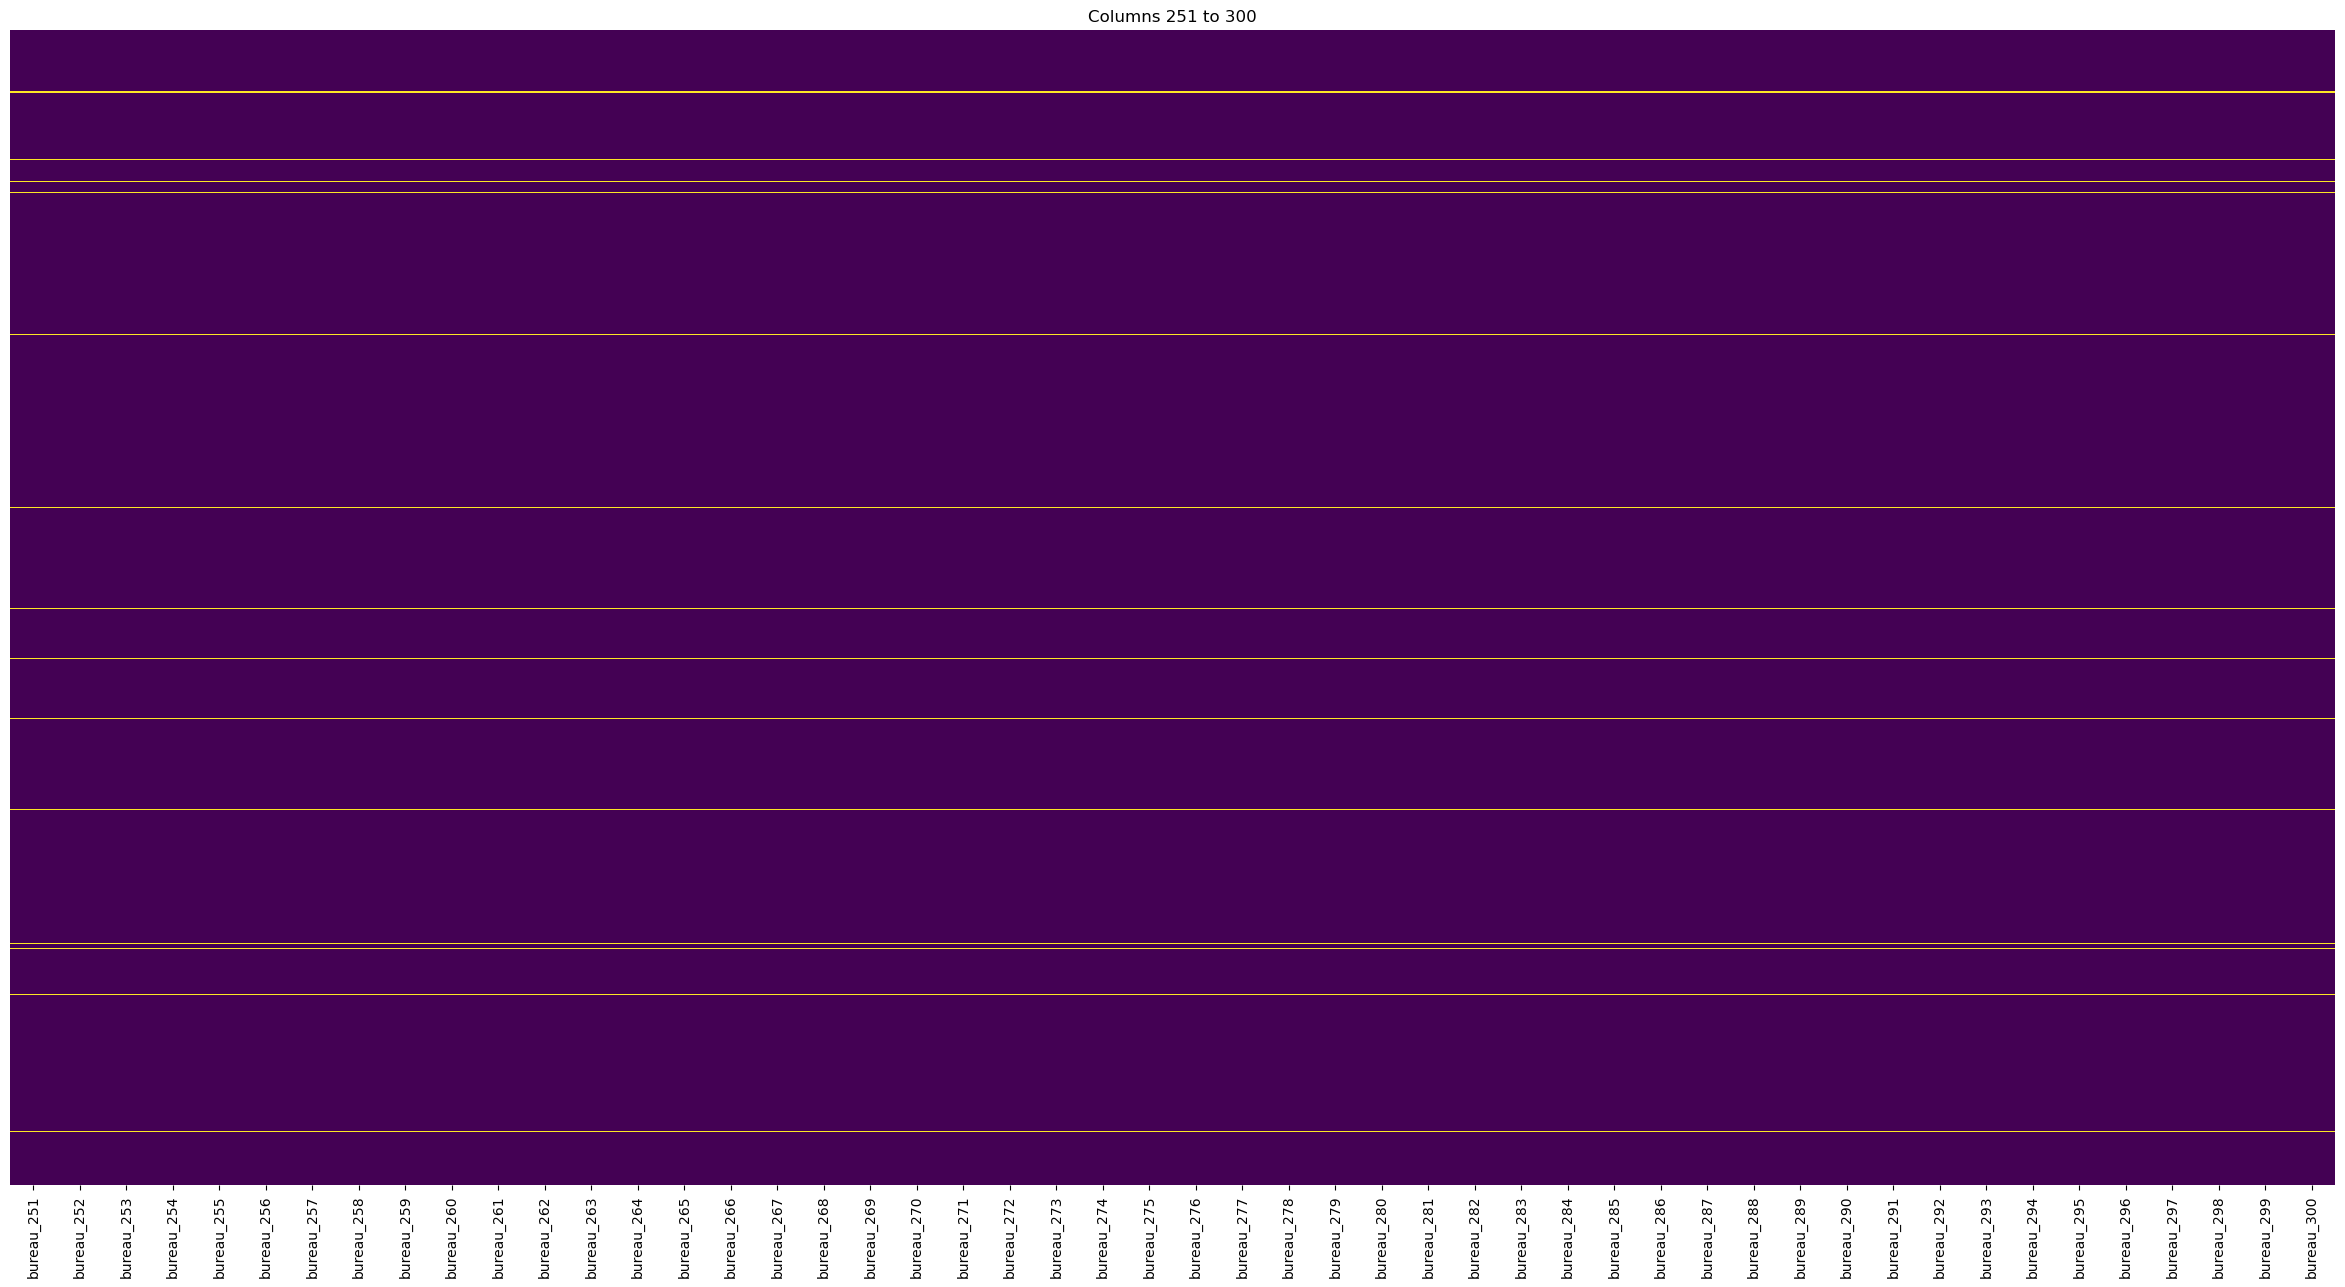

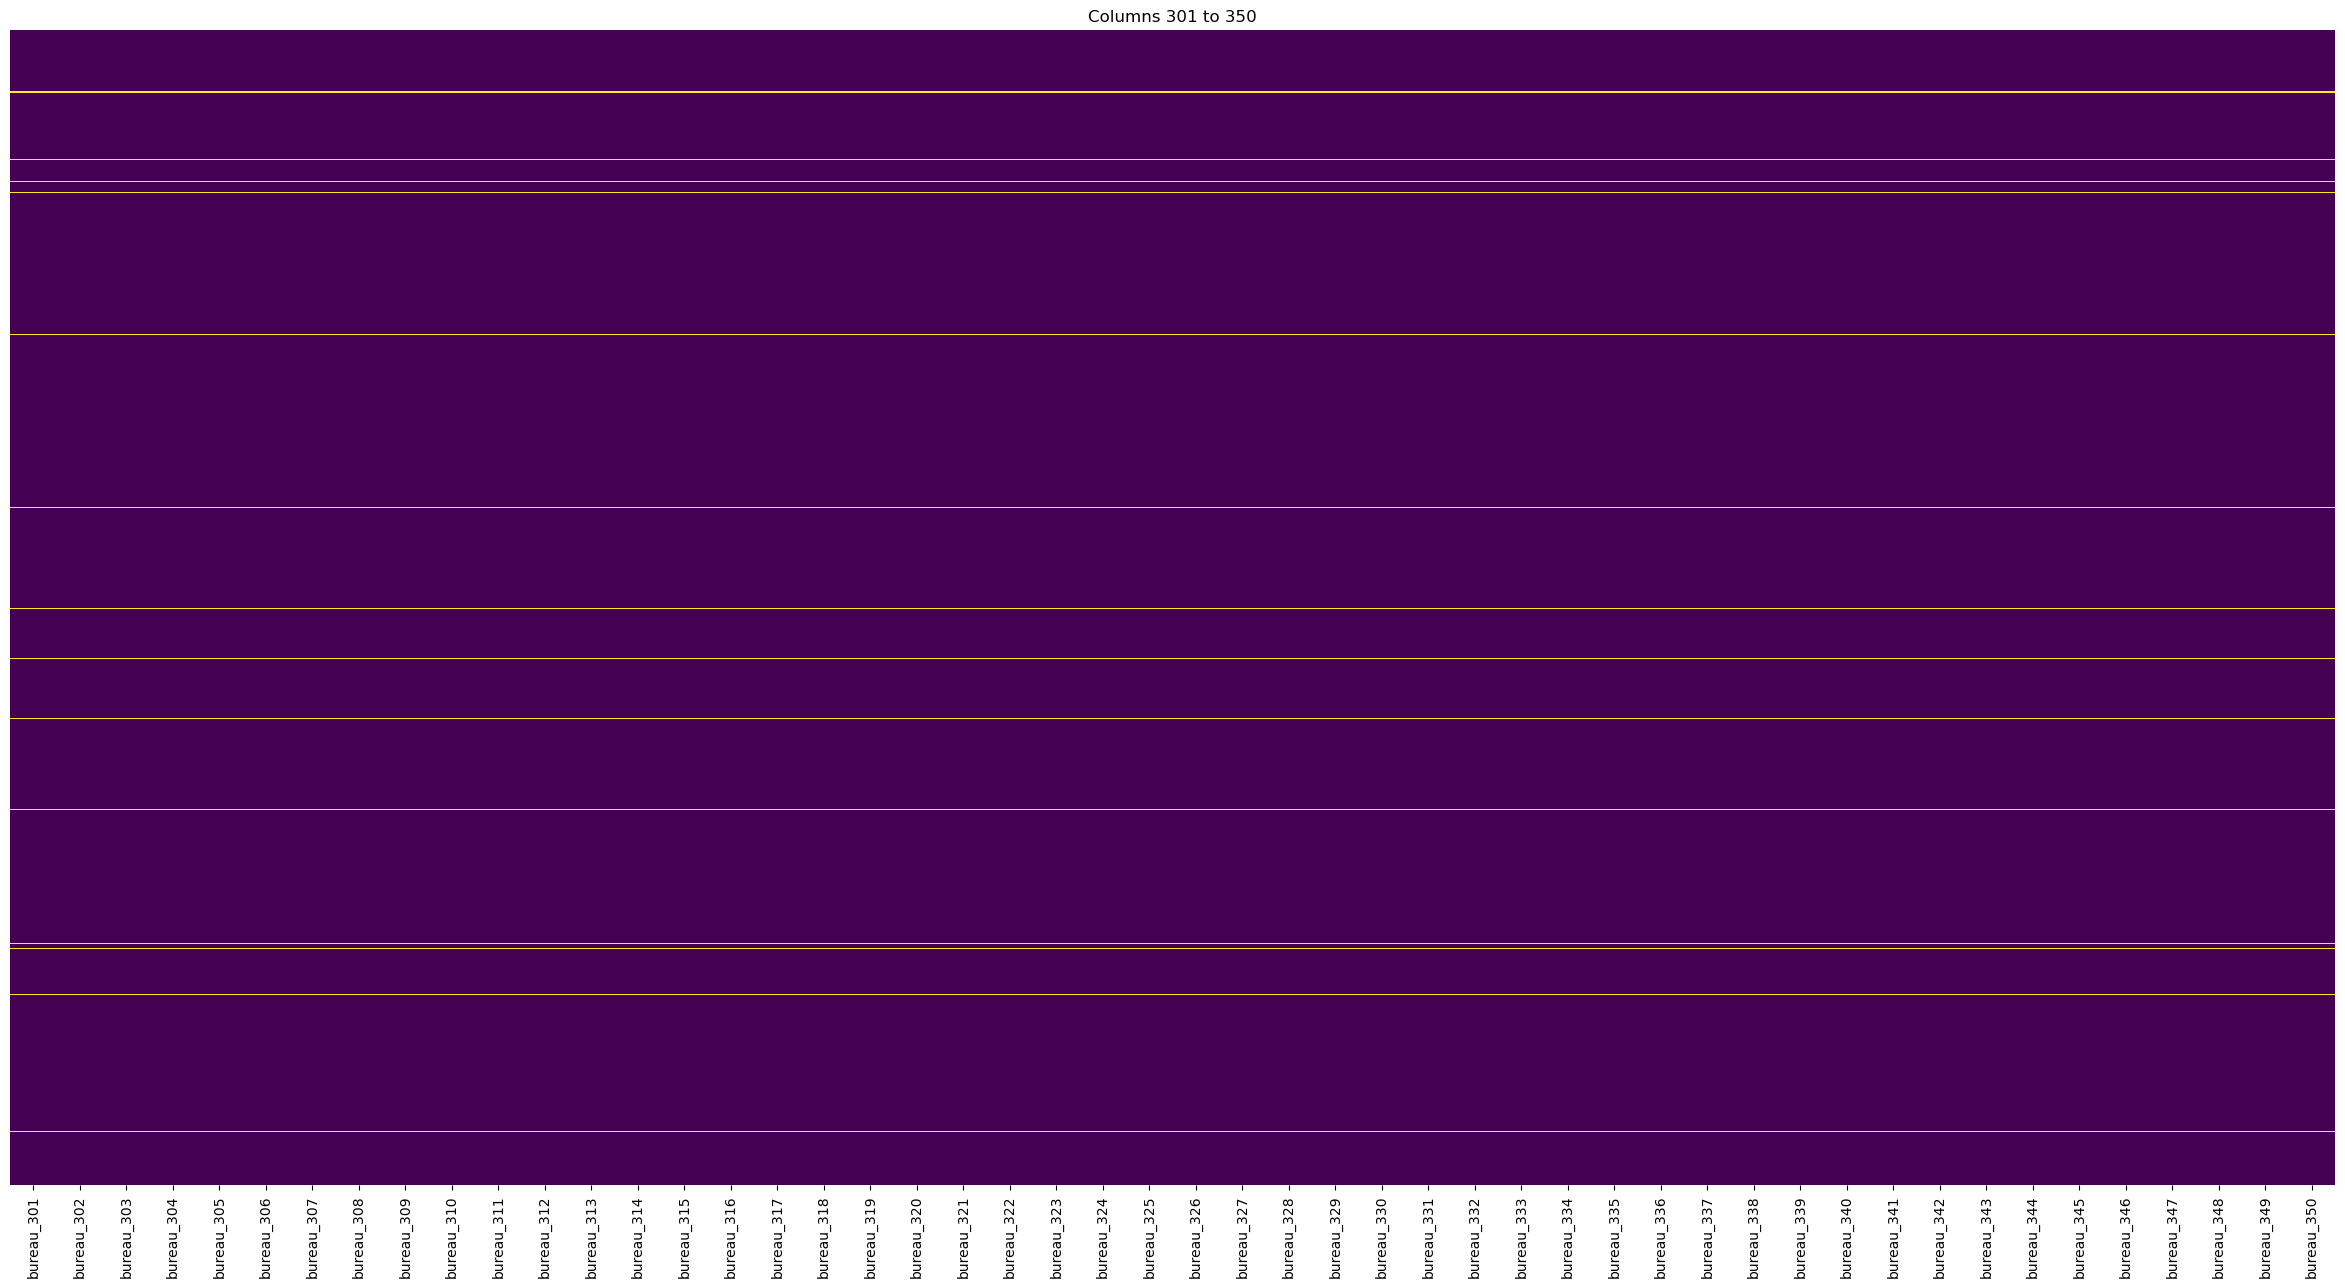

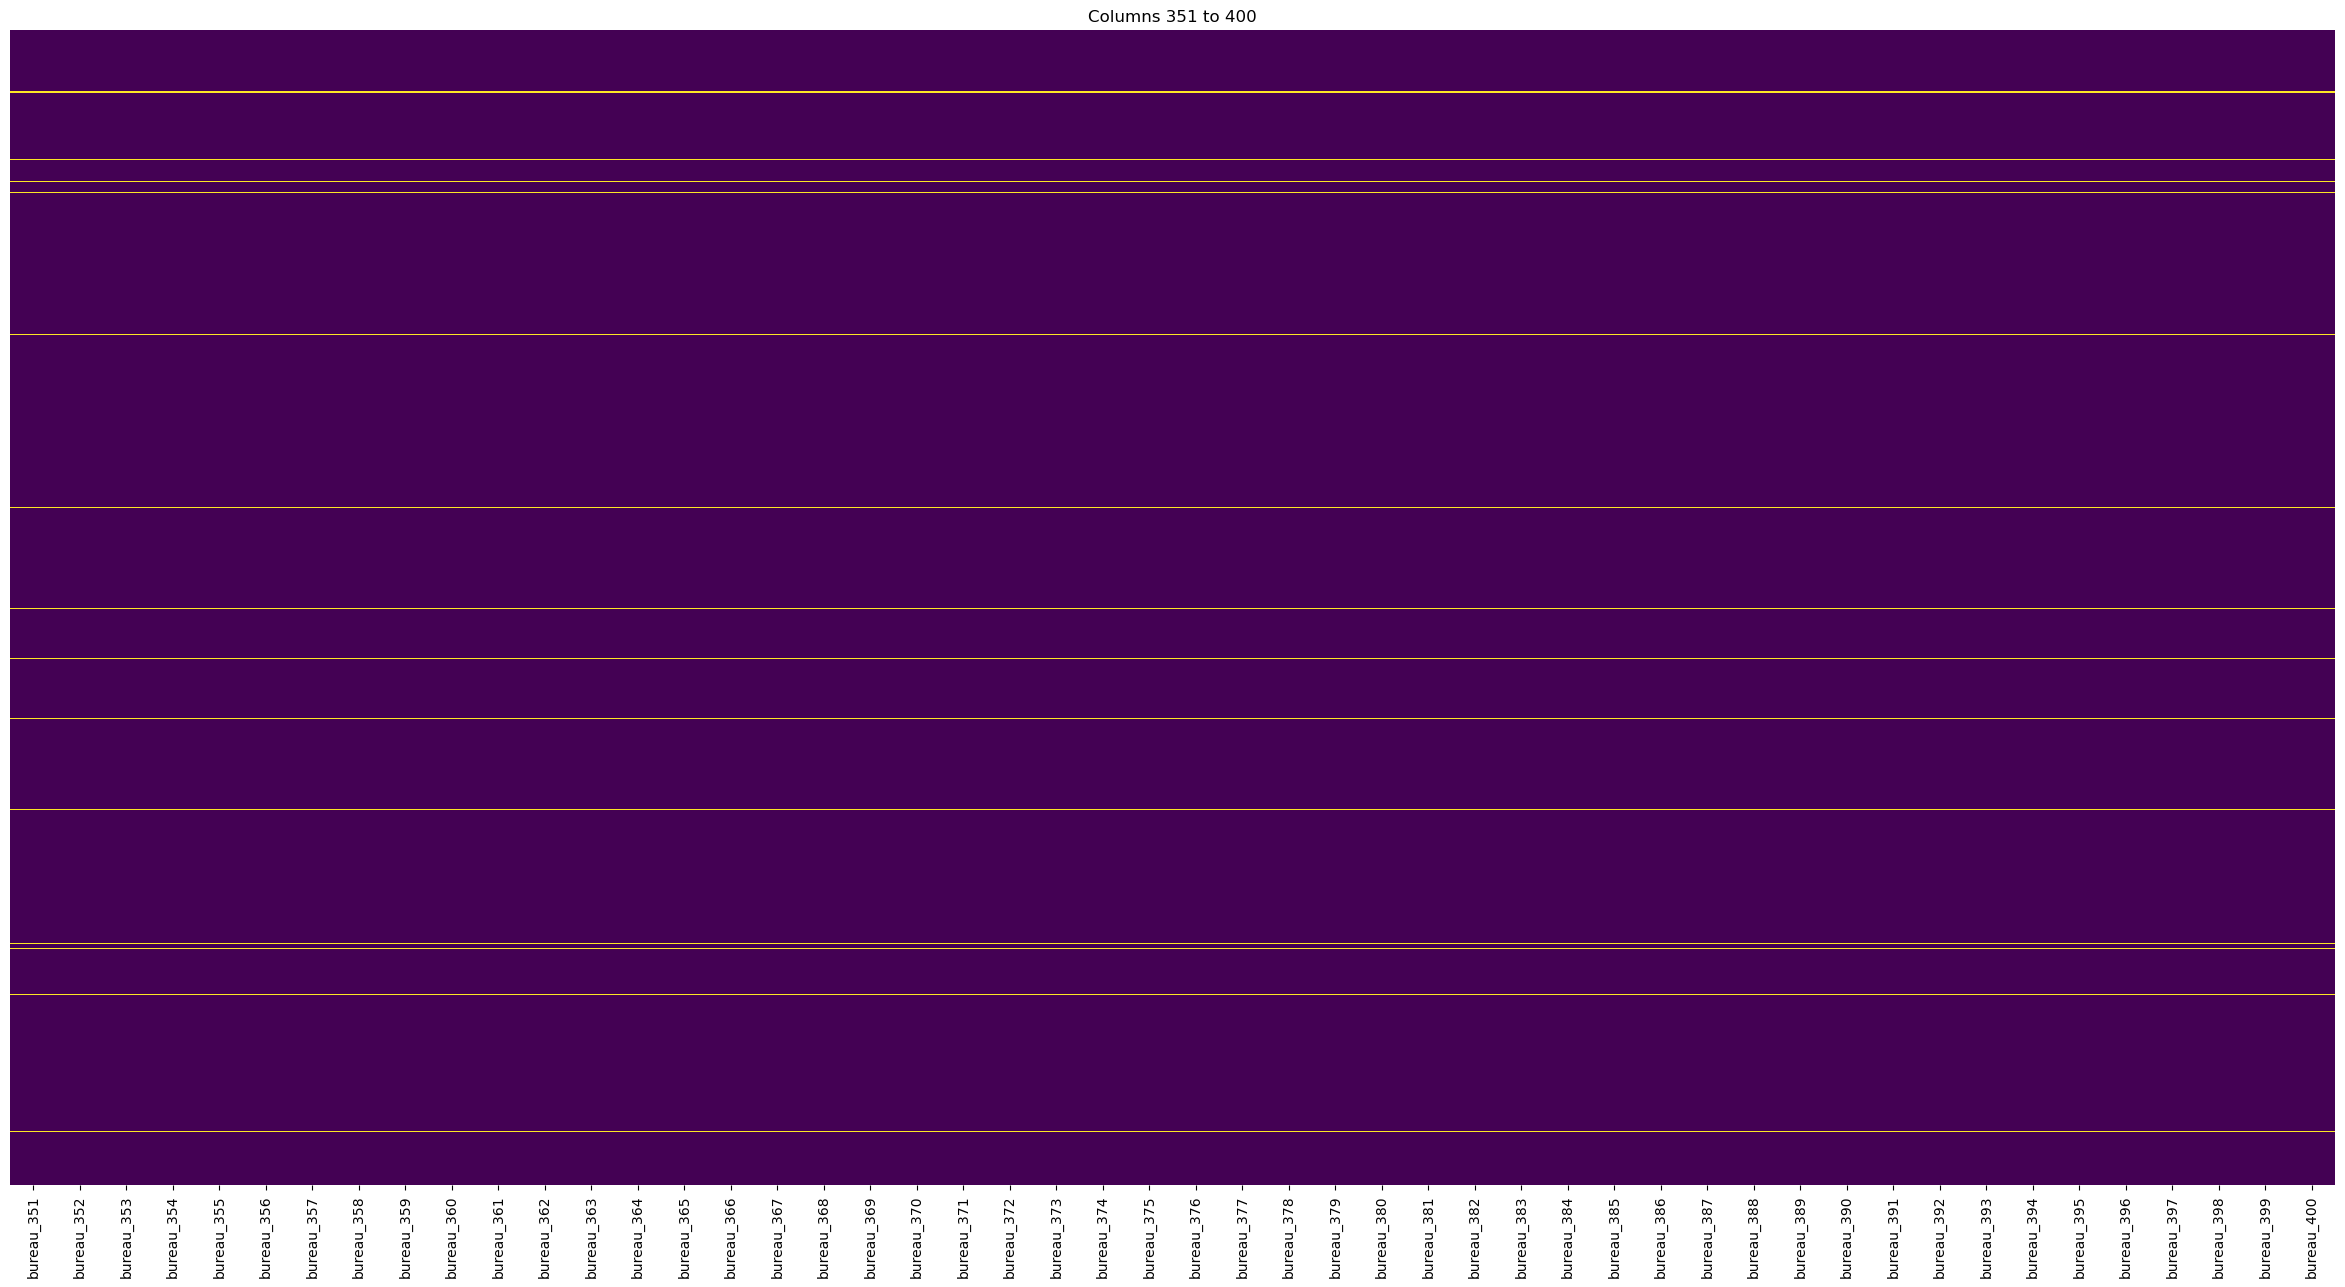

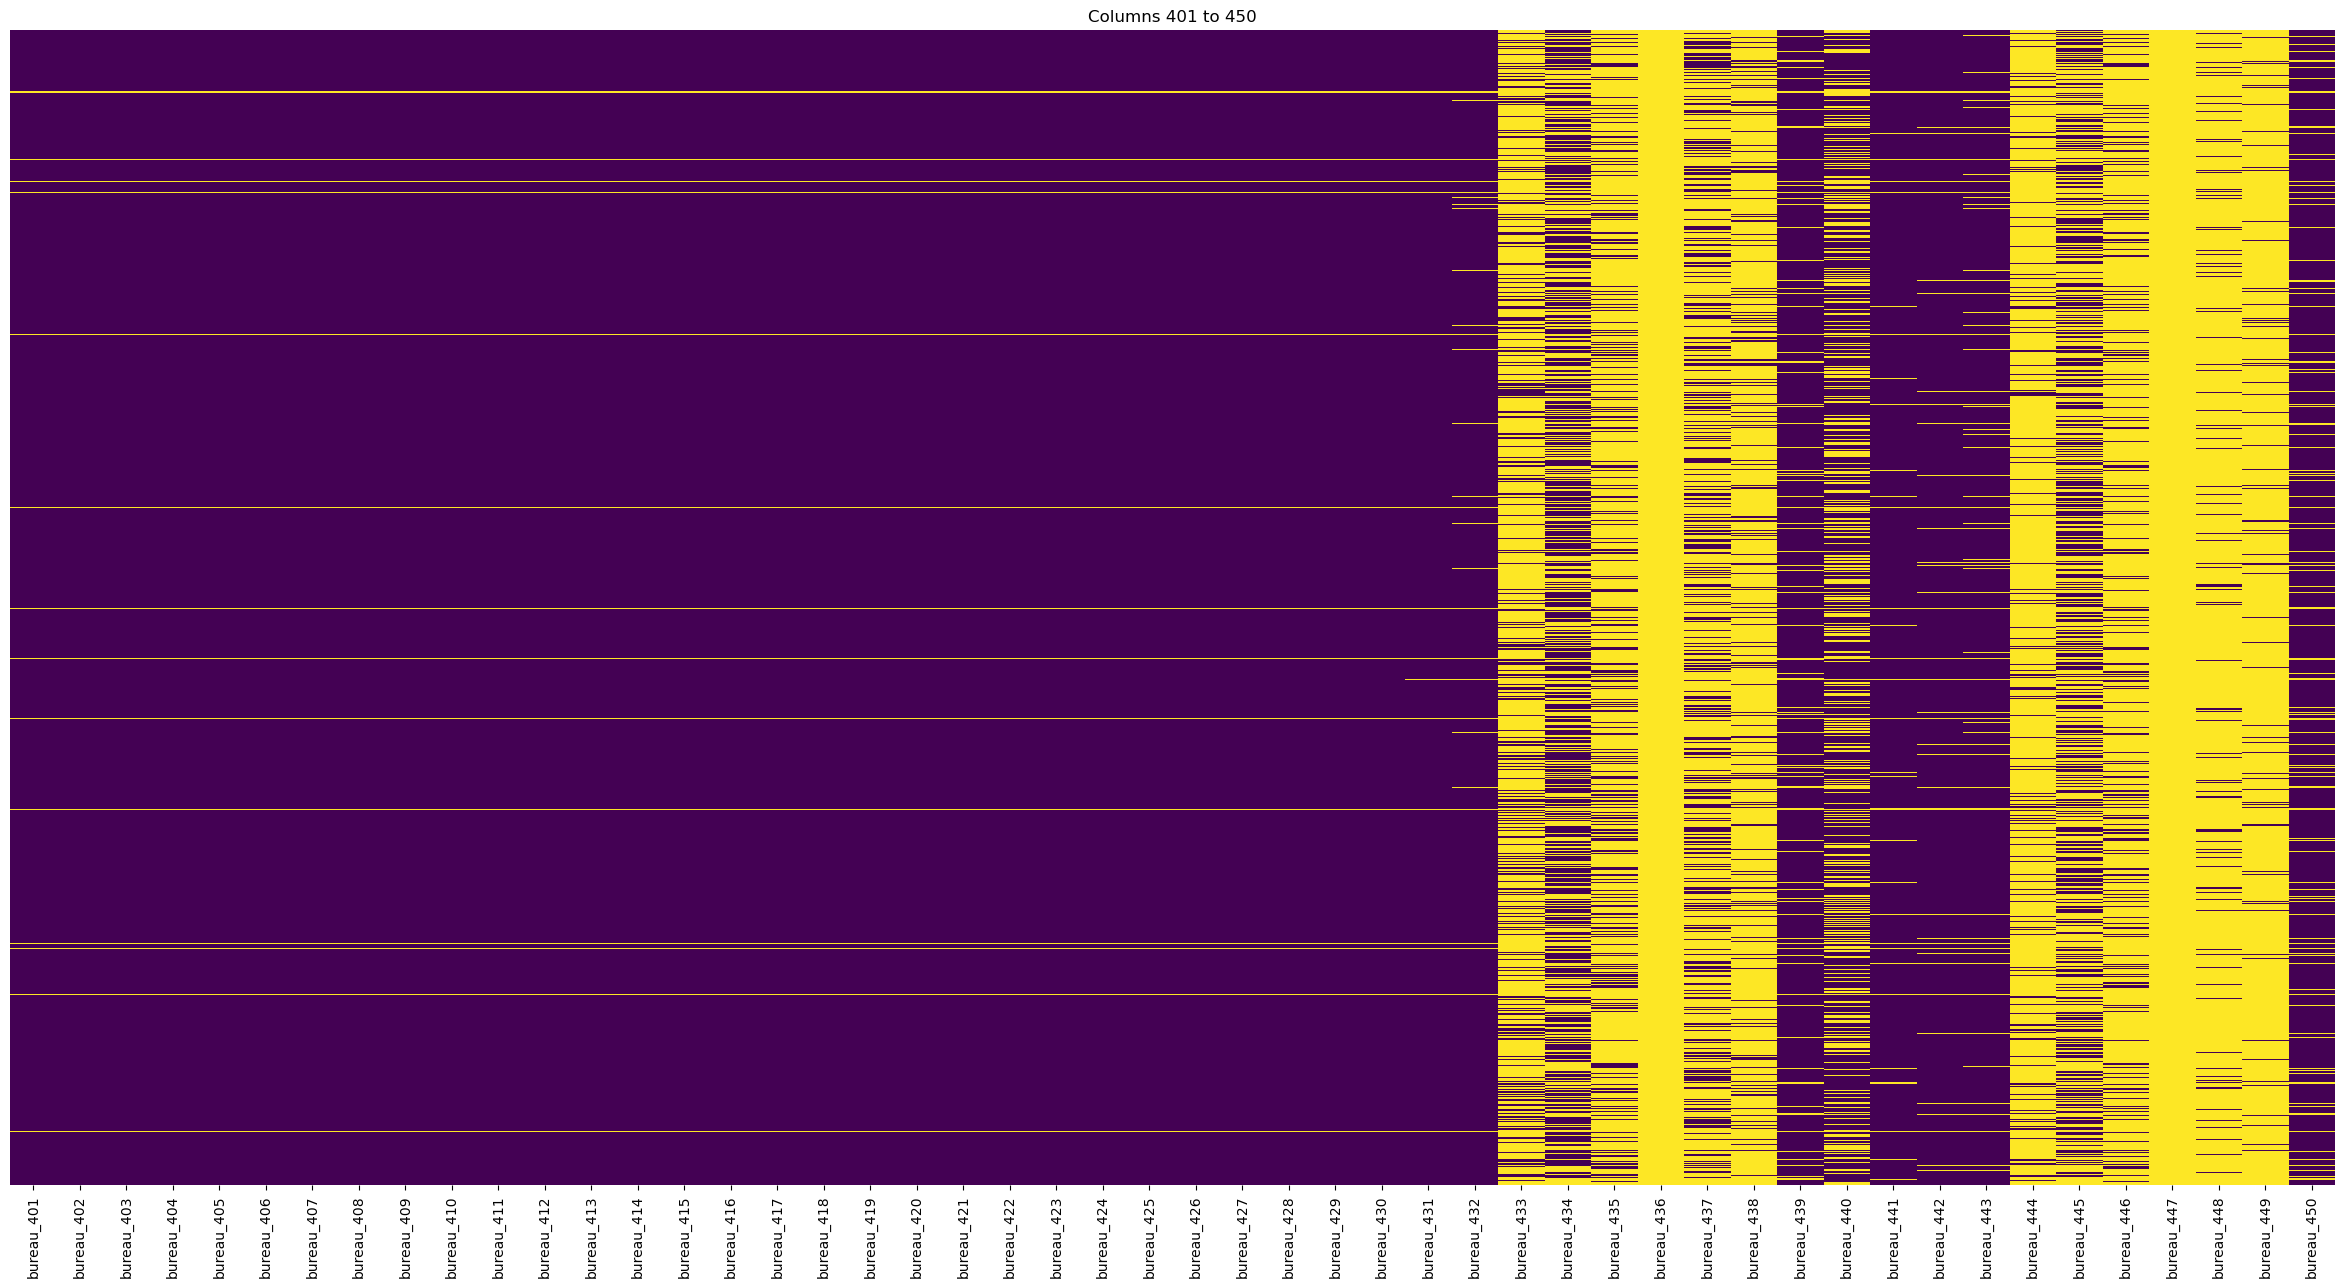

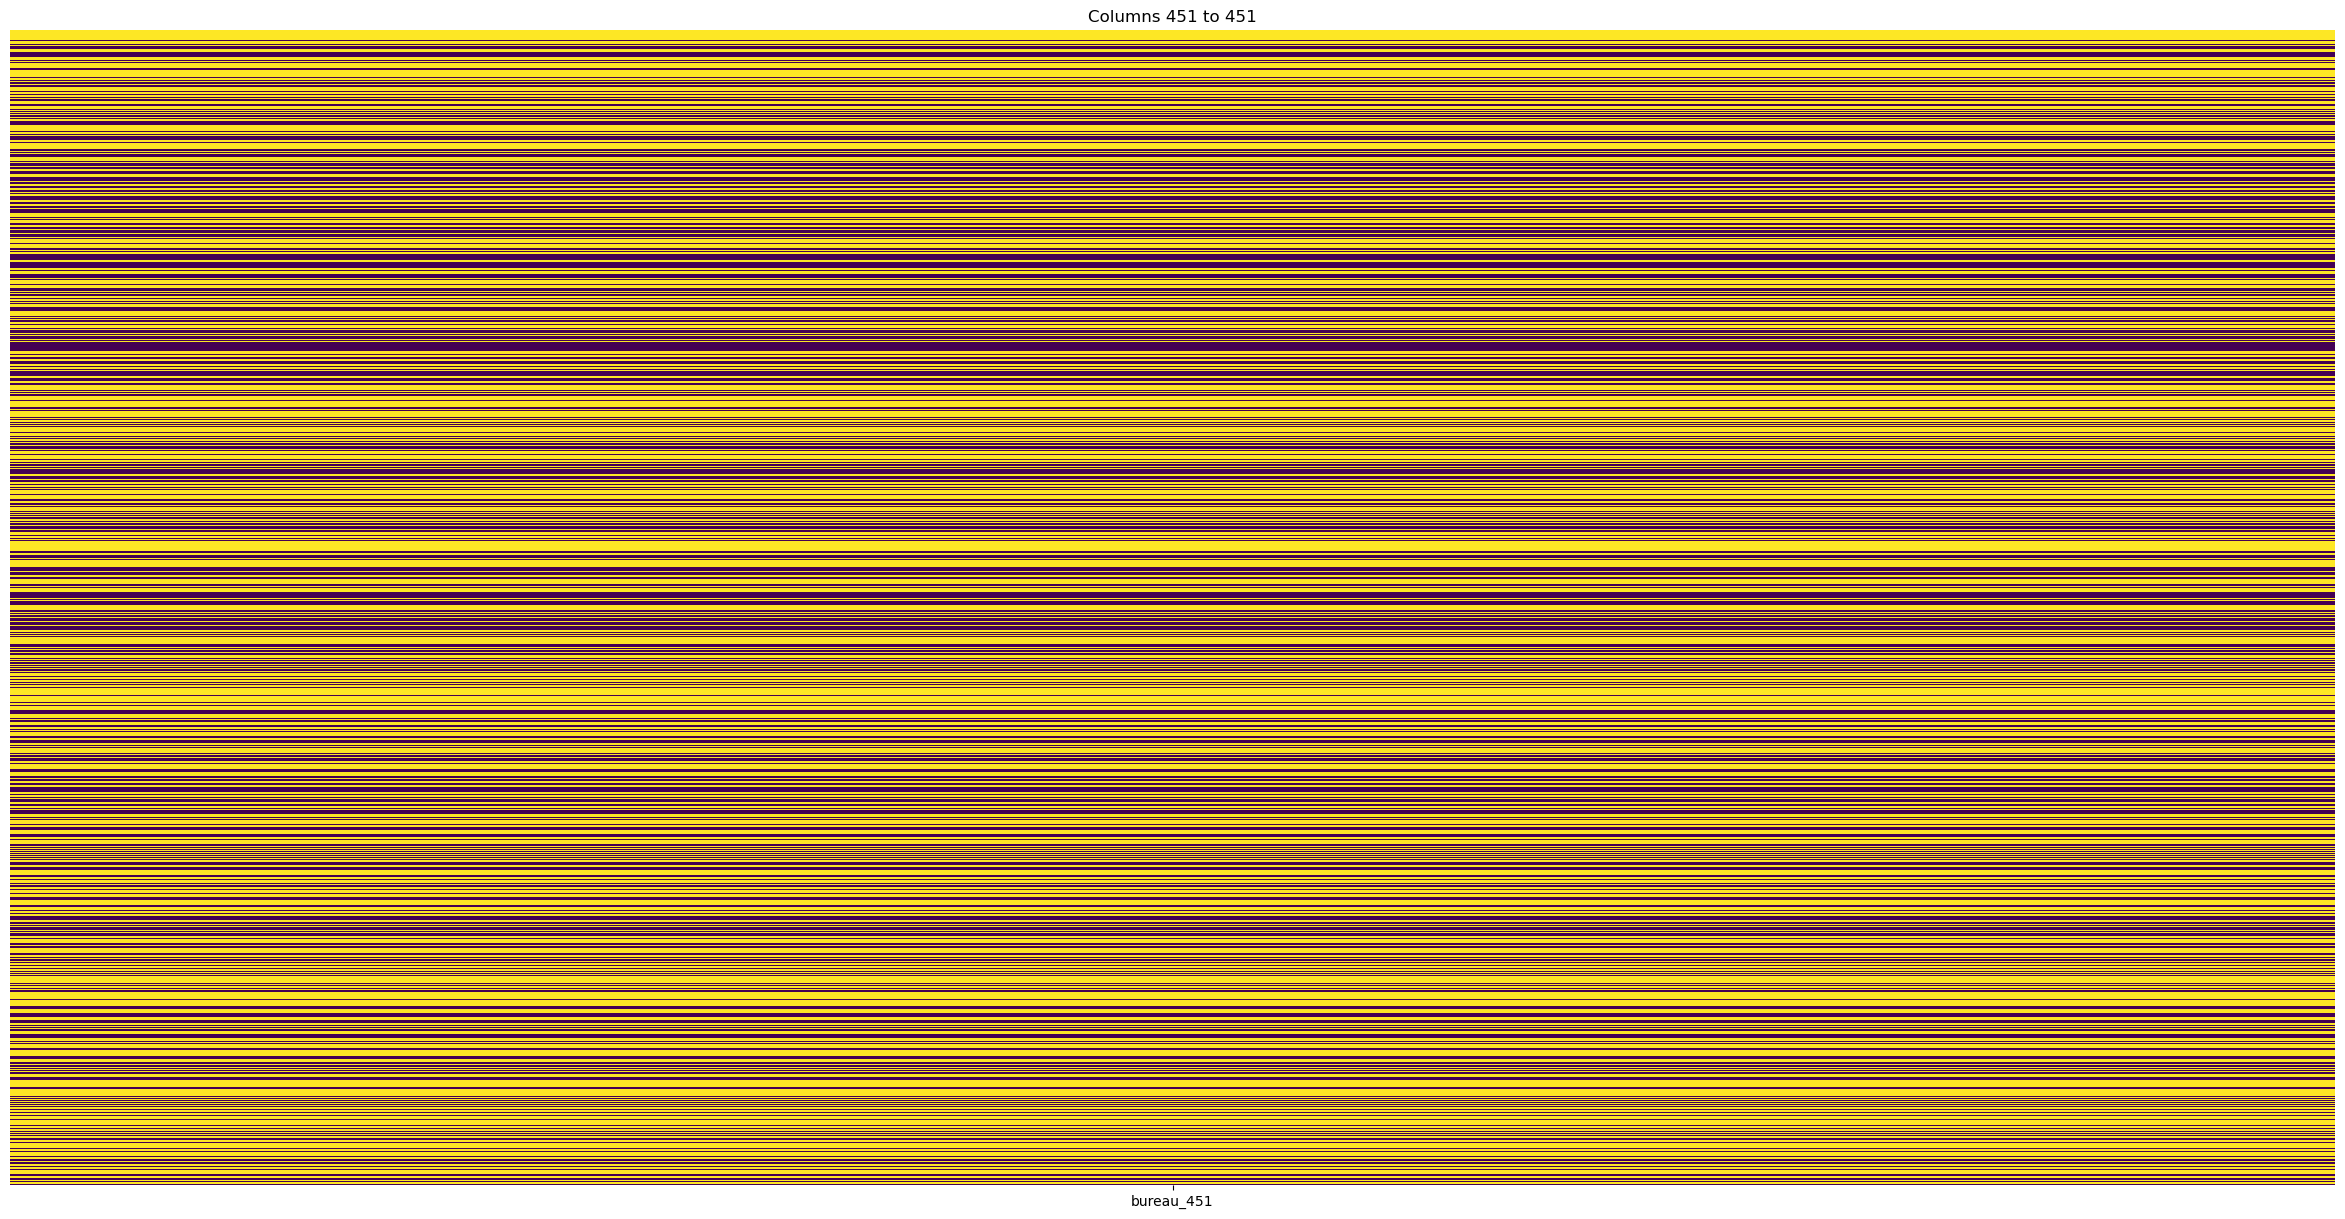

In [6]:
# to check missing values in data

columns_per_plot = 50  # Number of columns per plot
total_columns = df_bureau.shape[1]  # Total number of columns
start = 0

# Loop for 50 columns
for i in range(0, total_columns, columns_per_plot):
    plt.figure(figsize=(30,15))  # Adjust figure size as needed
    sns.heatmap(df_bureau.iloc[:, i:i + columns_per_plot].isnull(), 
                yticklabels=False, 
                cbar=False, 
                cmap='viridis')
    plt.title(f'Columns {i+1} to {min(i+columns_per_plot, total_columns)}')
    plt.show()


In [7]:
# removing columns having less than 60% information

missing_percentage = (df_bureau.isnull().sum() / len(df_bureau)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


threshold = 0.6  # 60% missing values
columns_to_drop = missing_percentage[missing_percentage > threshold * 100].index

# Drop columns exceeding the threshold
df_bureau.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

columns_to_drop2 = ["bureau_445", "bureau_451"]
df_bureau.drop(columns=columns_to_drop2, inplace=True)  # Corrected `True`



bureau_447    100.000000
bureau_436    100.000000
bureau_449     94.124331
bureau_148     93.552053
bureau_448     90.028511
                 ...    
bureau_160      1.232362
bureau_159      1.232362
bureau_158      1.232362
bureau_157      1.232362
bureau_226      1.232362
Length: 451, dtype: float64
Dropped columns: Index(['bureau_148', 'bureau_433', 'bureau_435', 'bureau_436', 'bureau_437',
       'bureau_438', 'bureau_444', 'bureau_446', 'bureau_447', 'bureau_448',
       'bureau_449'],
      dtype='object')


C:\Users\dhruv\AppData\Local\Temp\ipykernel_20452\256931237.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bureau.drop(columns=columns_to_drop, inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_20452\256931237.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bureau.drop(columns=columns_to_drop2, inplace=True)  # Corrected `True`


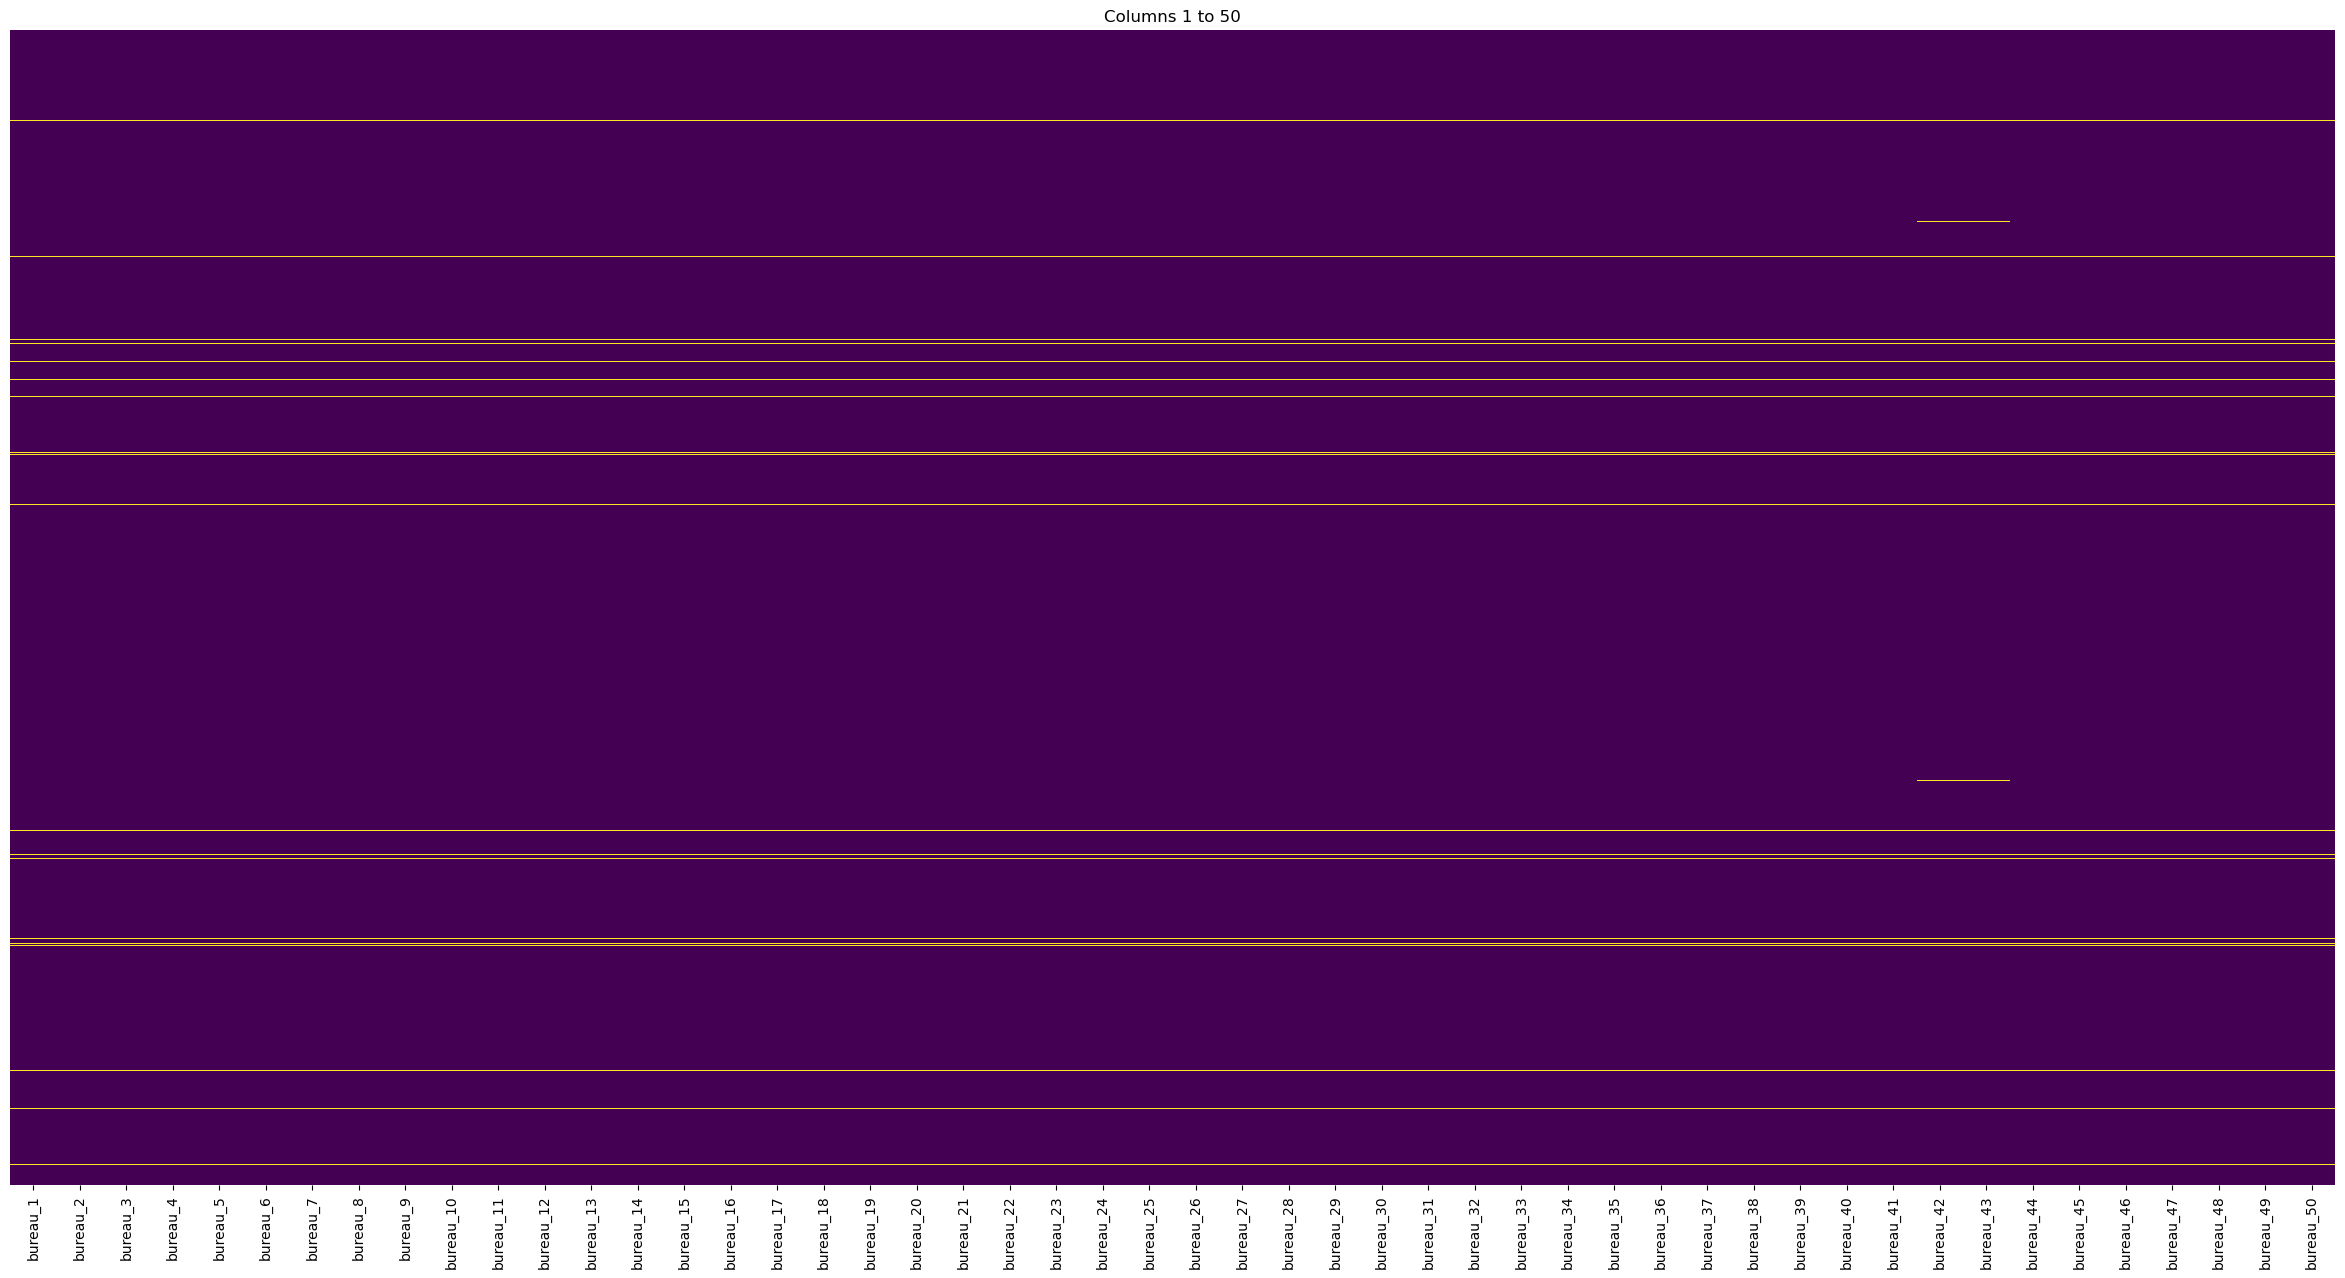

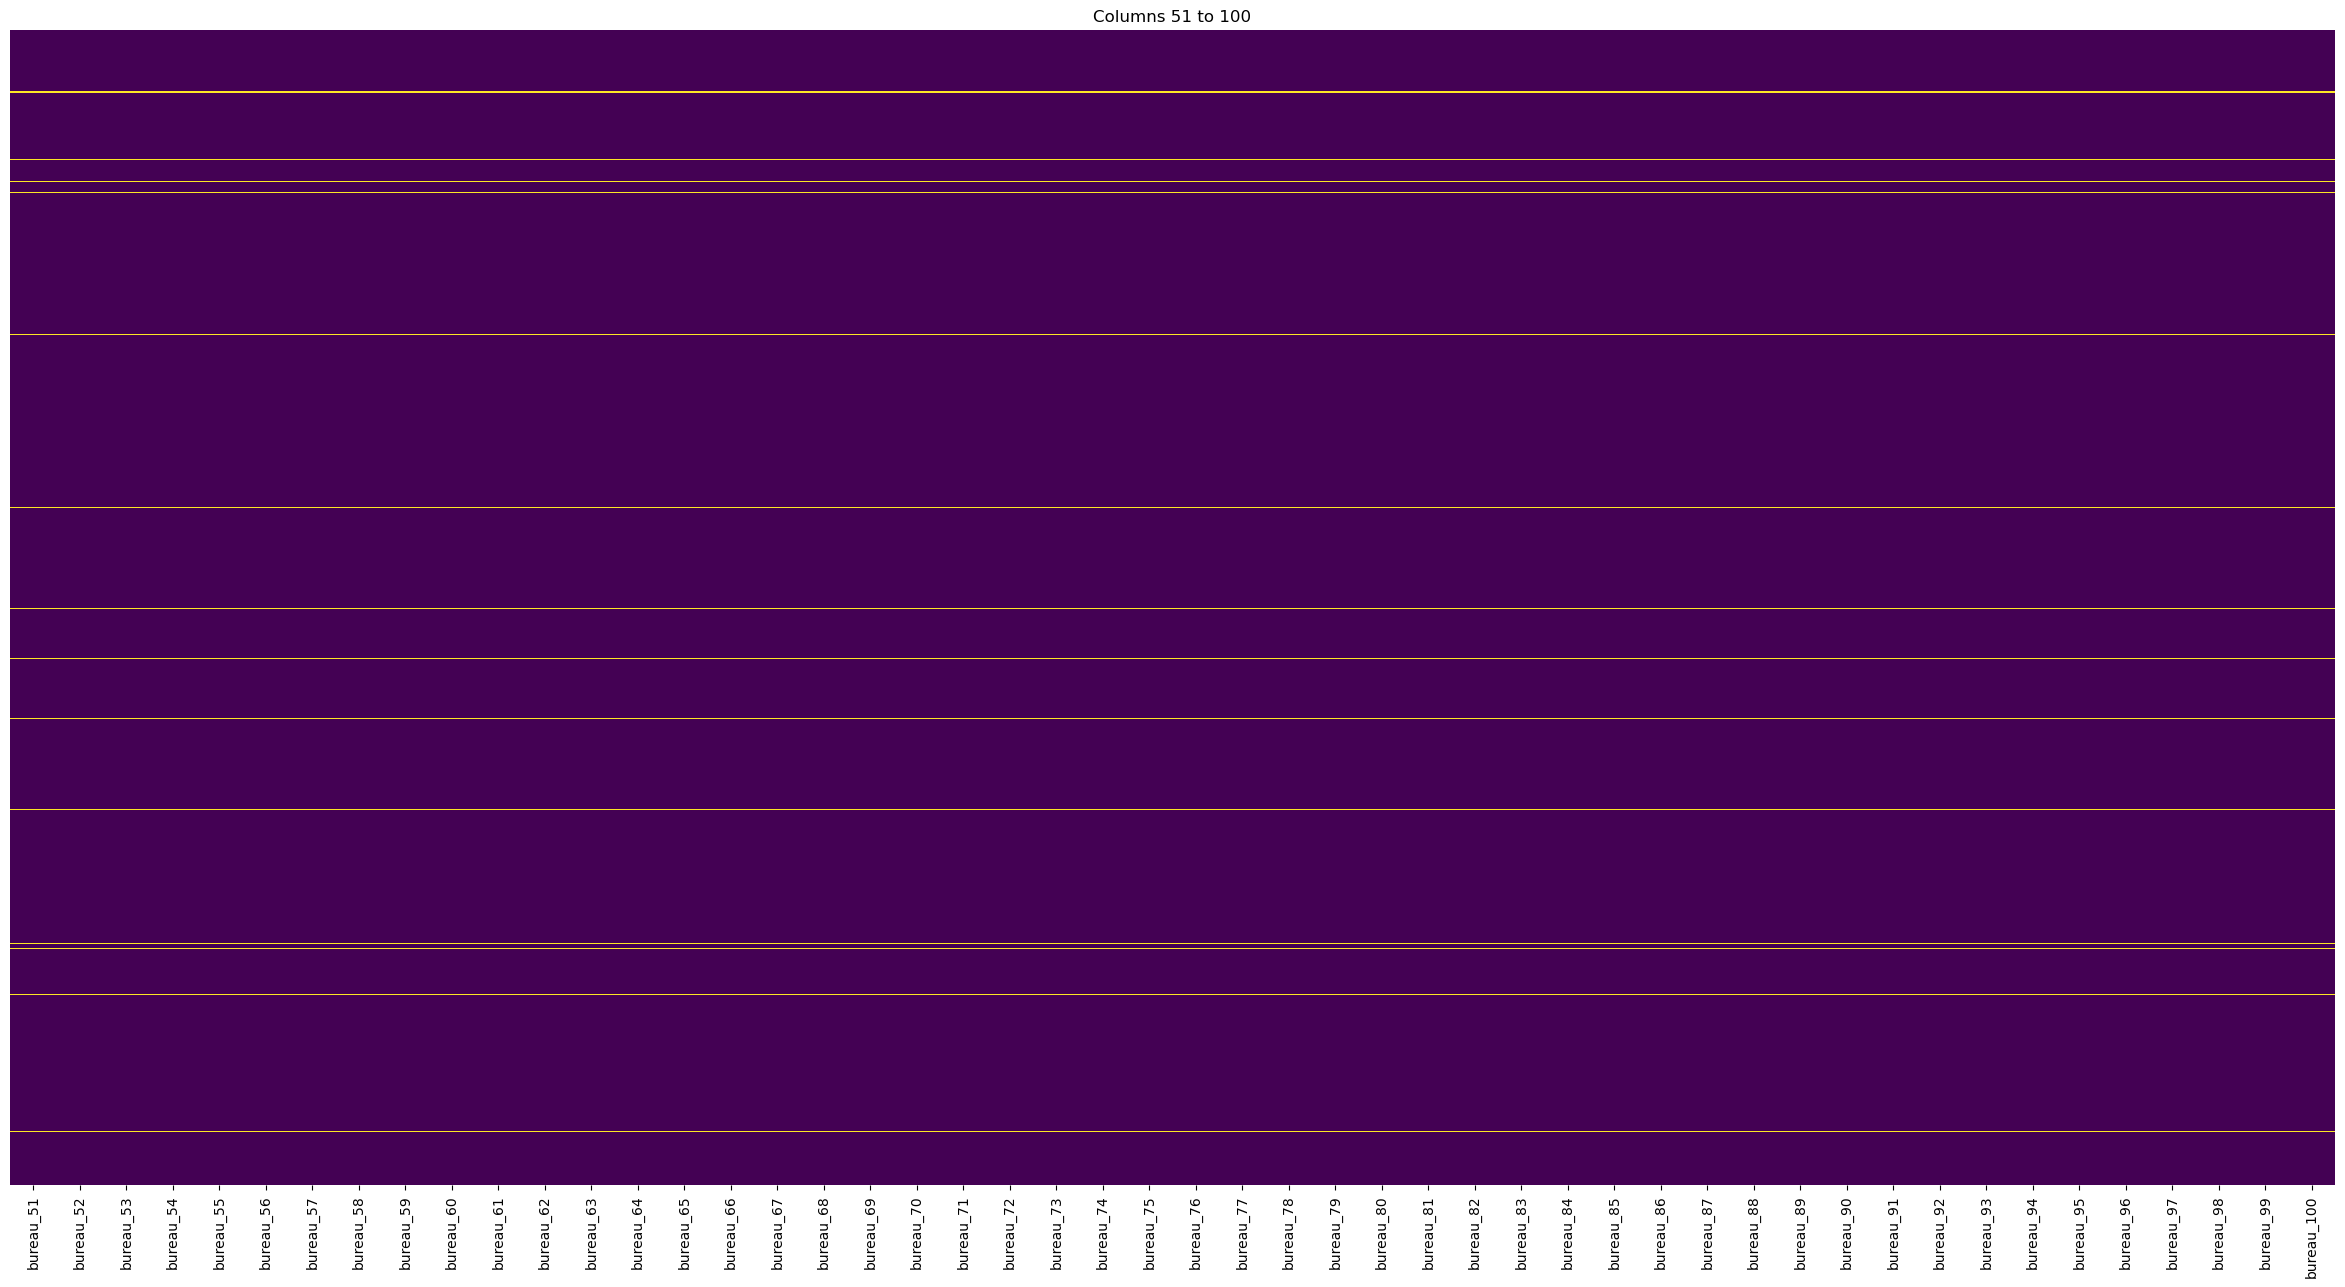

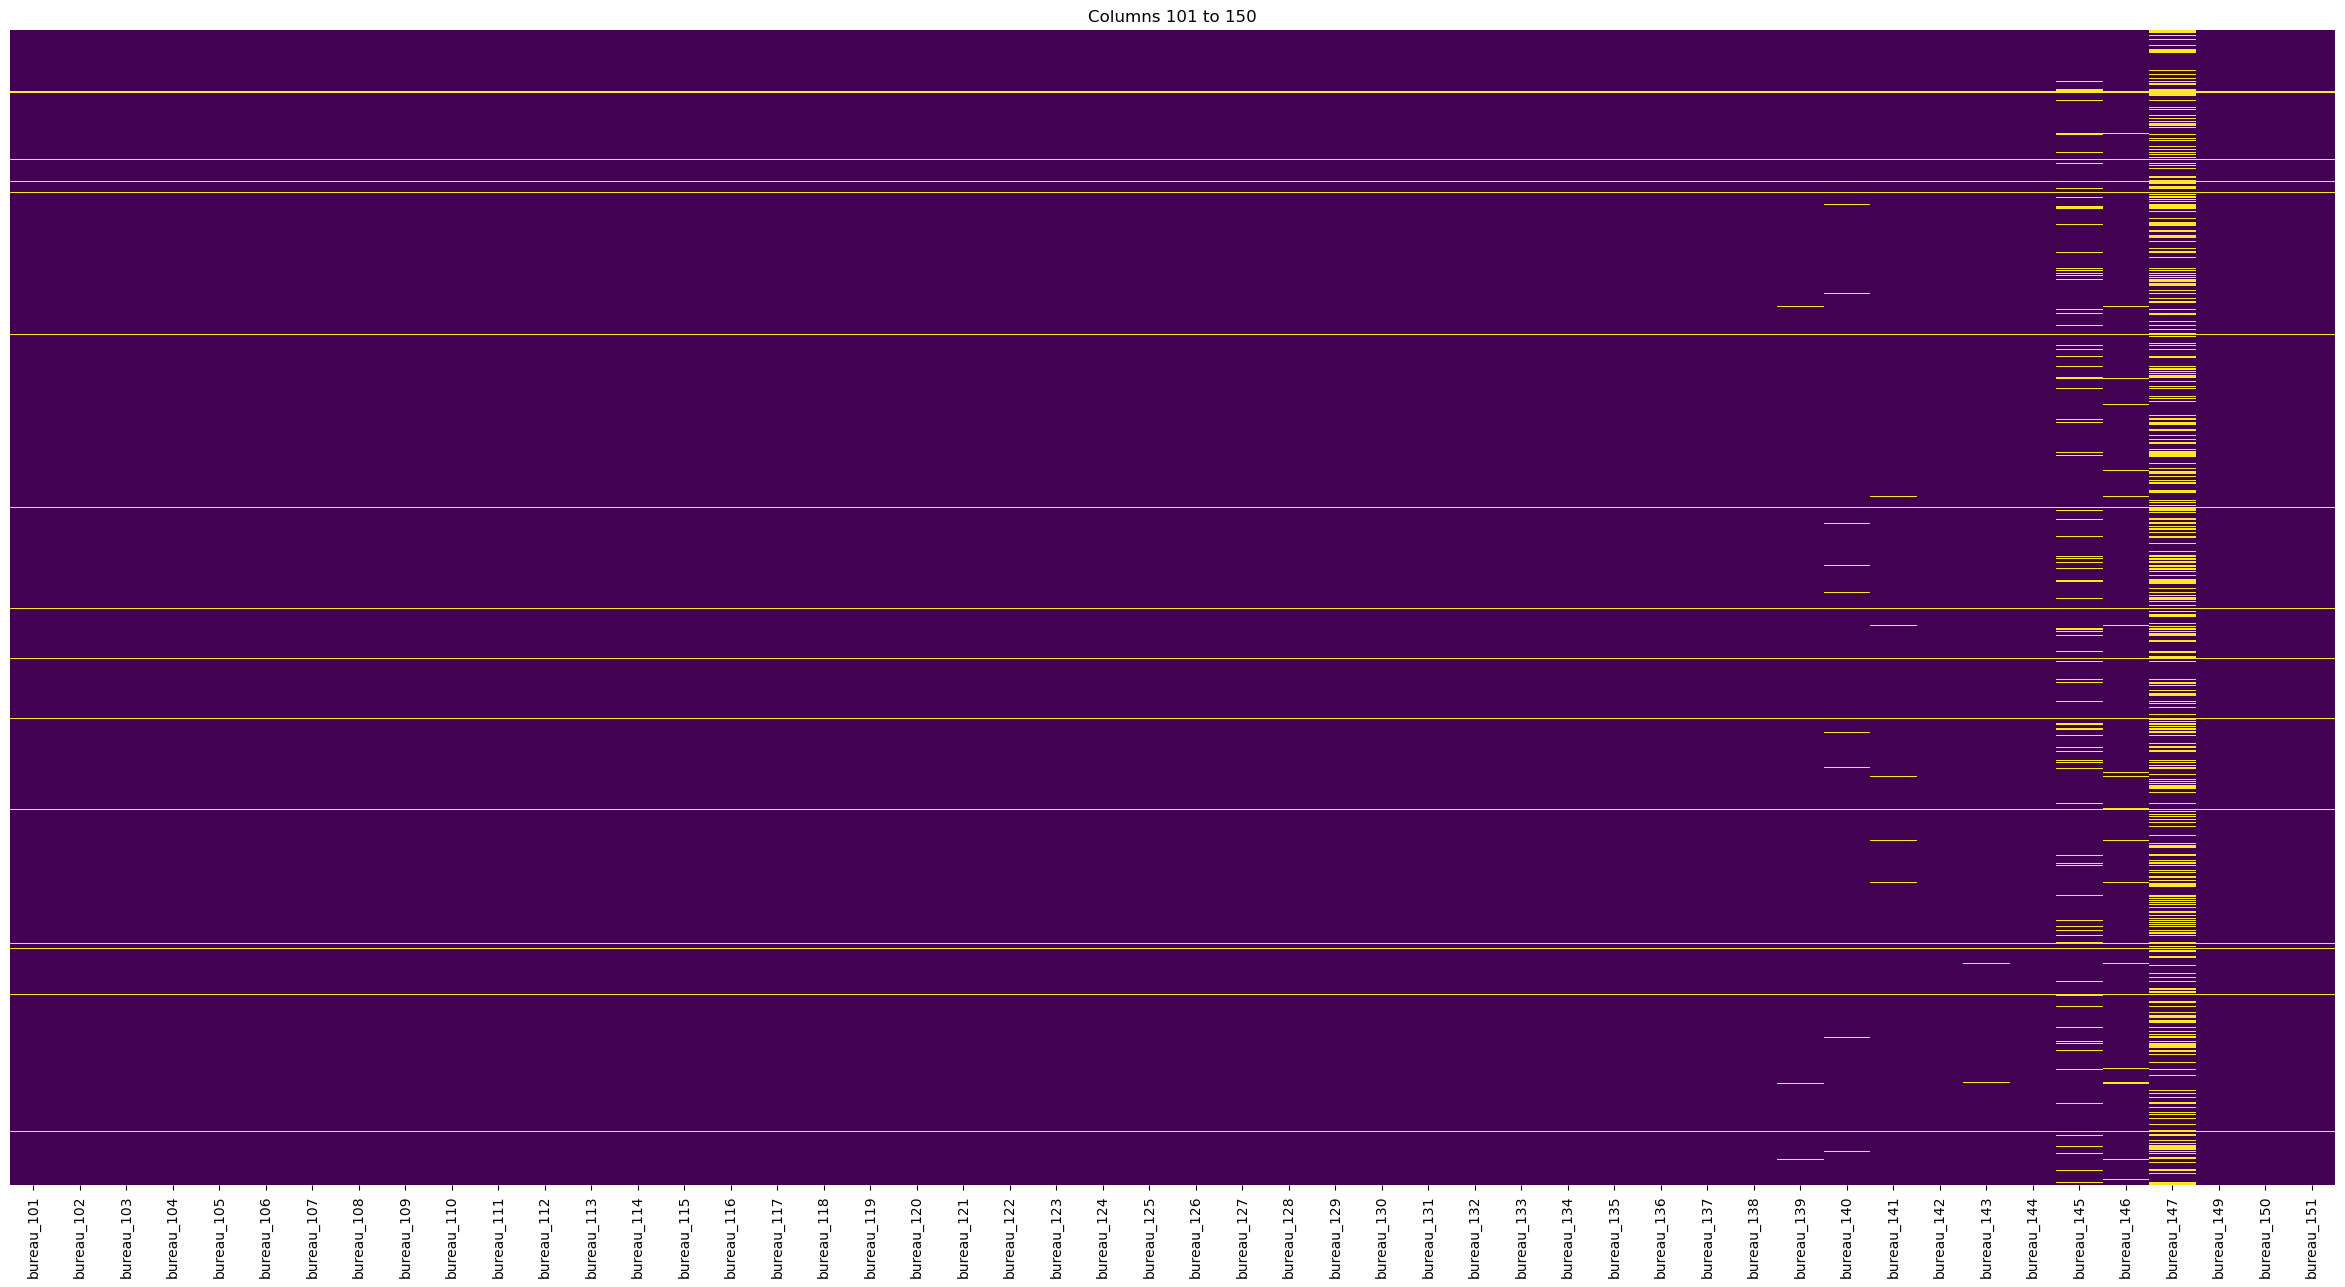

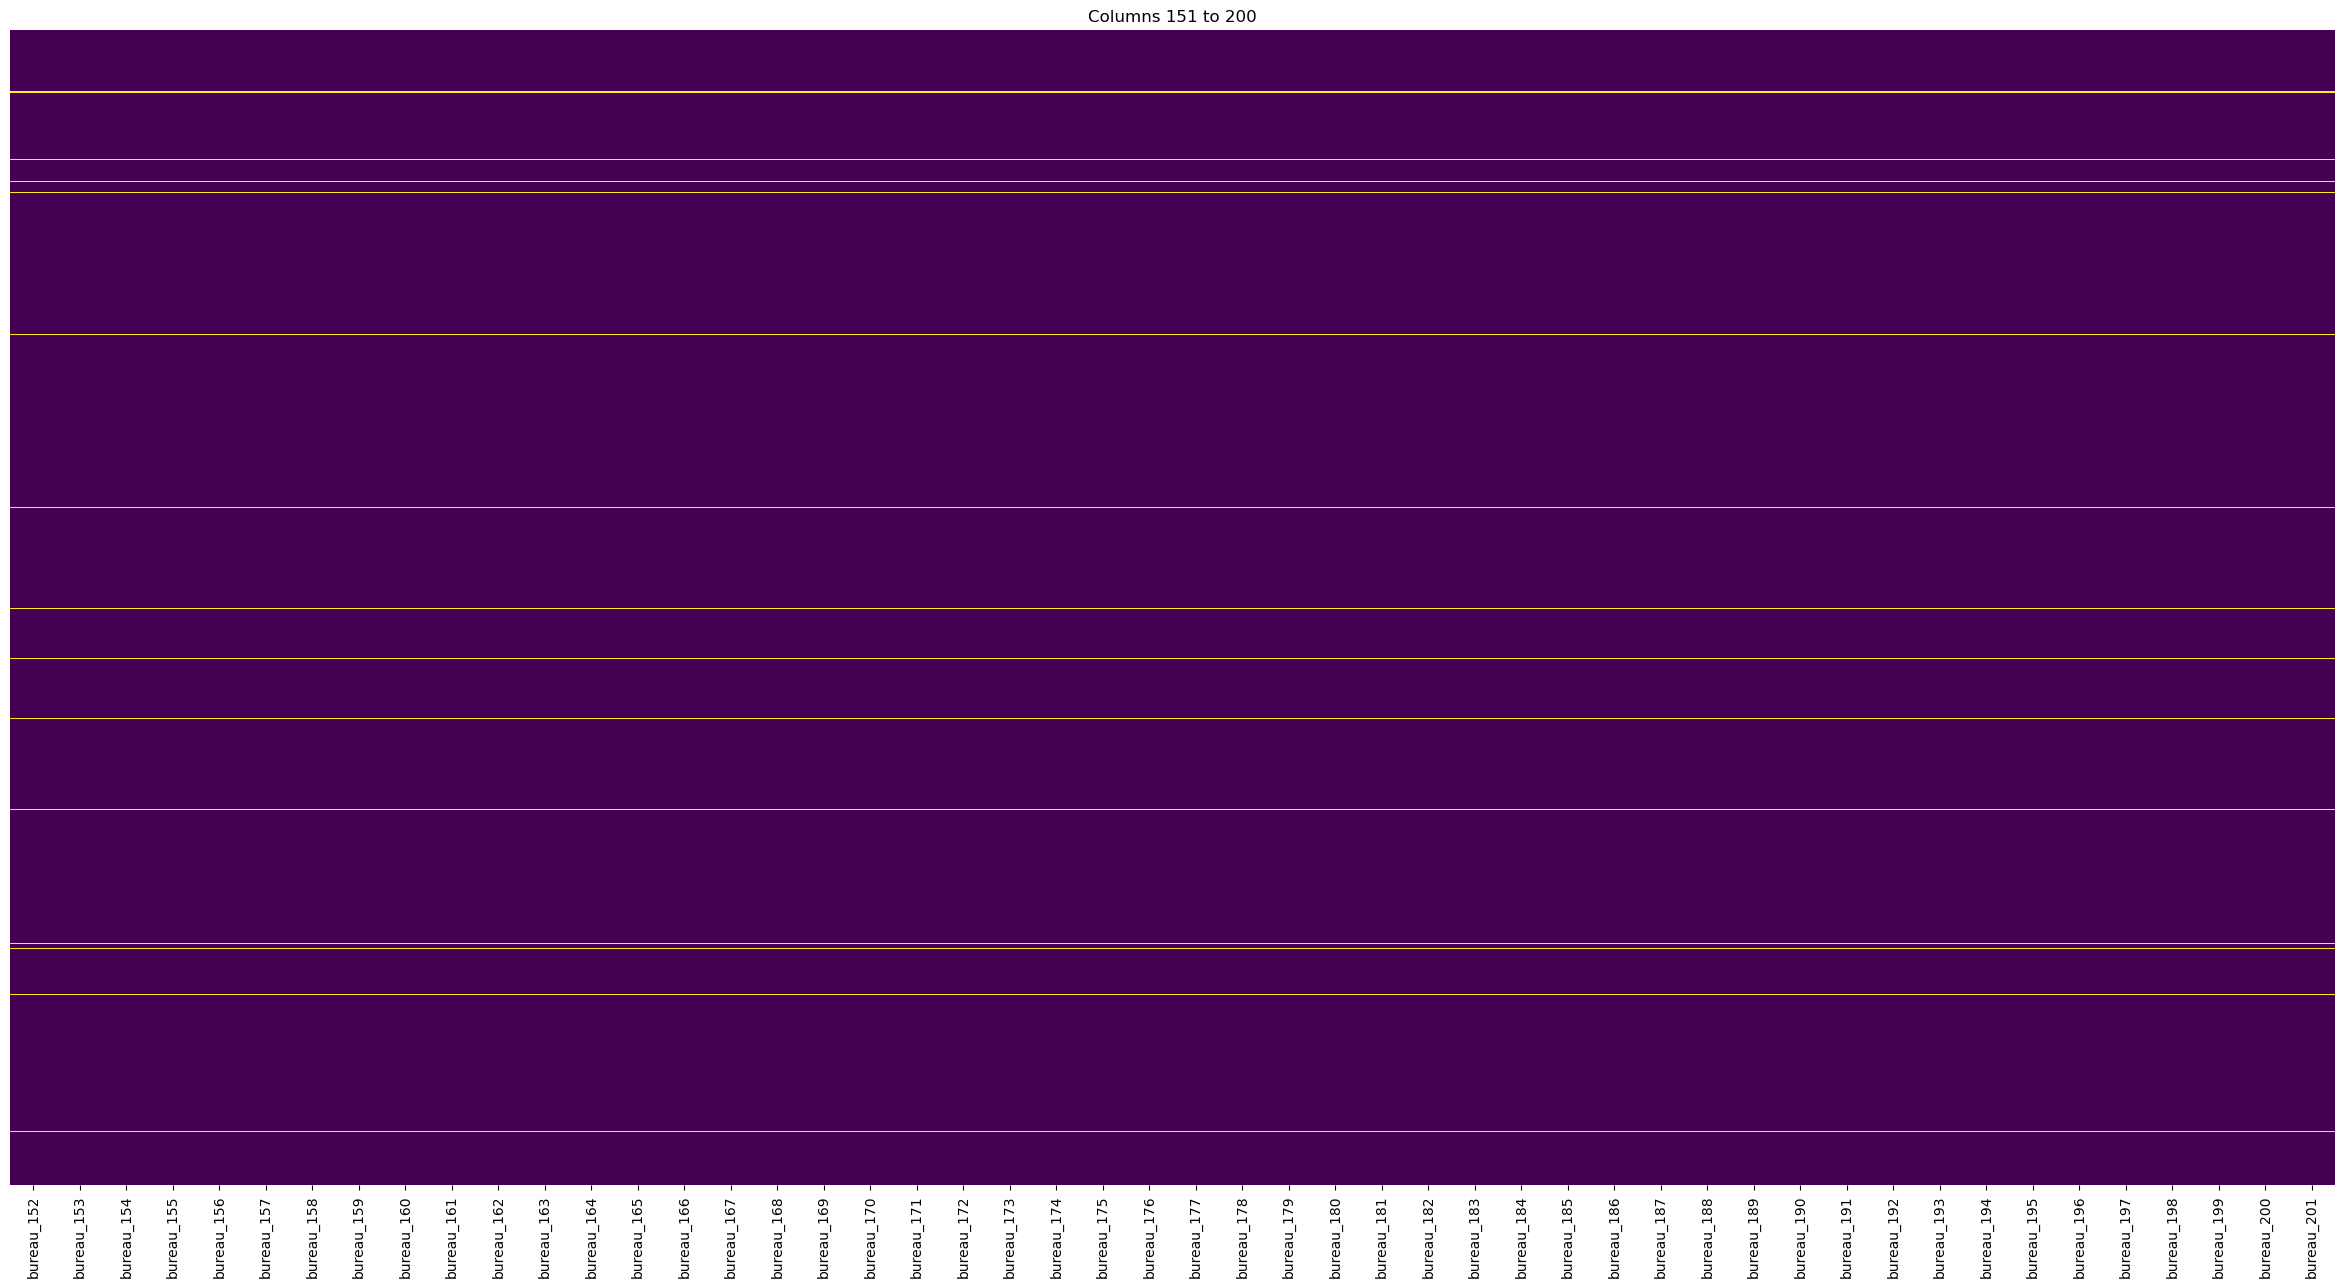

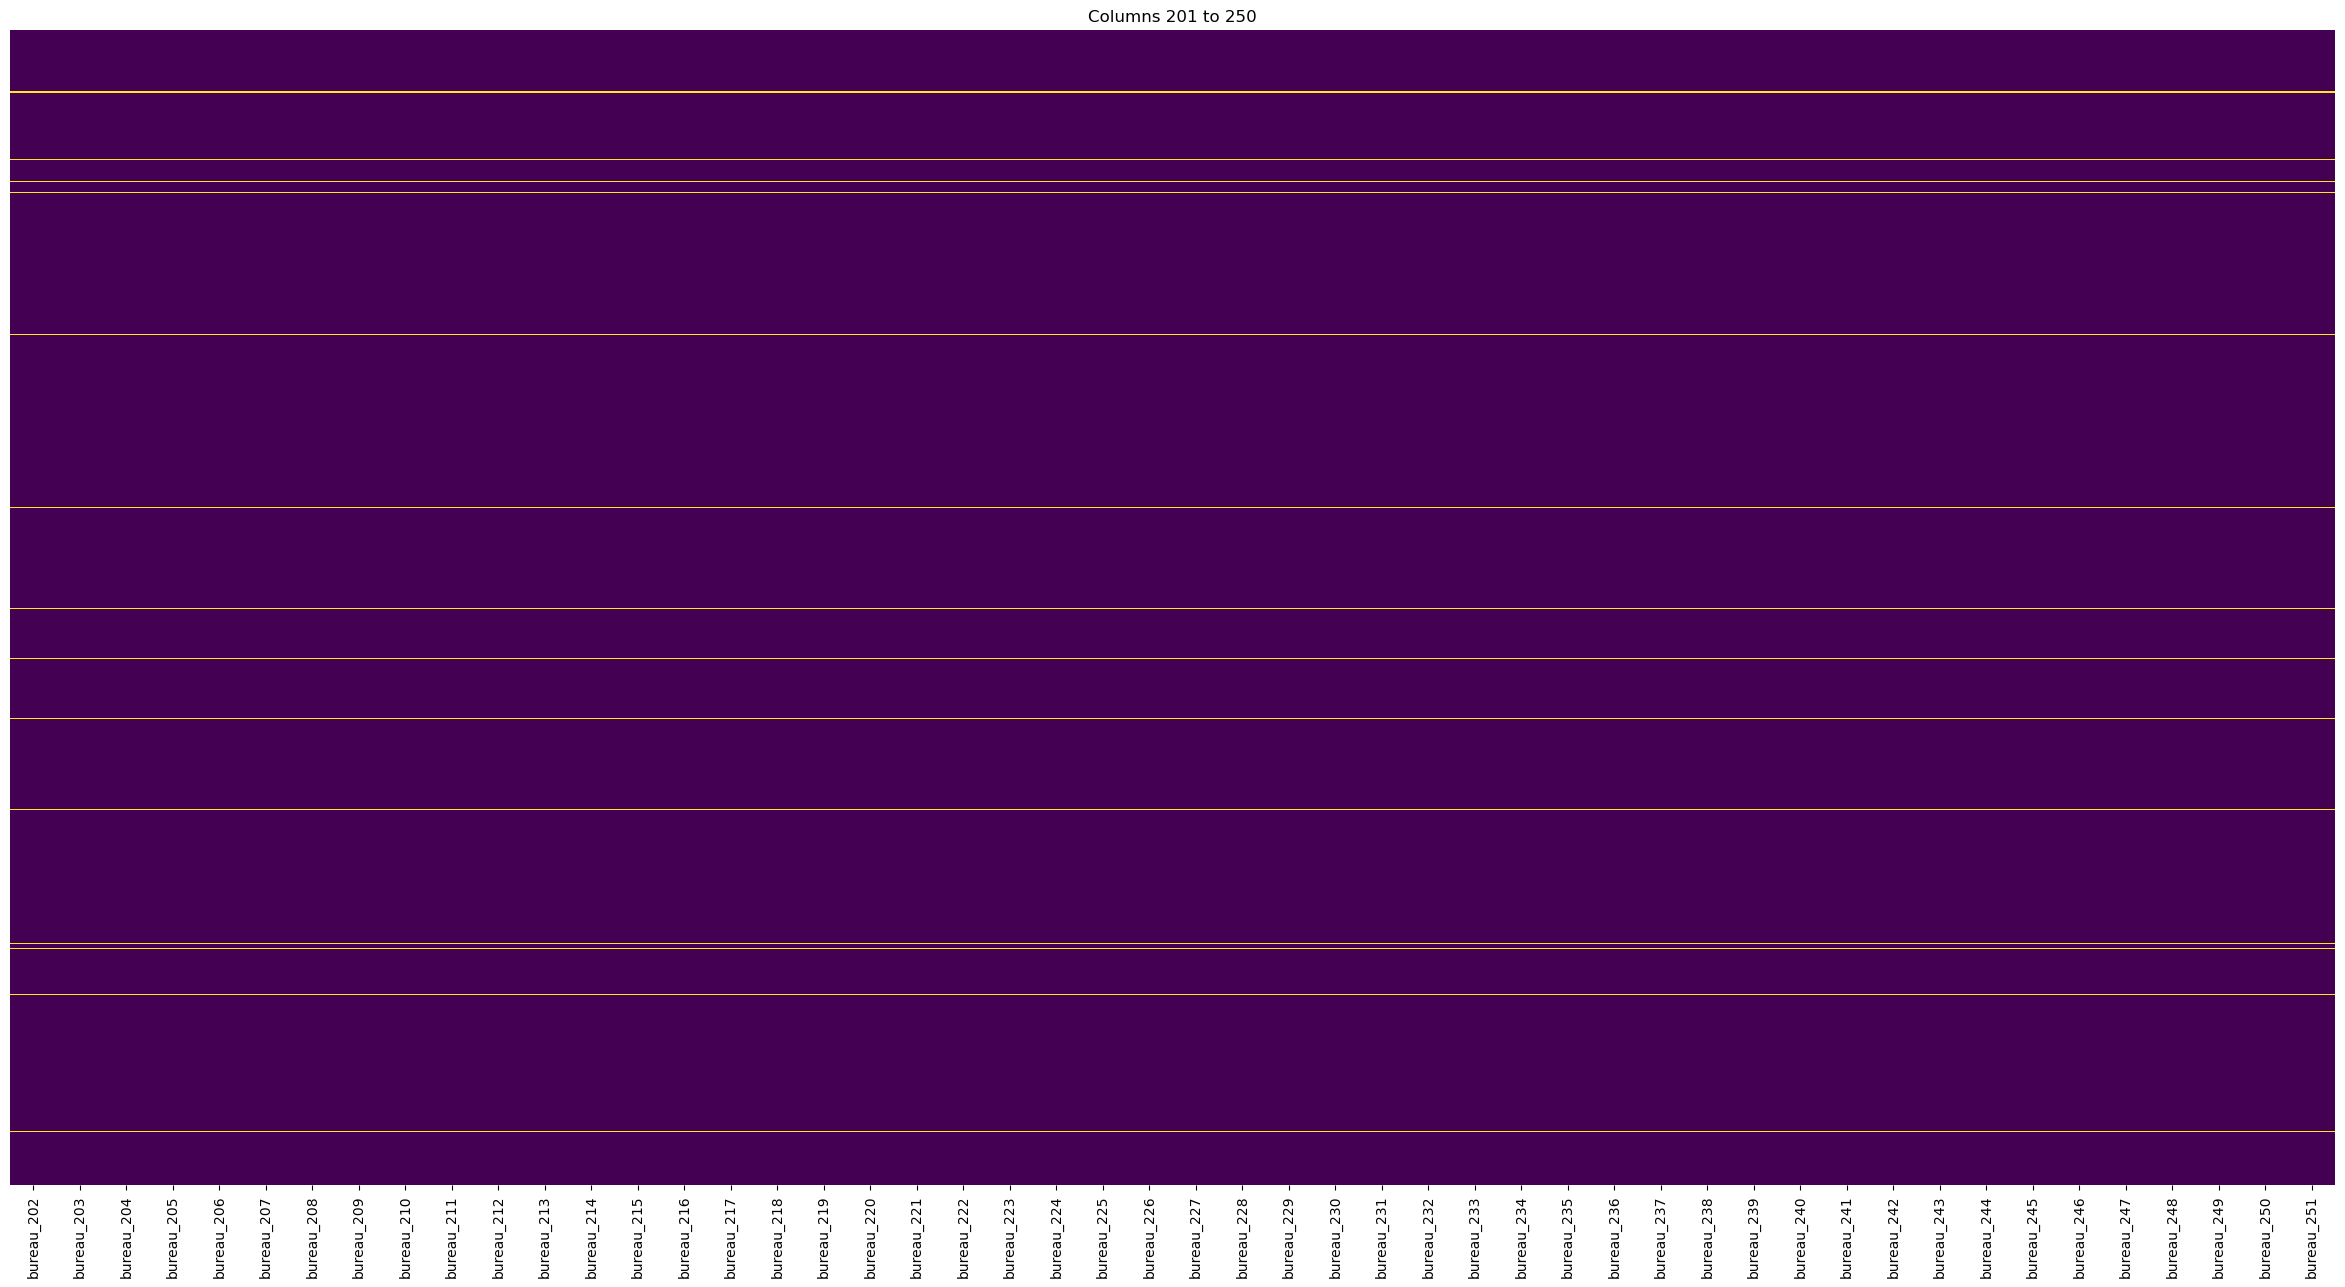

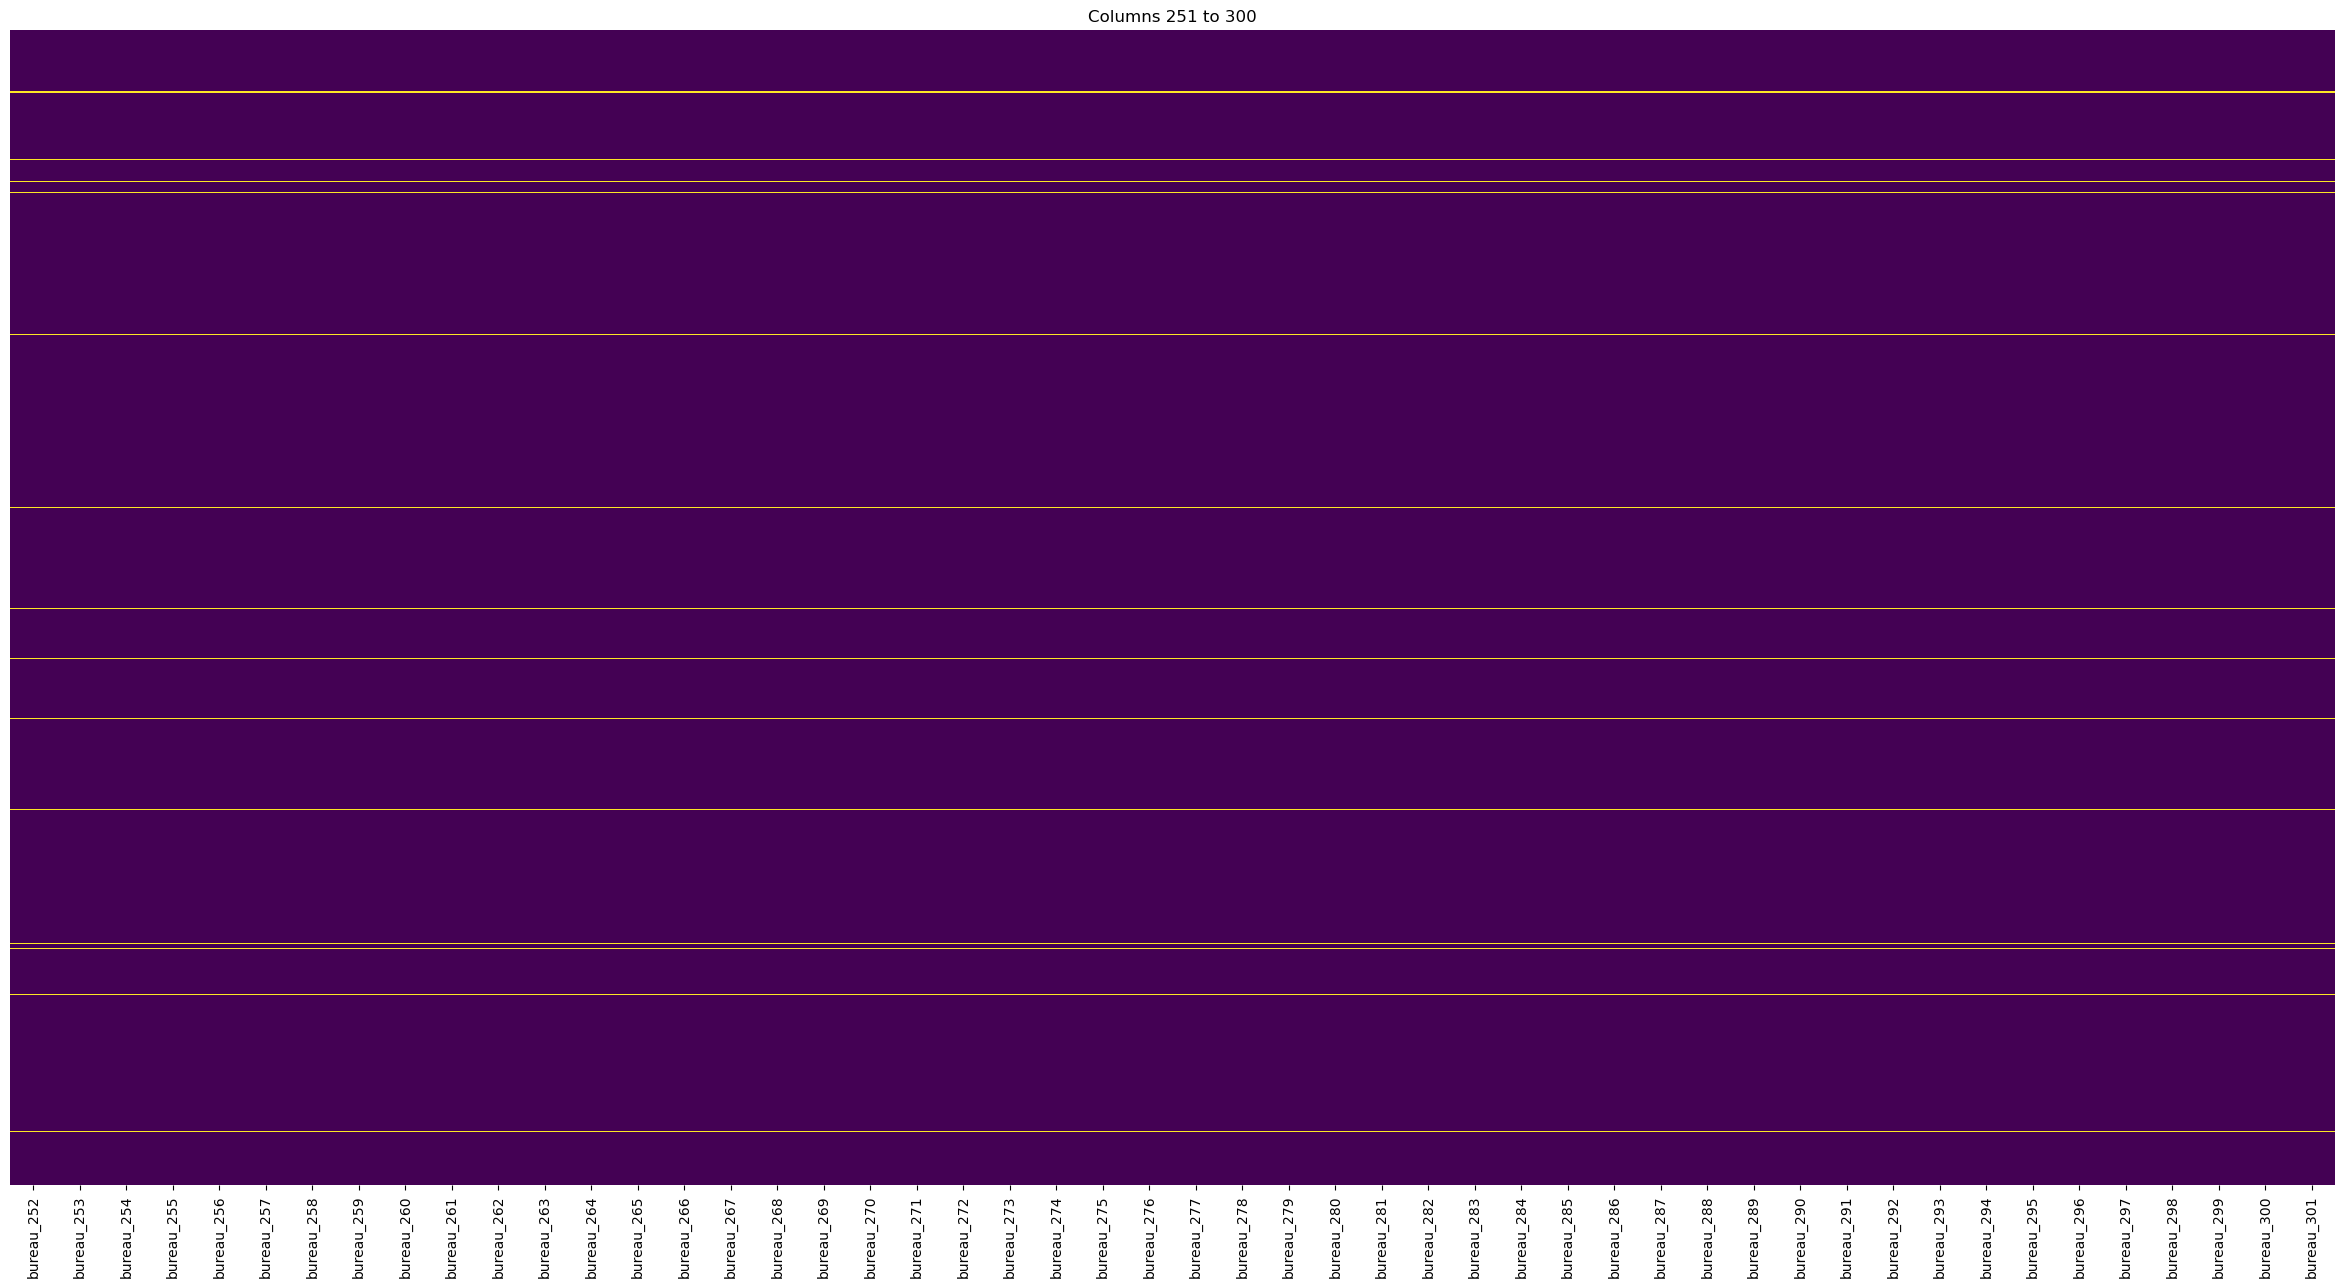

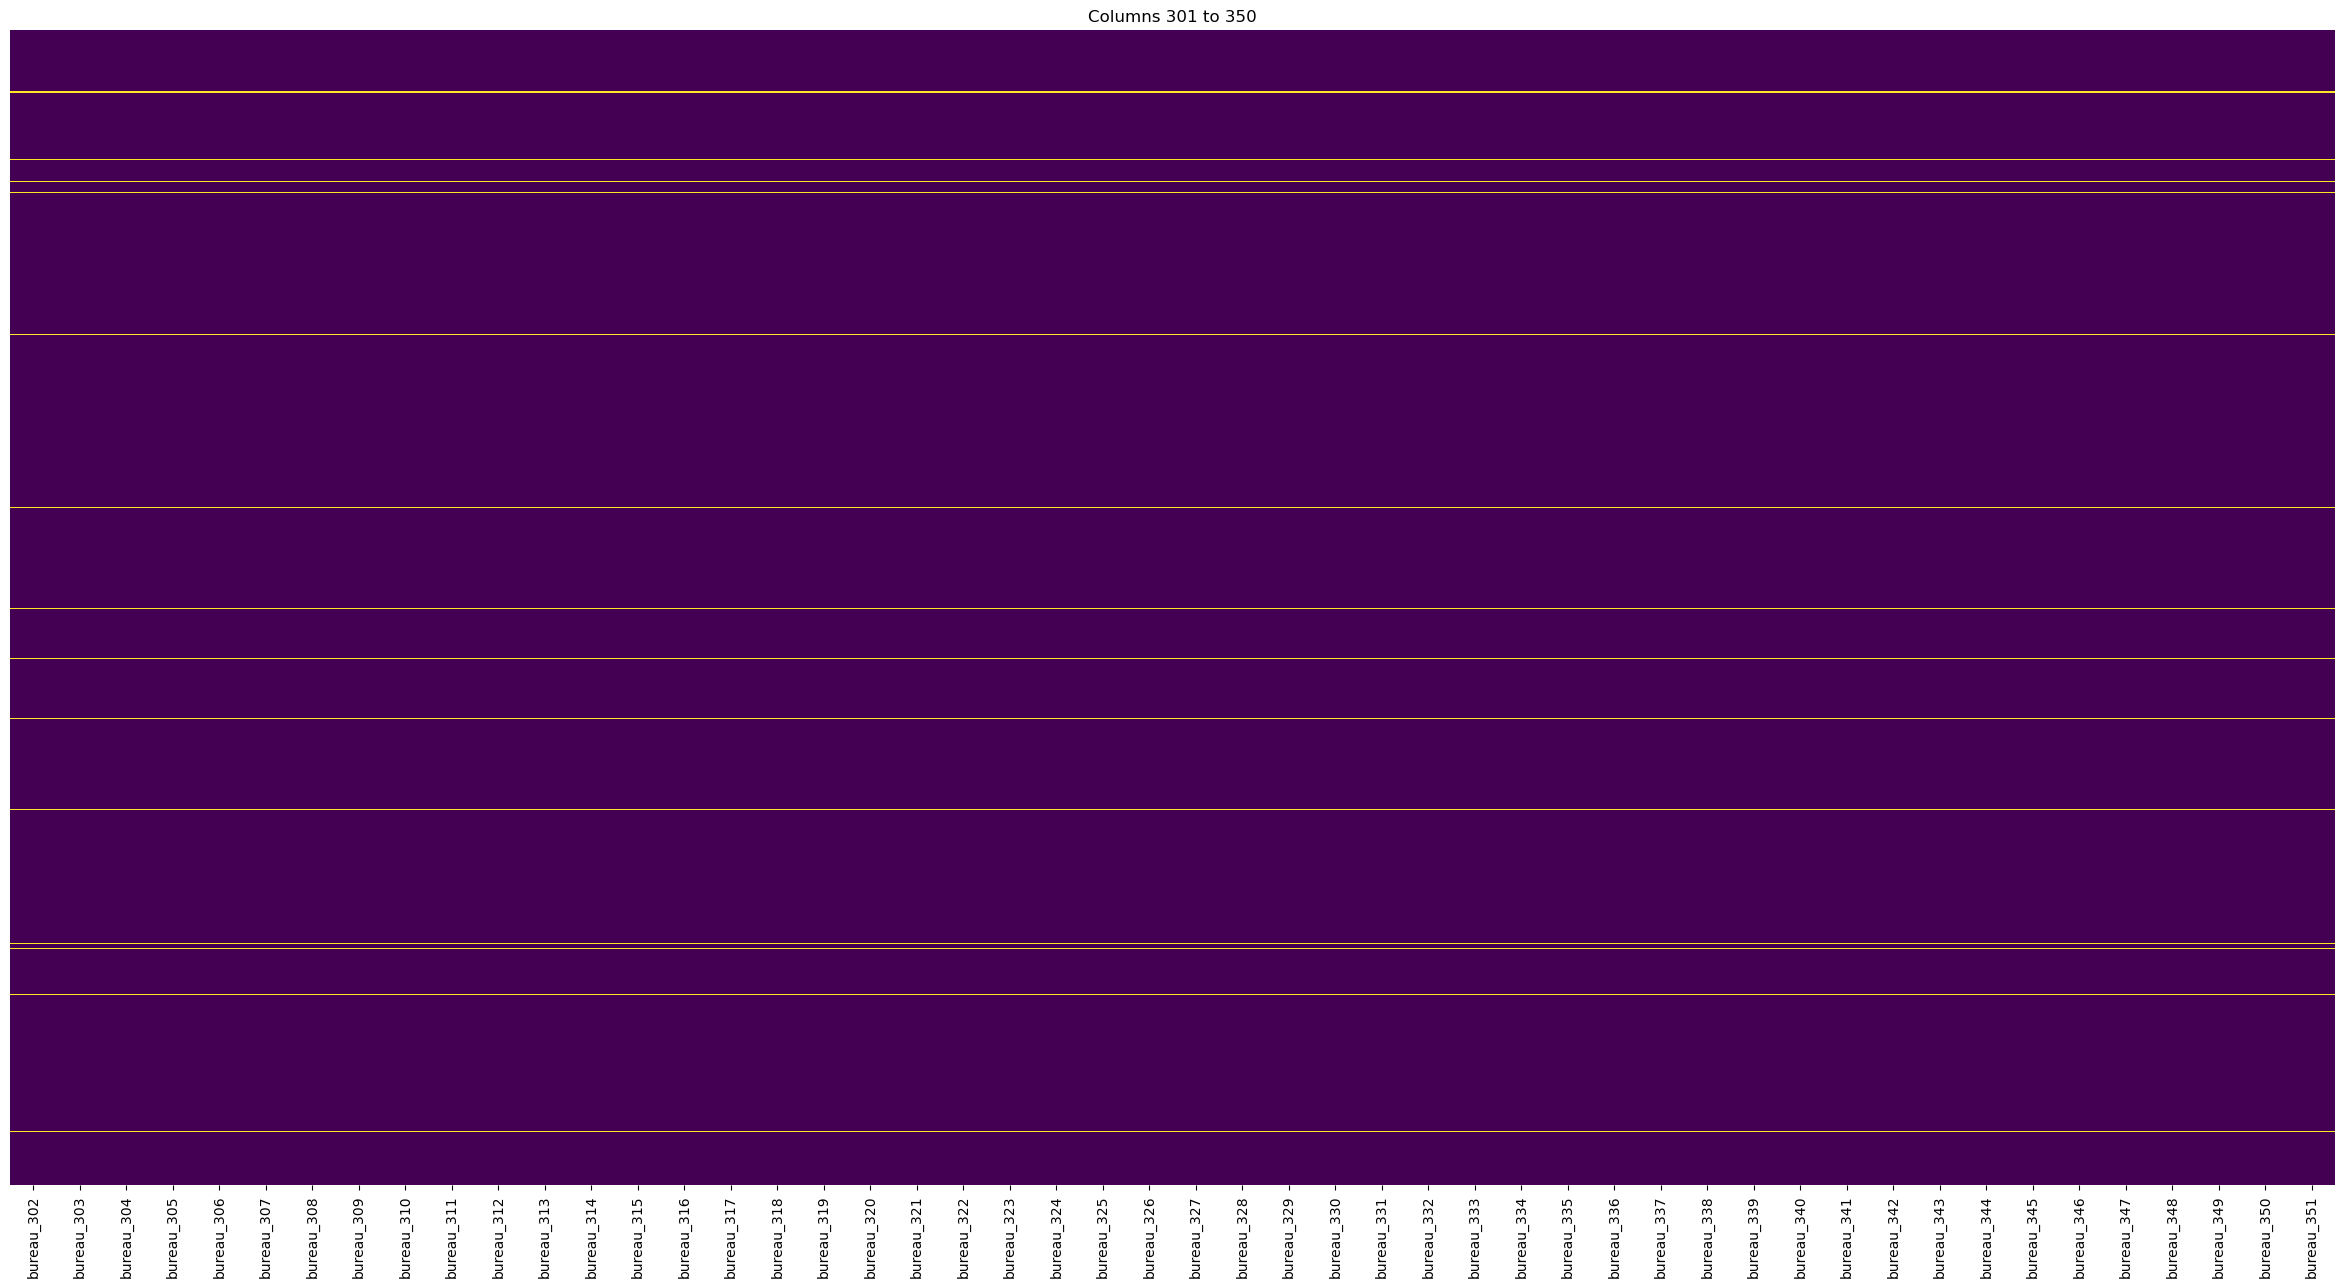

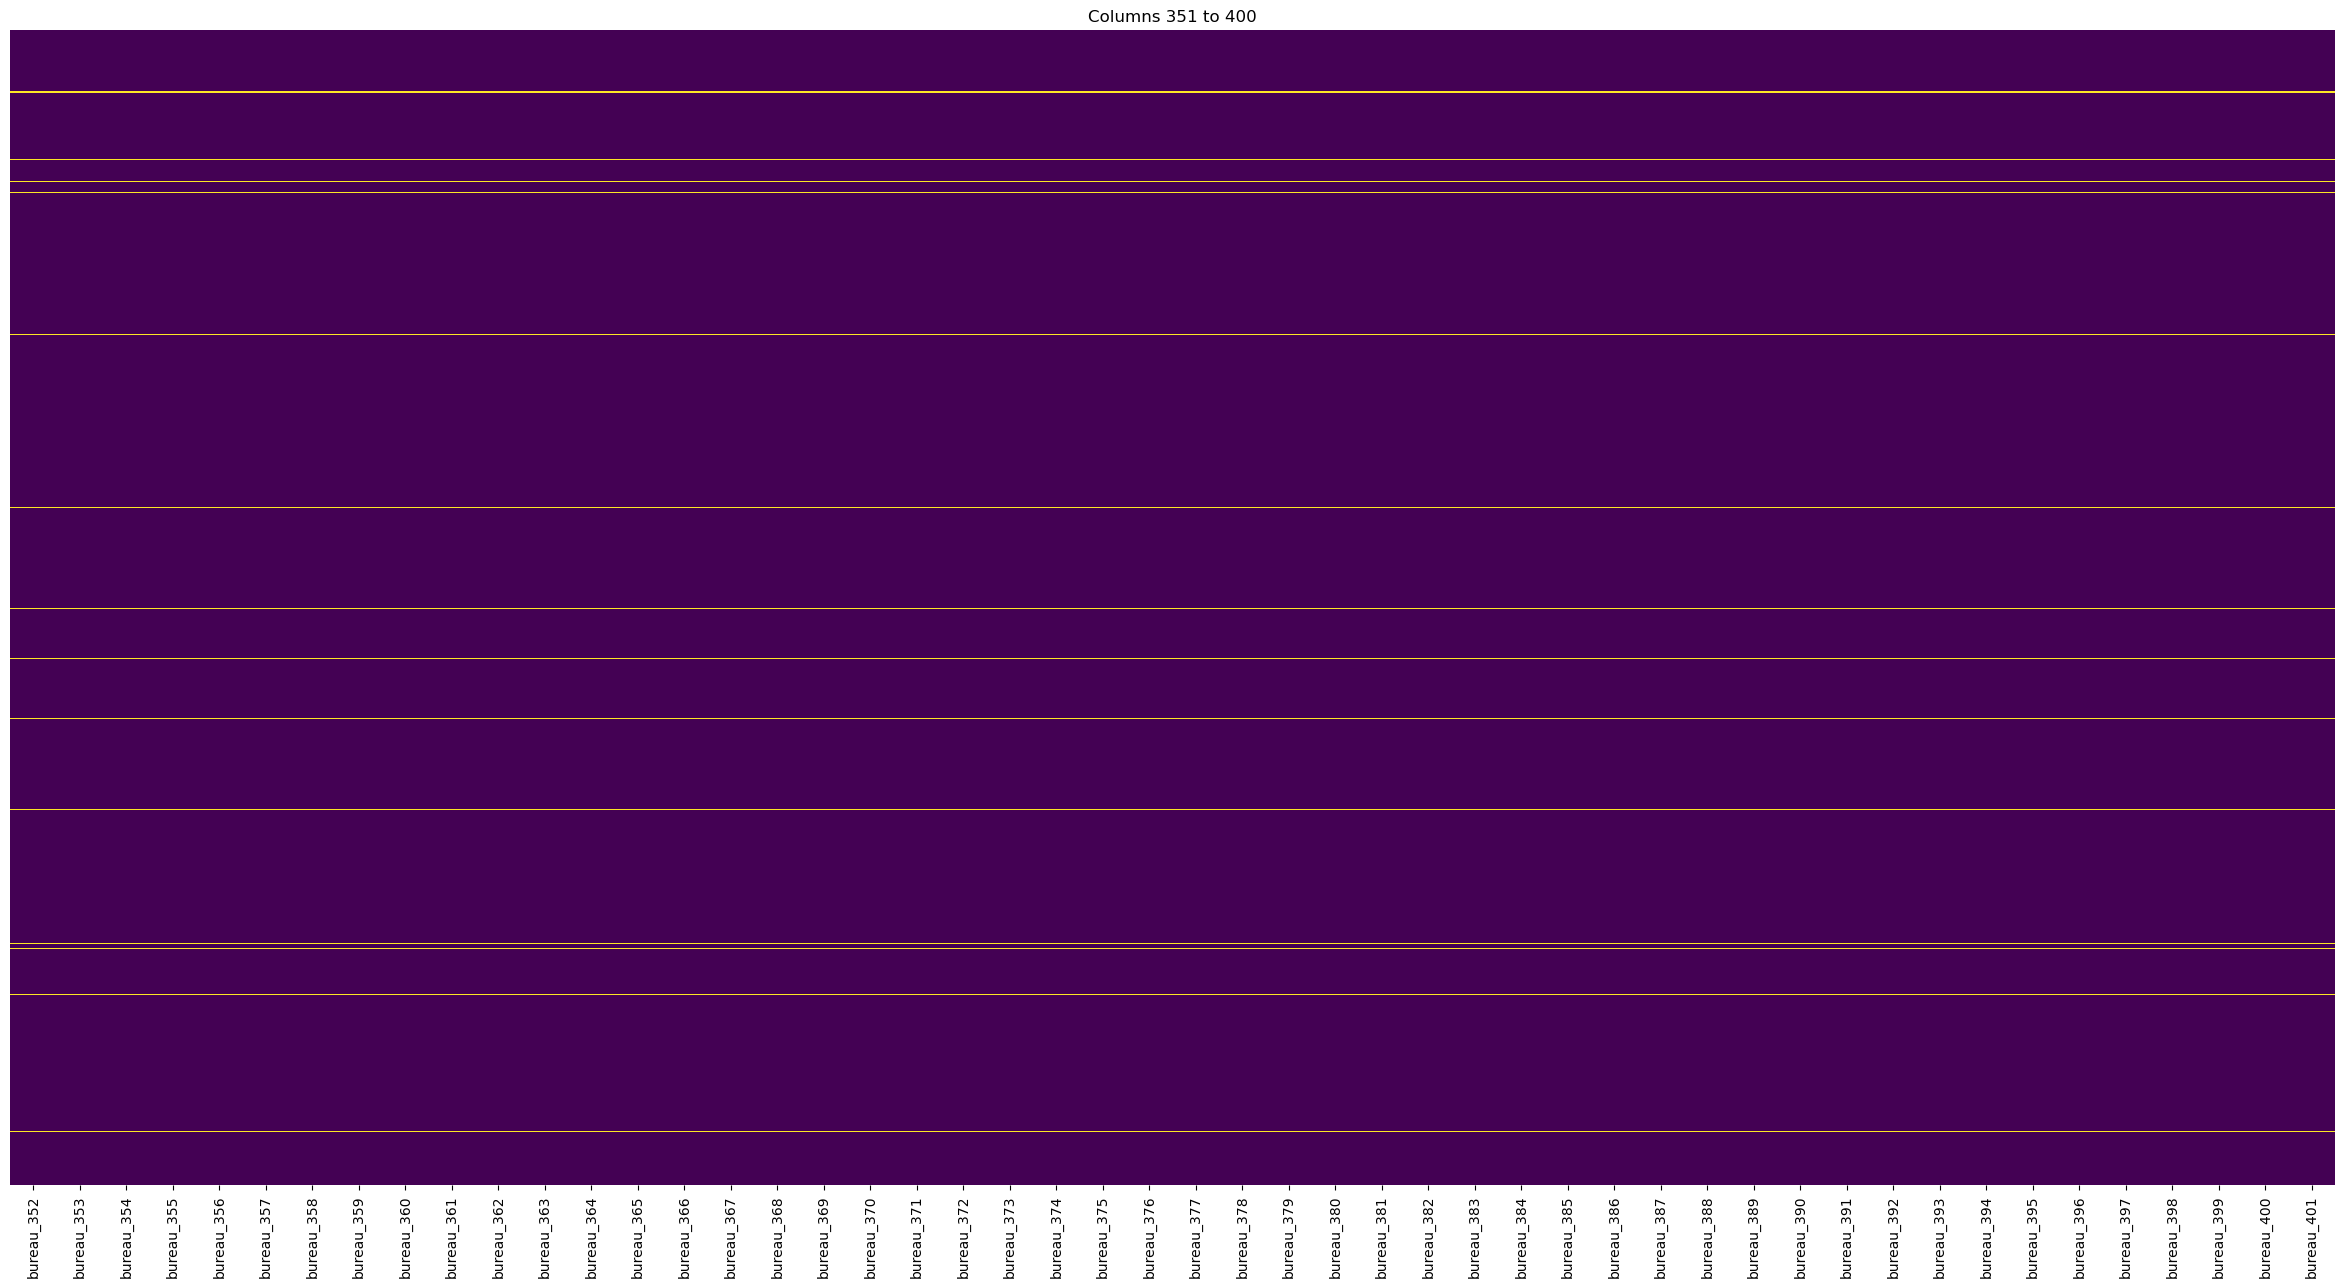

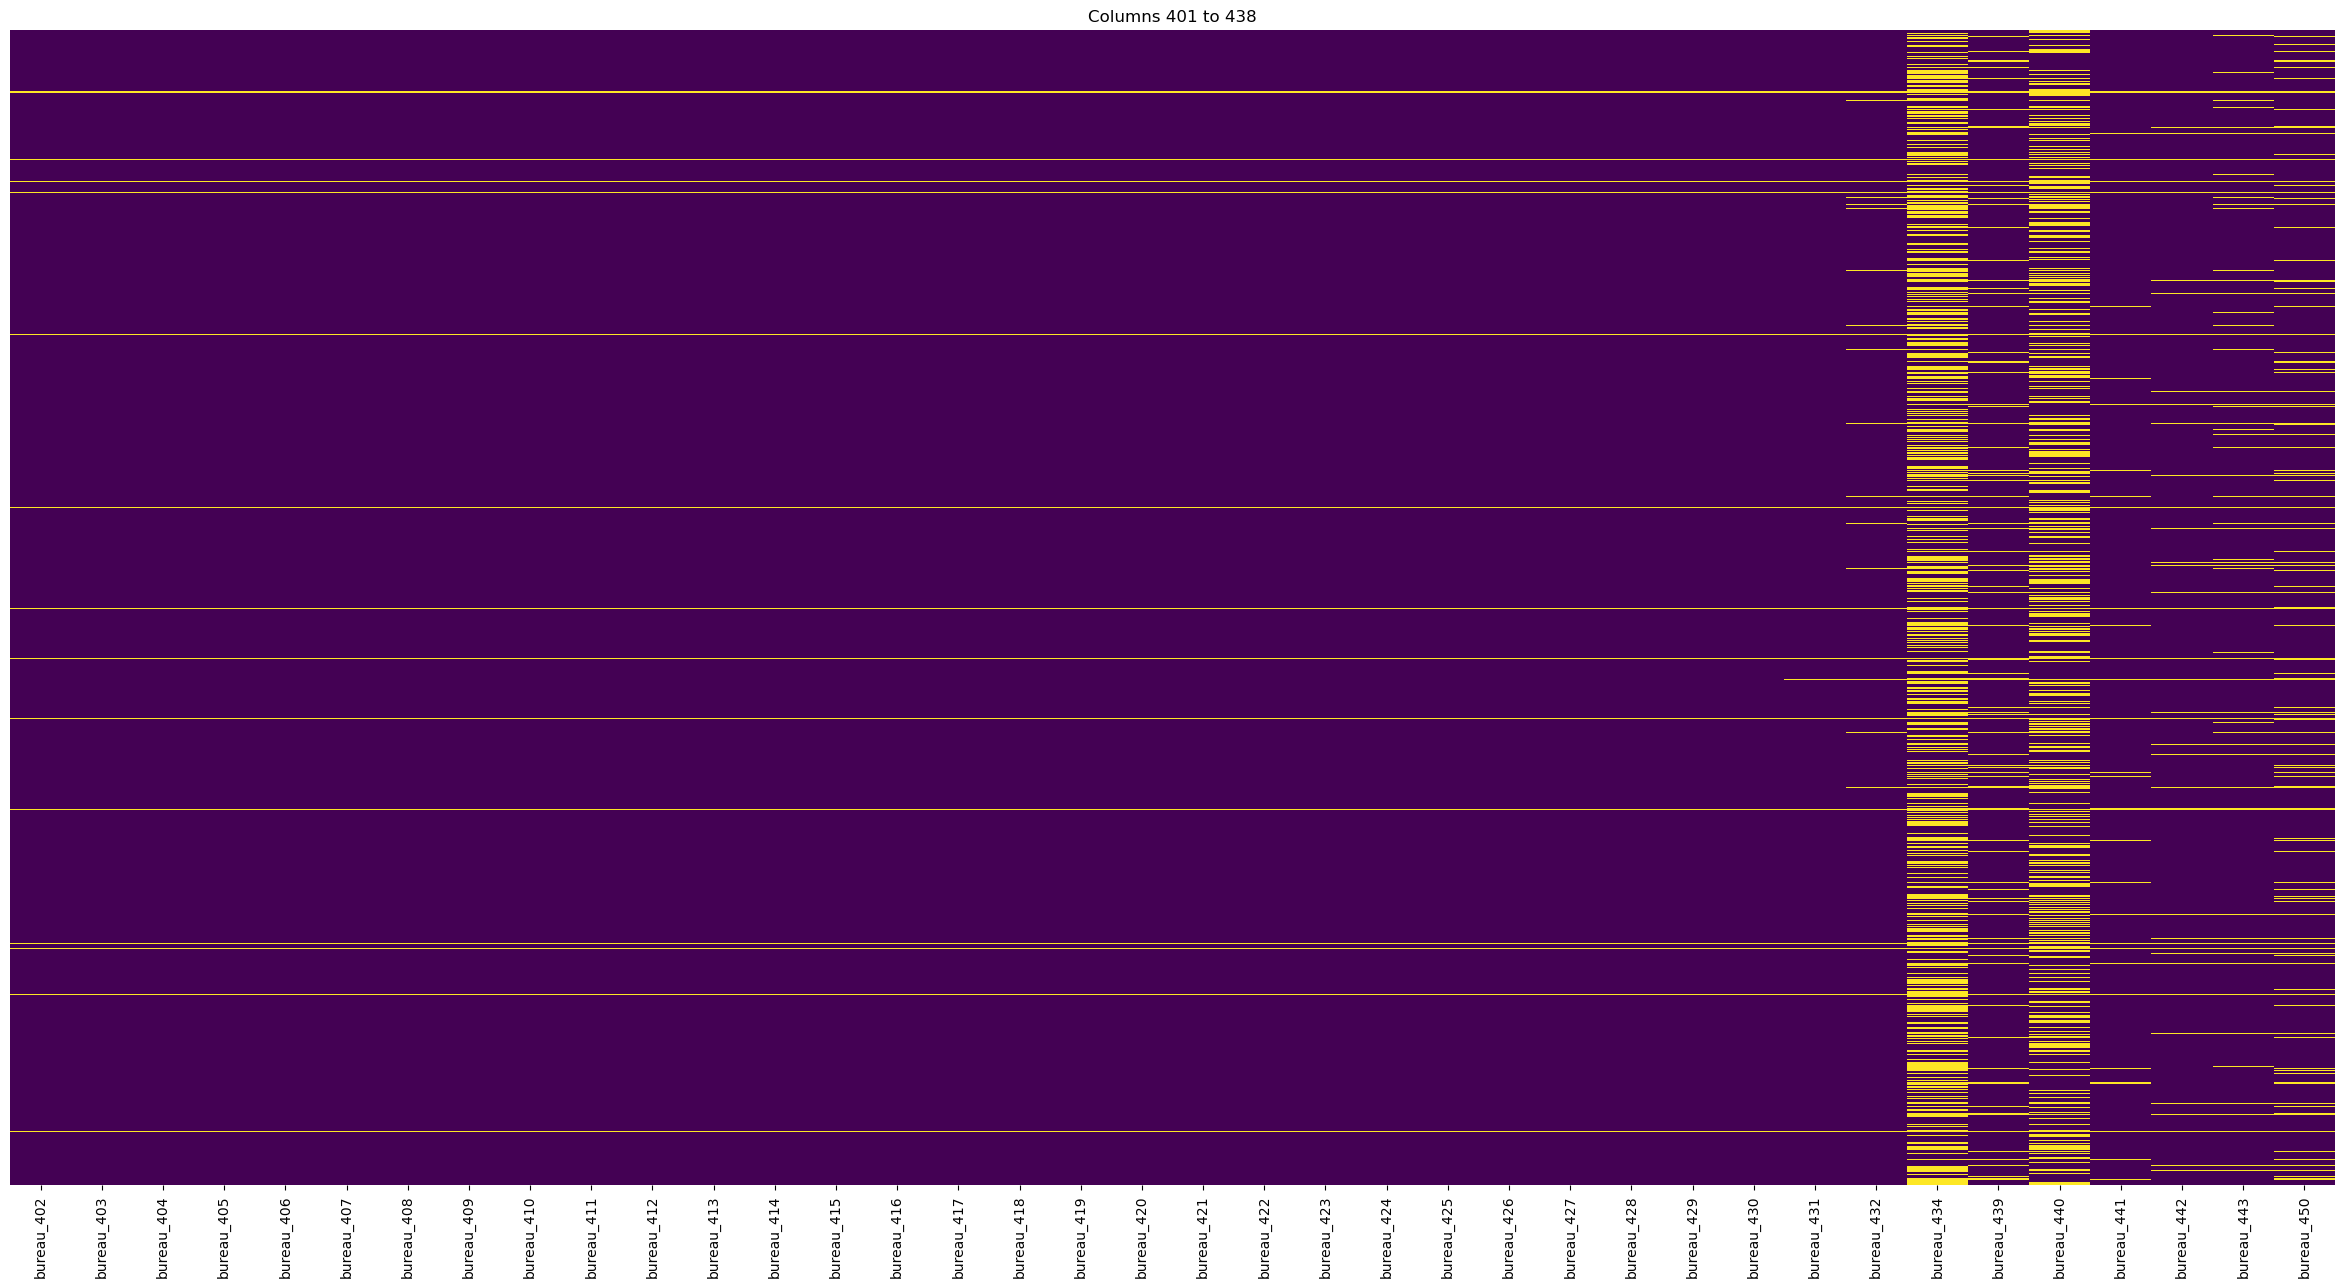

In [8]:
# empty values nikalne ke baad fir se check kiya

columns_per_plot = 50  # Number of columns per plot
total_columns = df_bureau.shape[1]  # Total number of columns
start = 0

# Loop through the DataFrame in chunks of columns_per_plot
for i in range(0, total_columns, columns_per_plot):
    plt.figure(figsize=(30,15))  # Adjust figure size as needed
    sns.heatmap(df_bureau.iloc[:, i:i + columns_per_plot].isnull(), 
                yticklabels=False, 
                cbar=False, 
                cmap='viridis')
    plt.title(f'Columns {i+1} to {min(i+columns_per_plot, total_columns)}')
    plt.show()


In [9]:
# khali values ko mean se fill karna

df_bureau.fillna(df_bureau.mean(), inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_20452\2560157192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bureau.fillna(df_bureau.mean(), inplace=True)


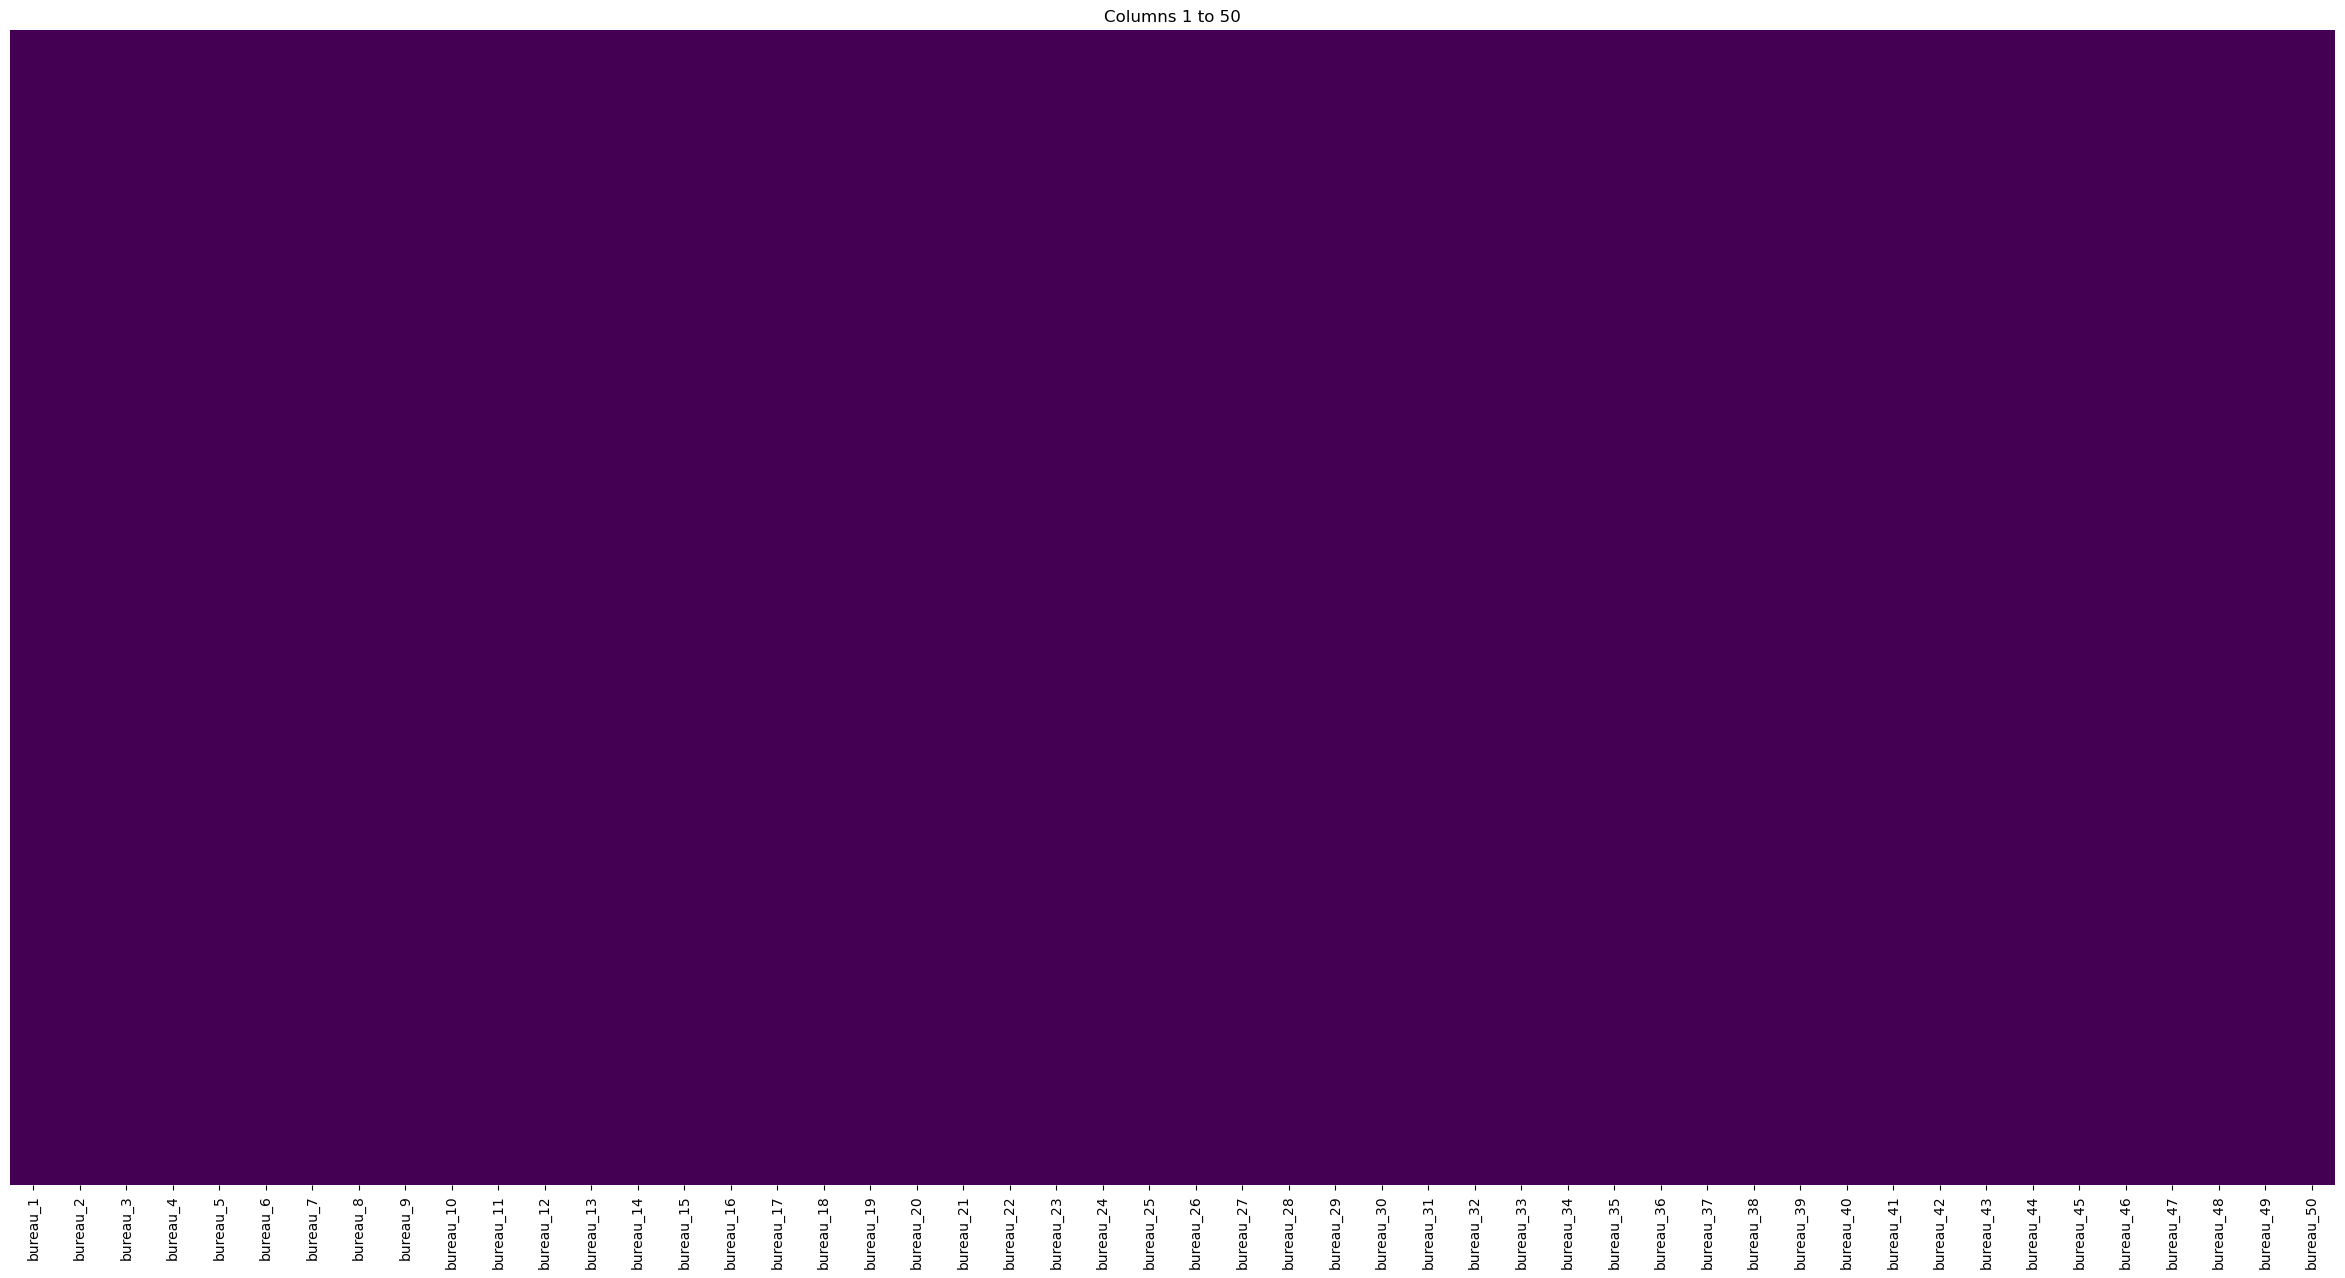

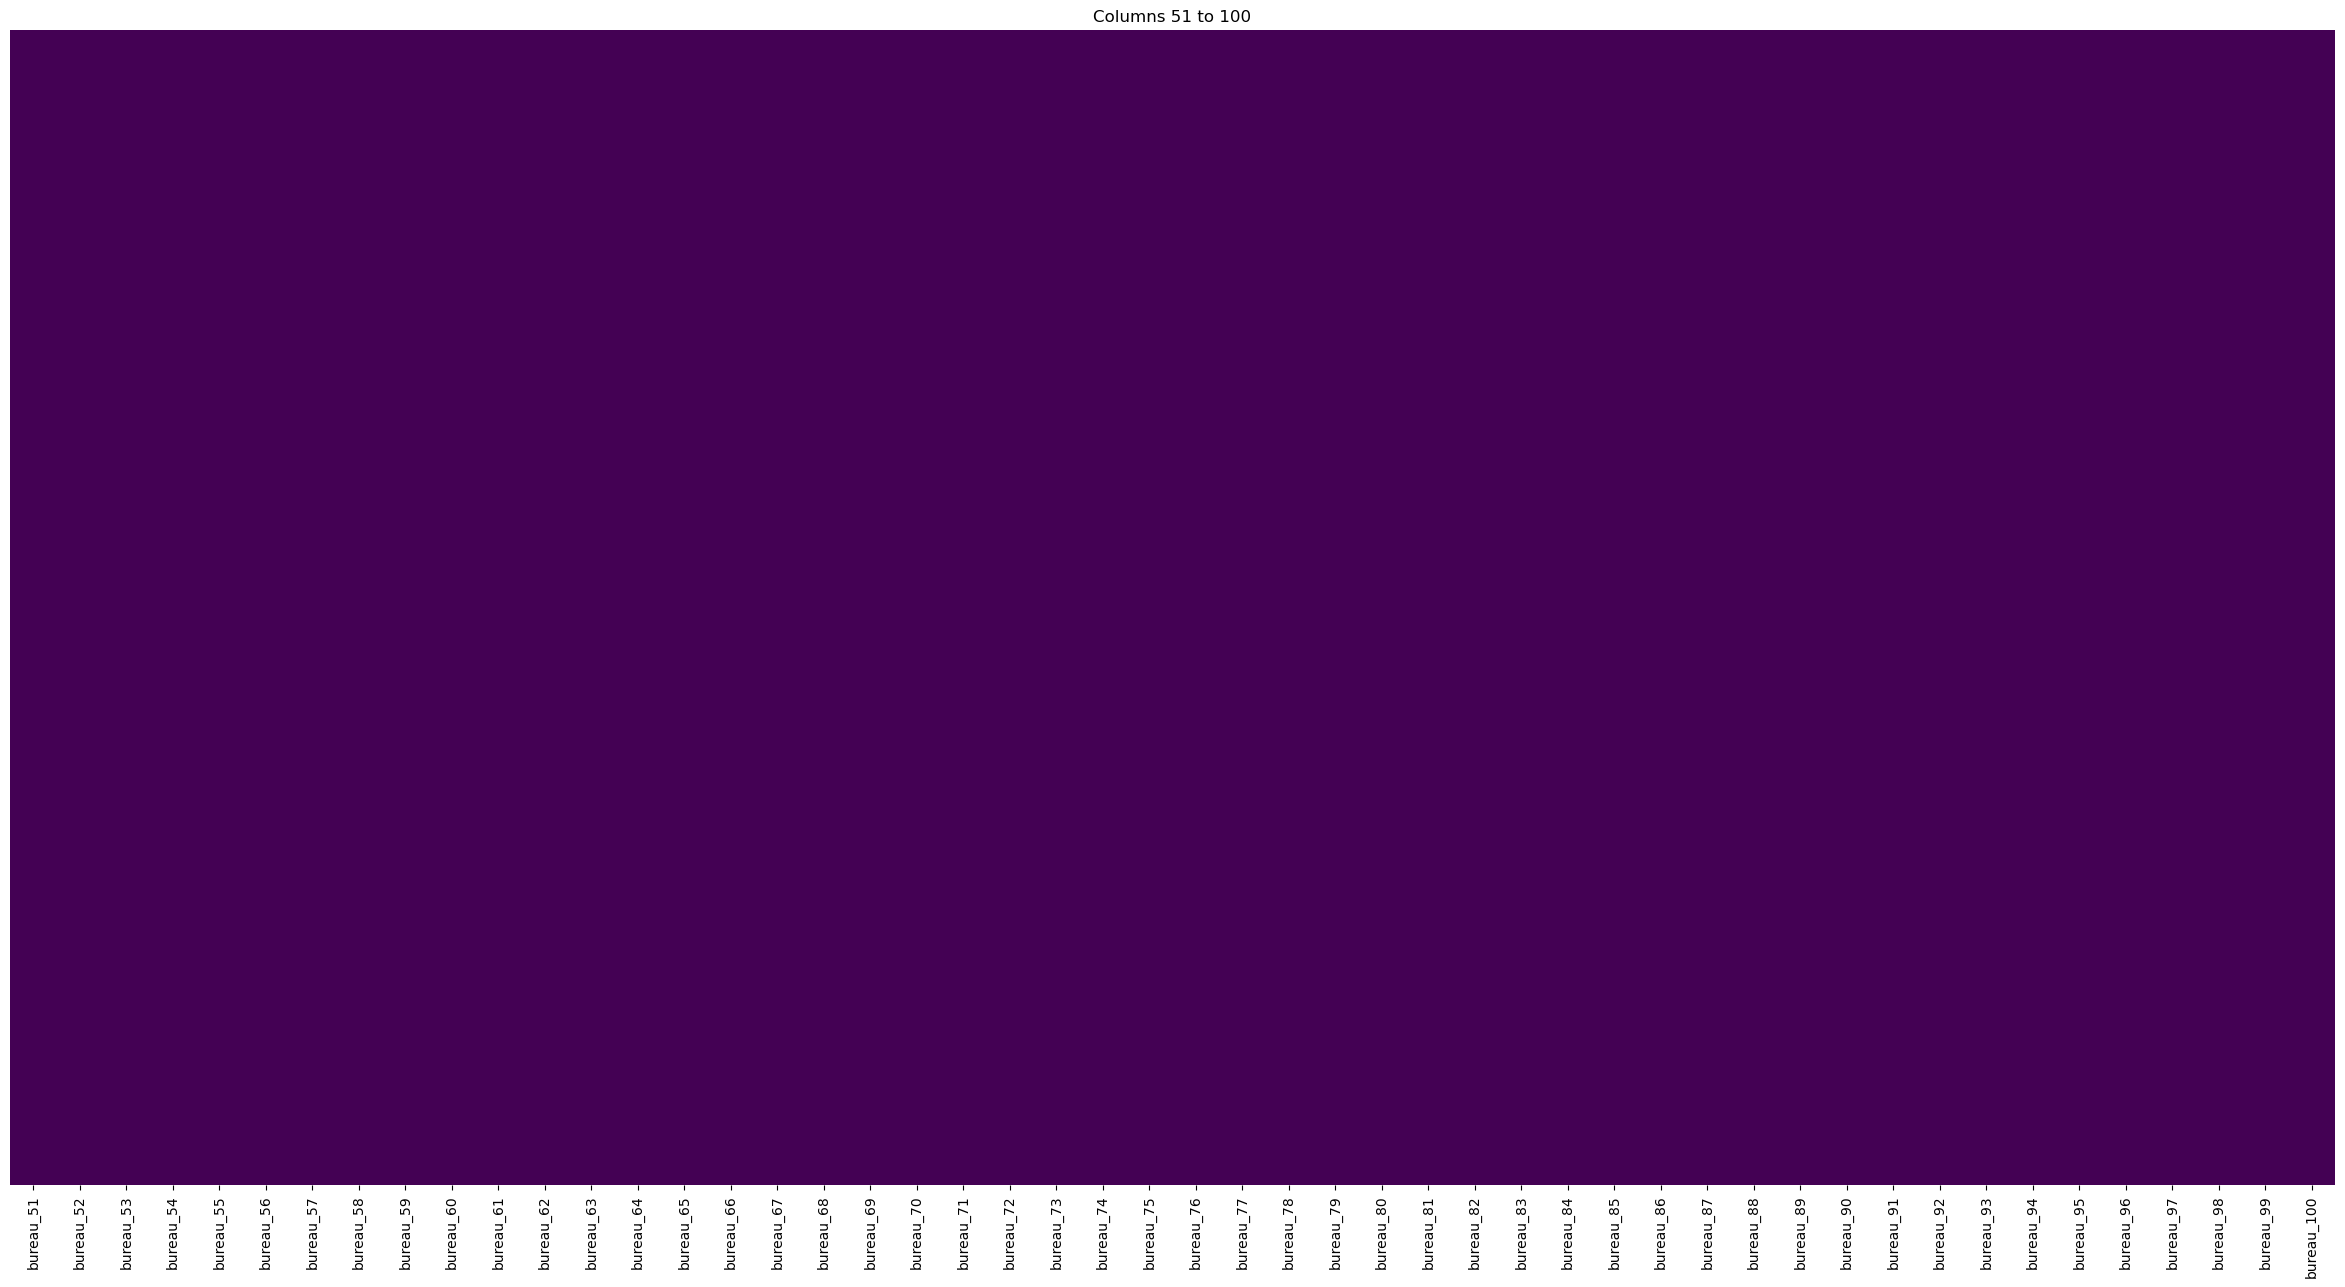

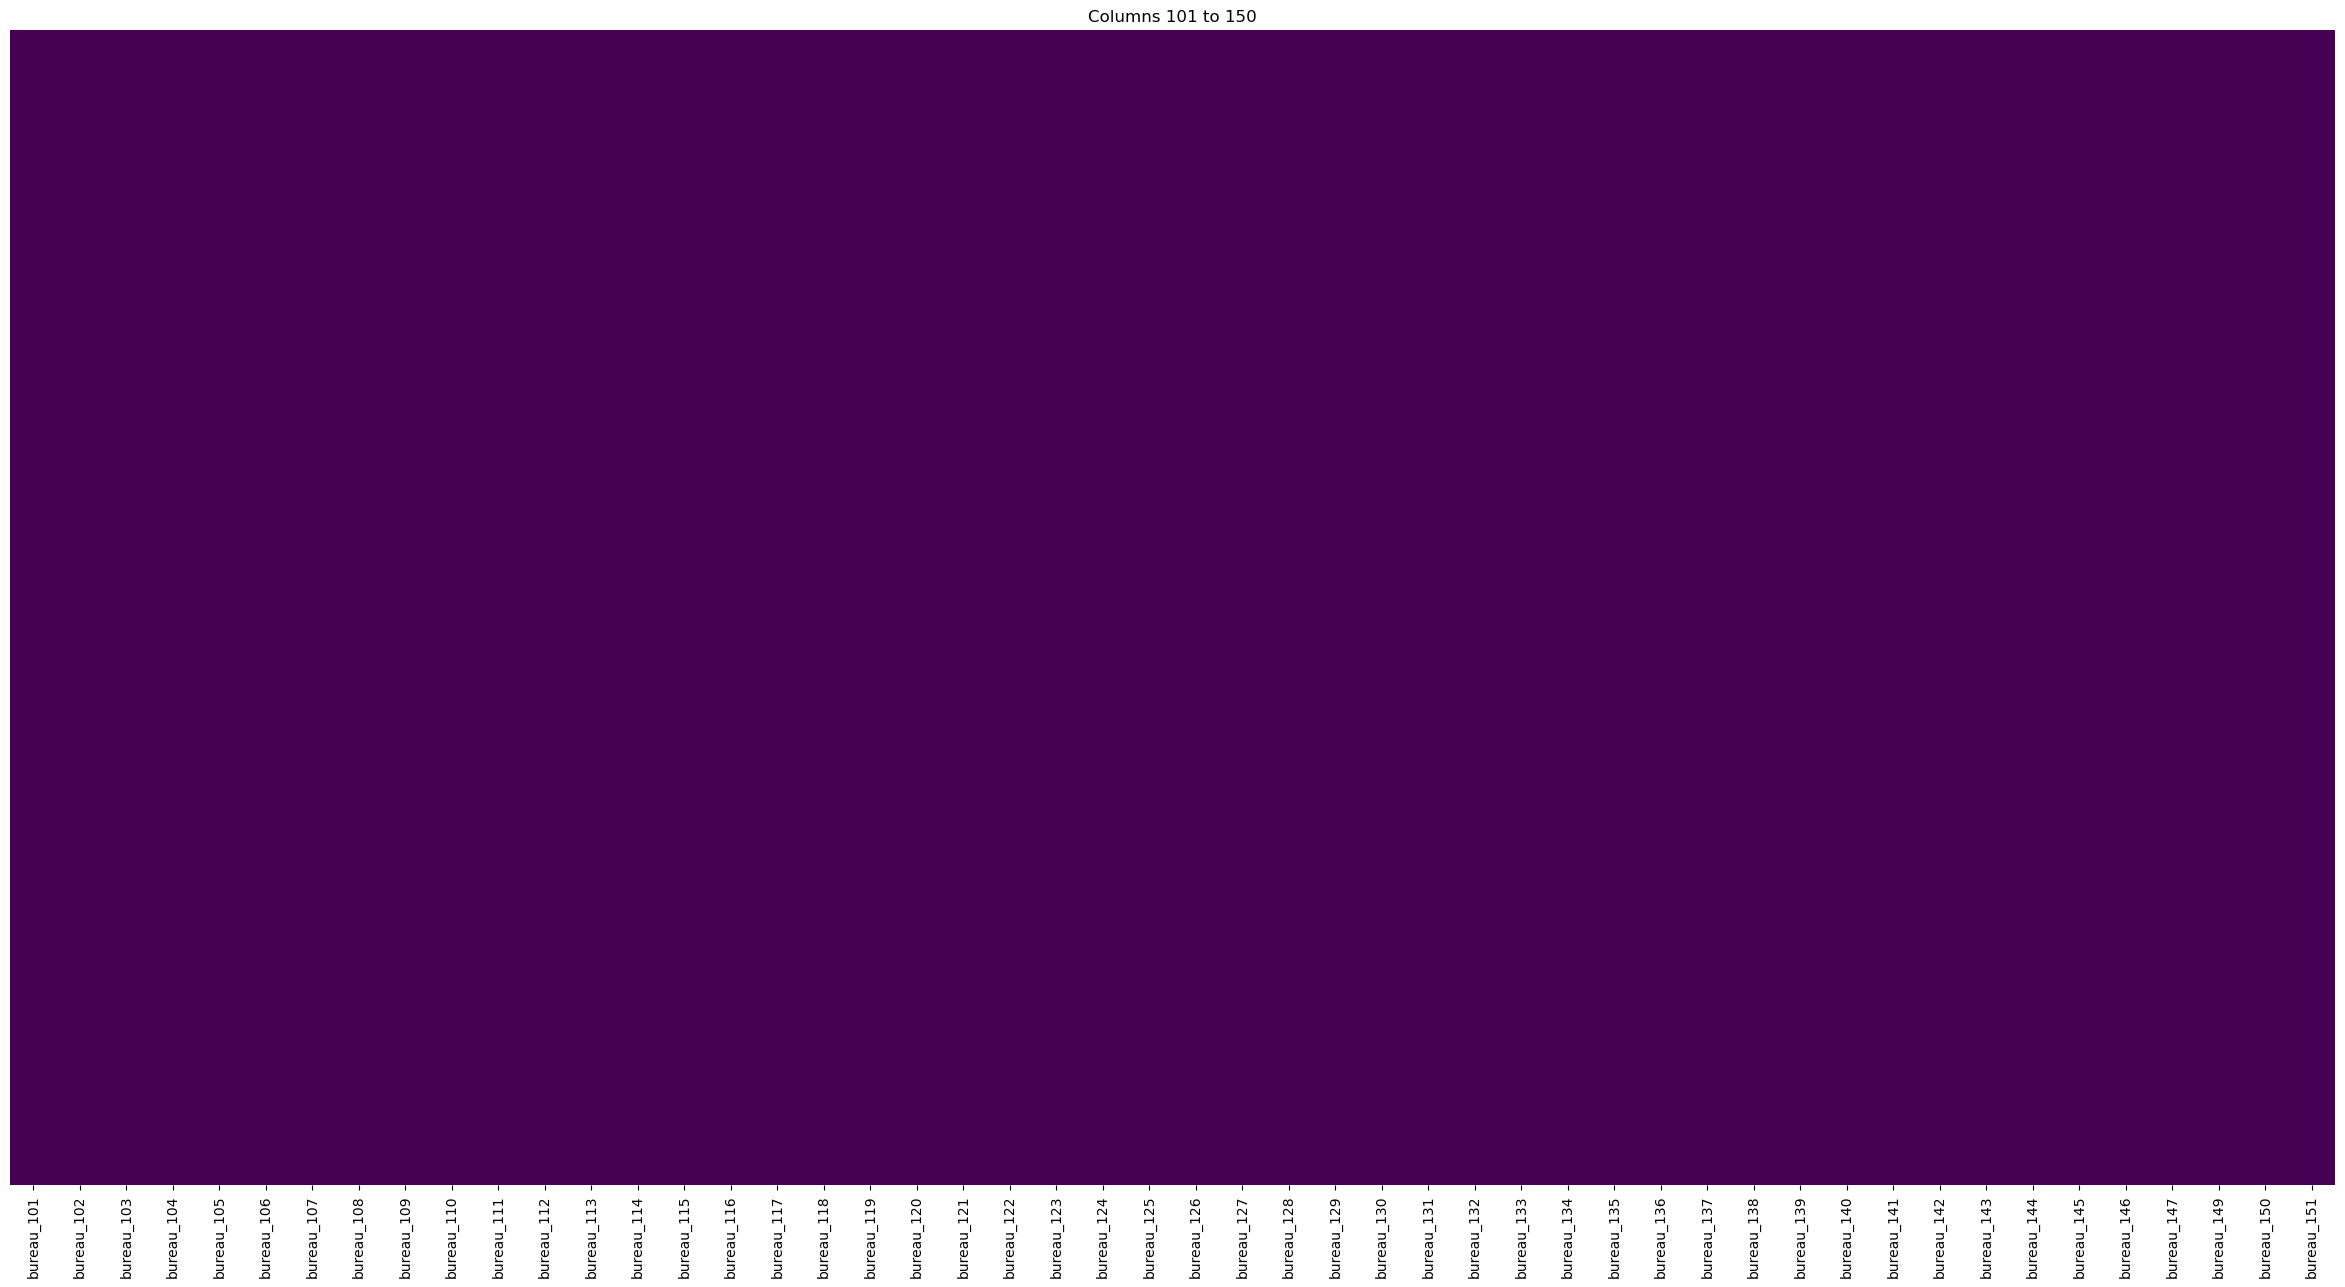

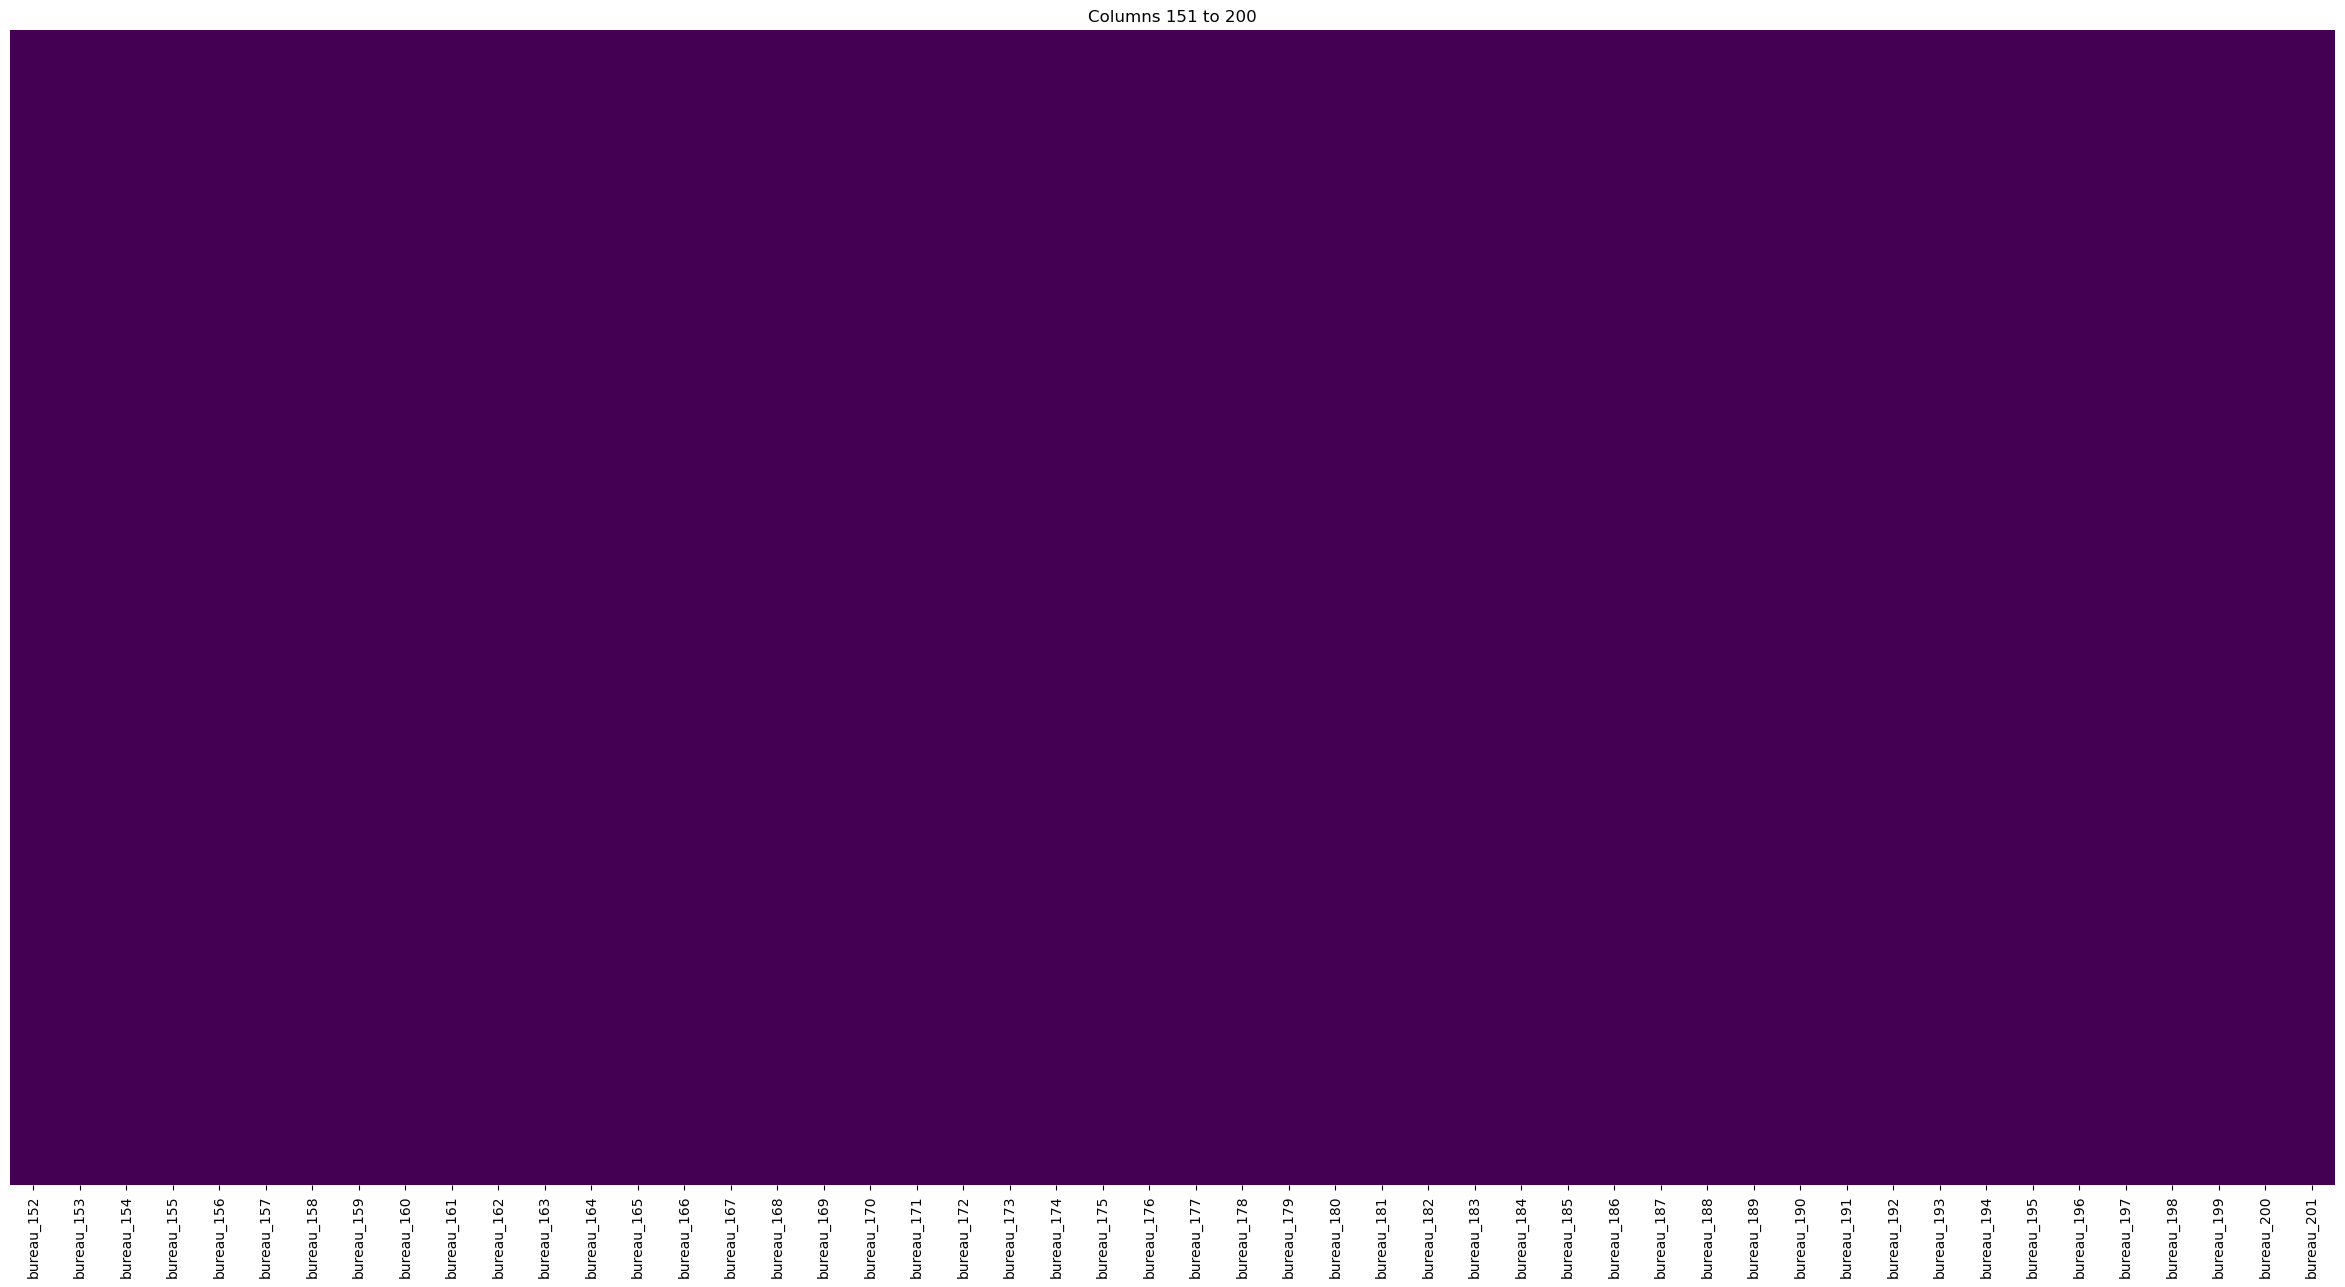

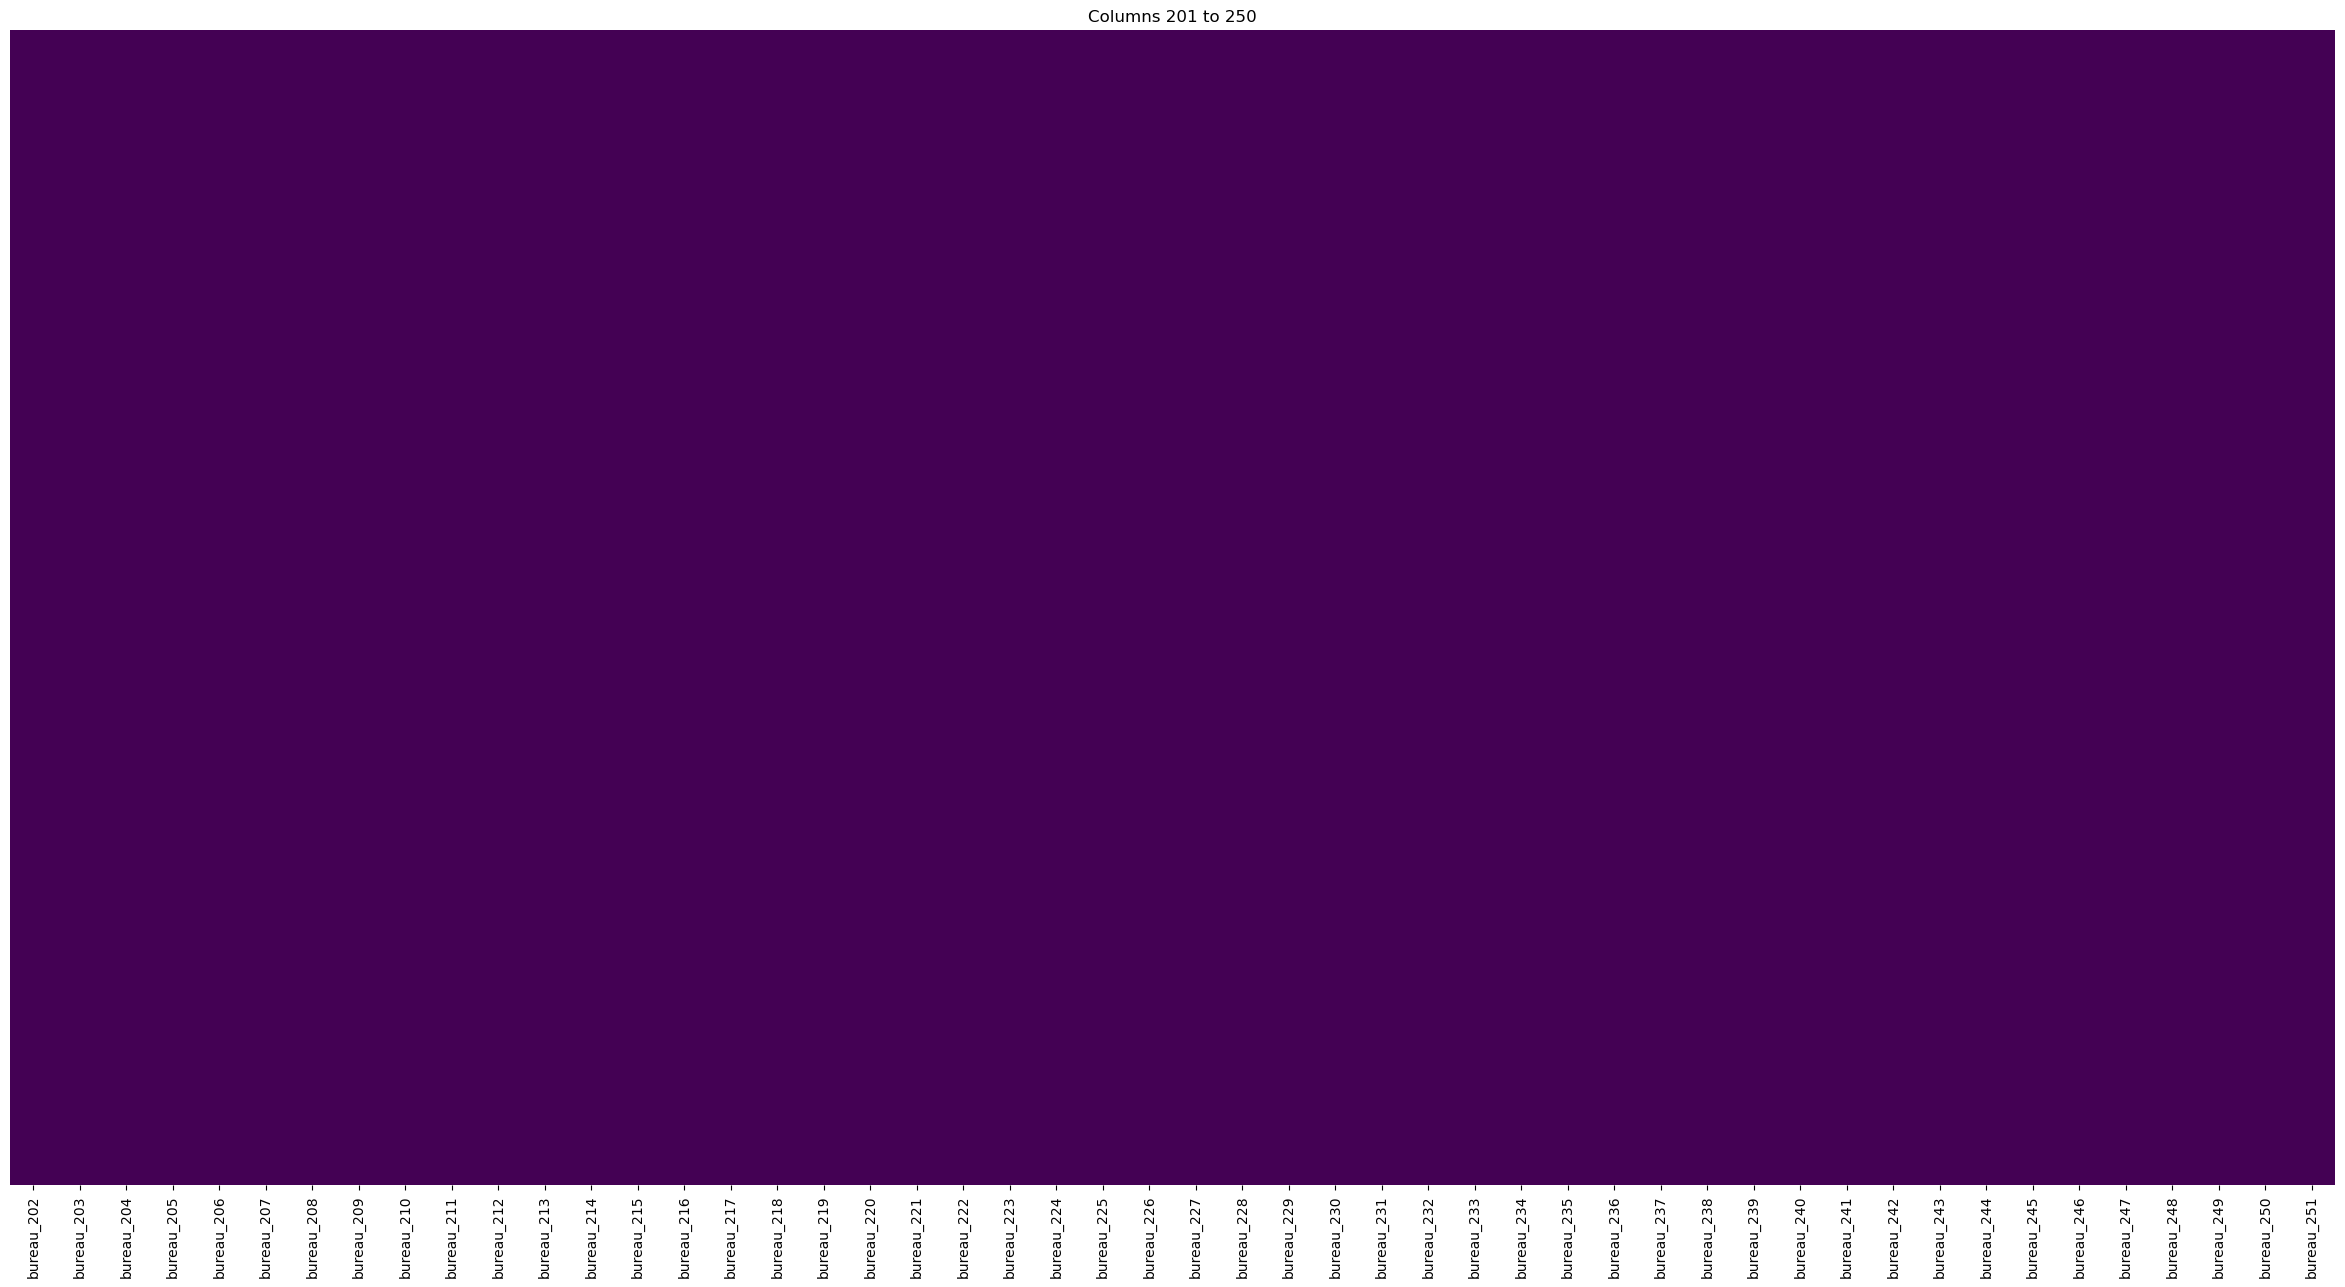

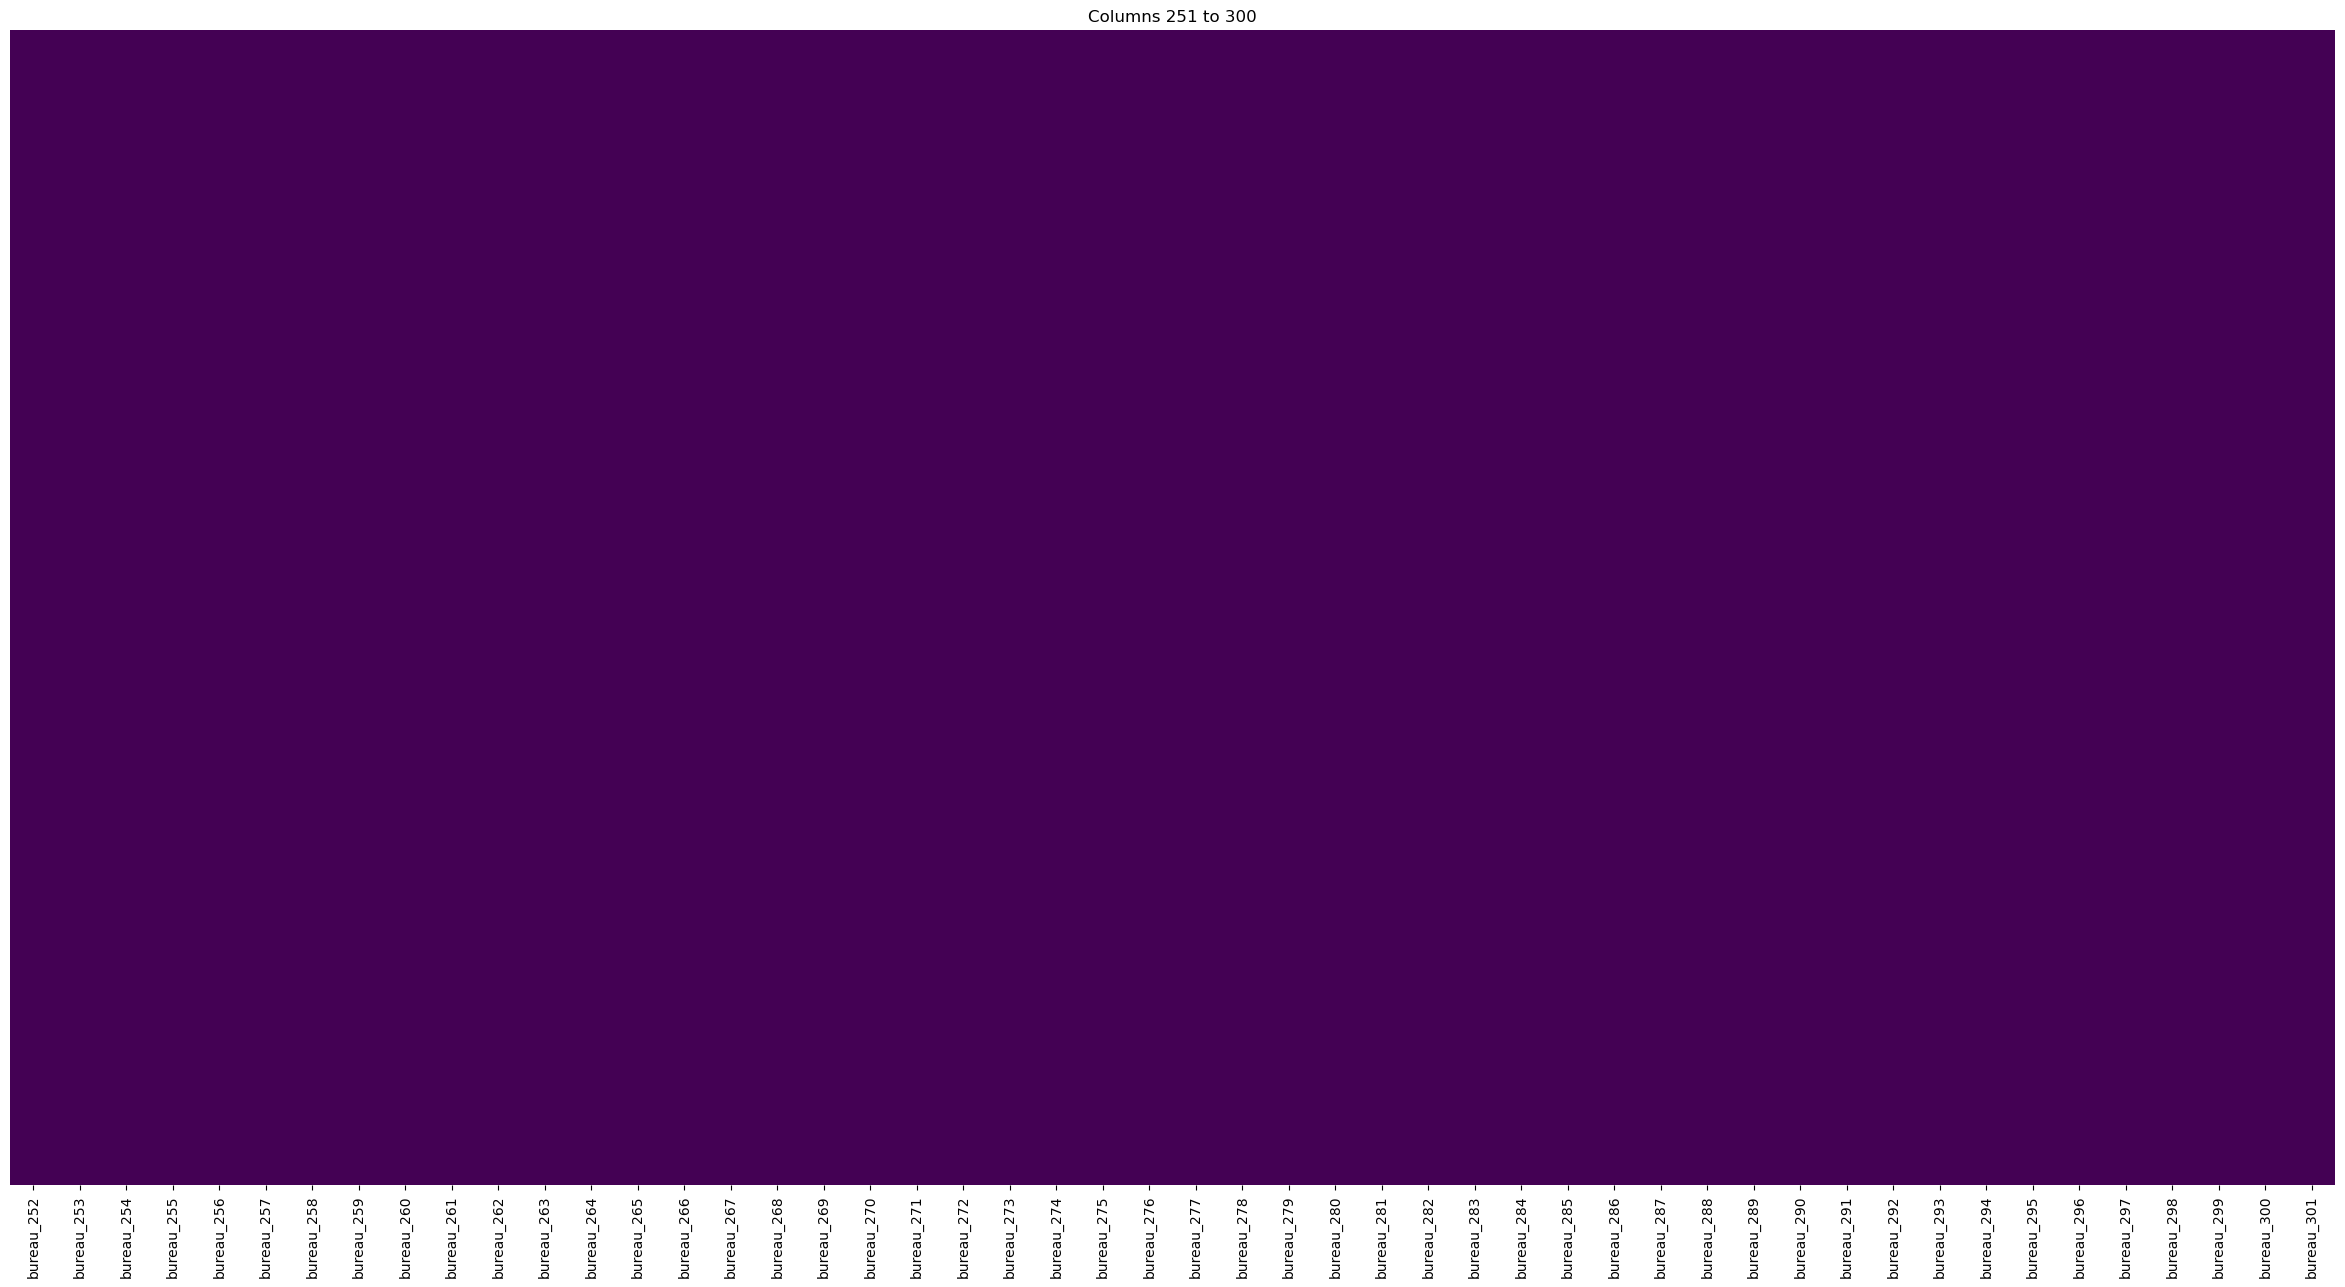

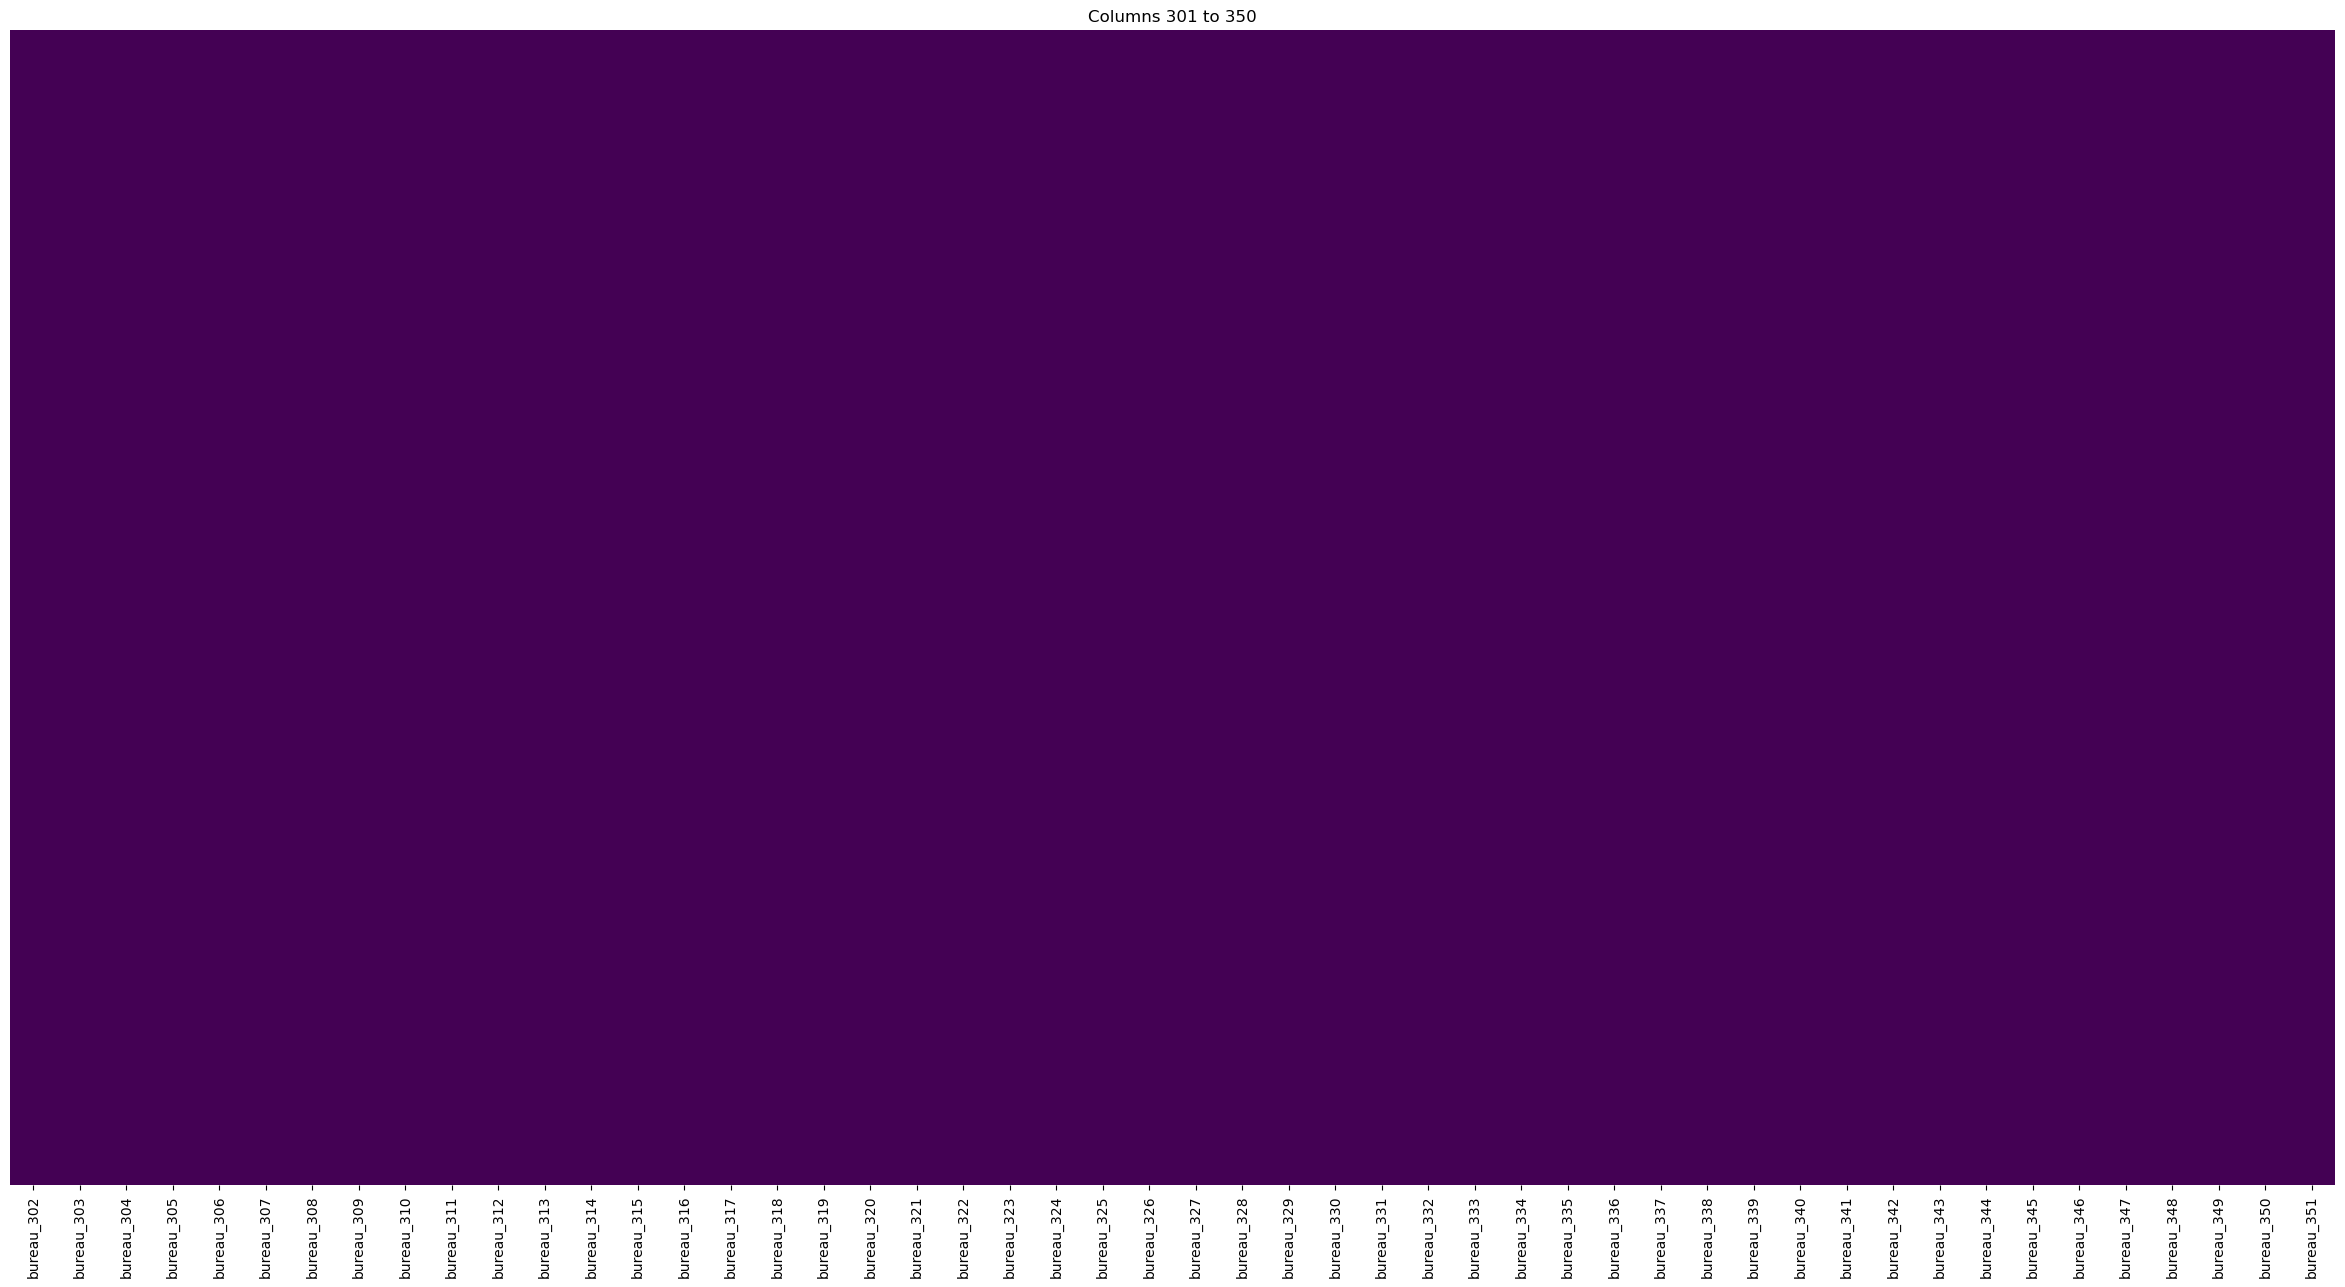

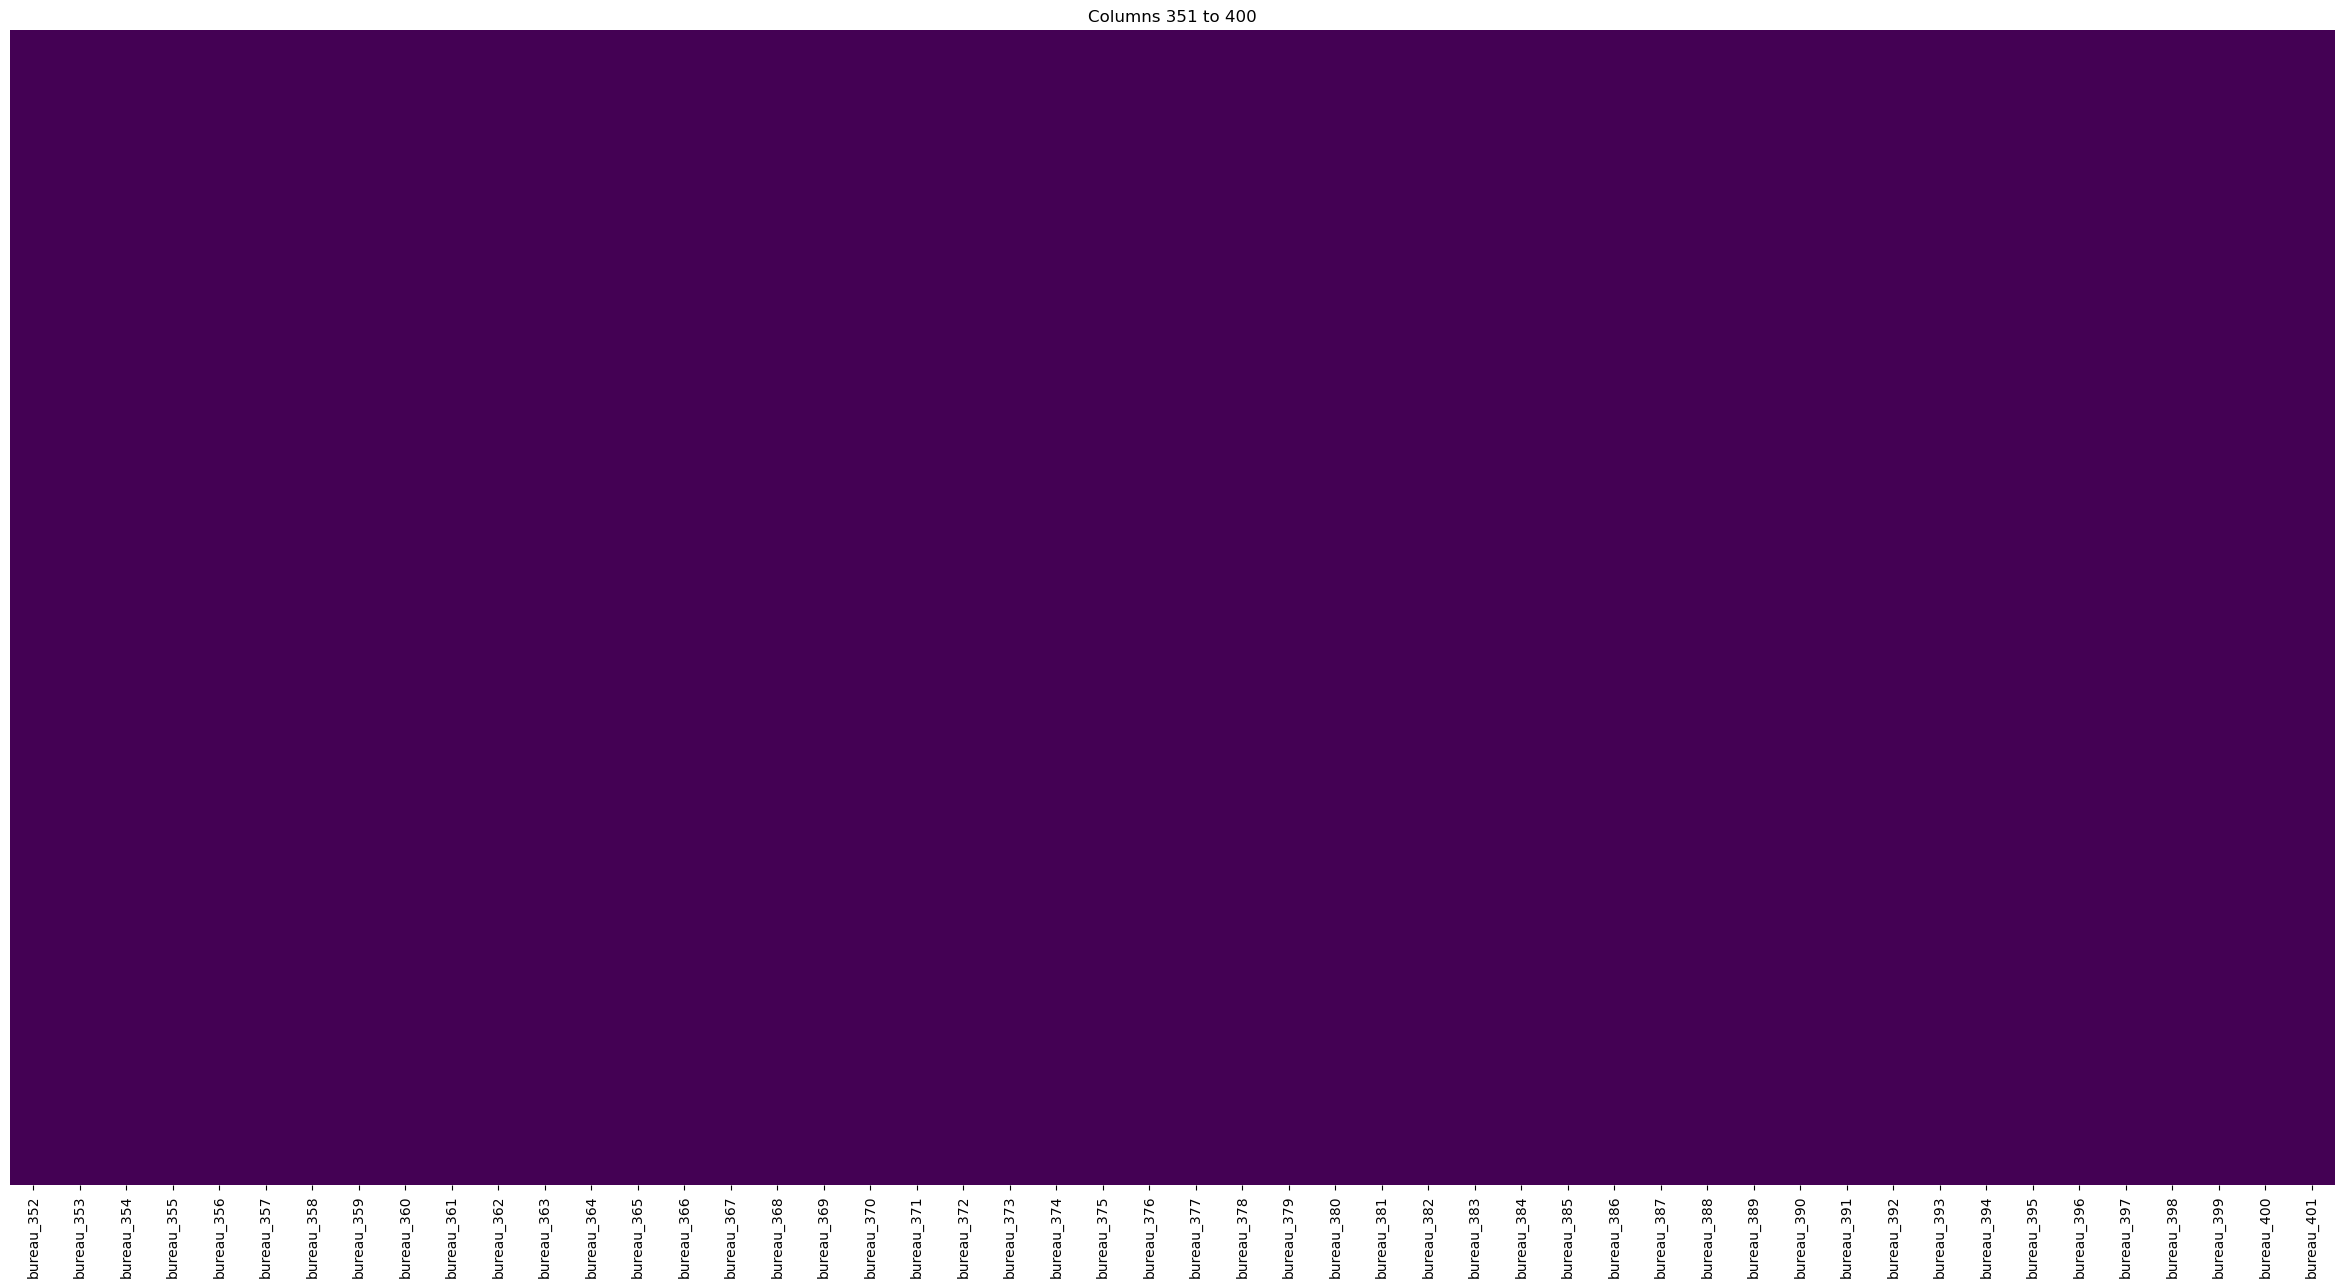

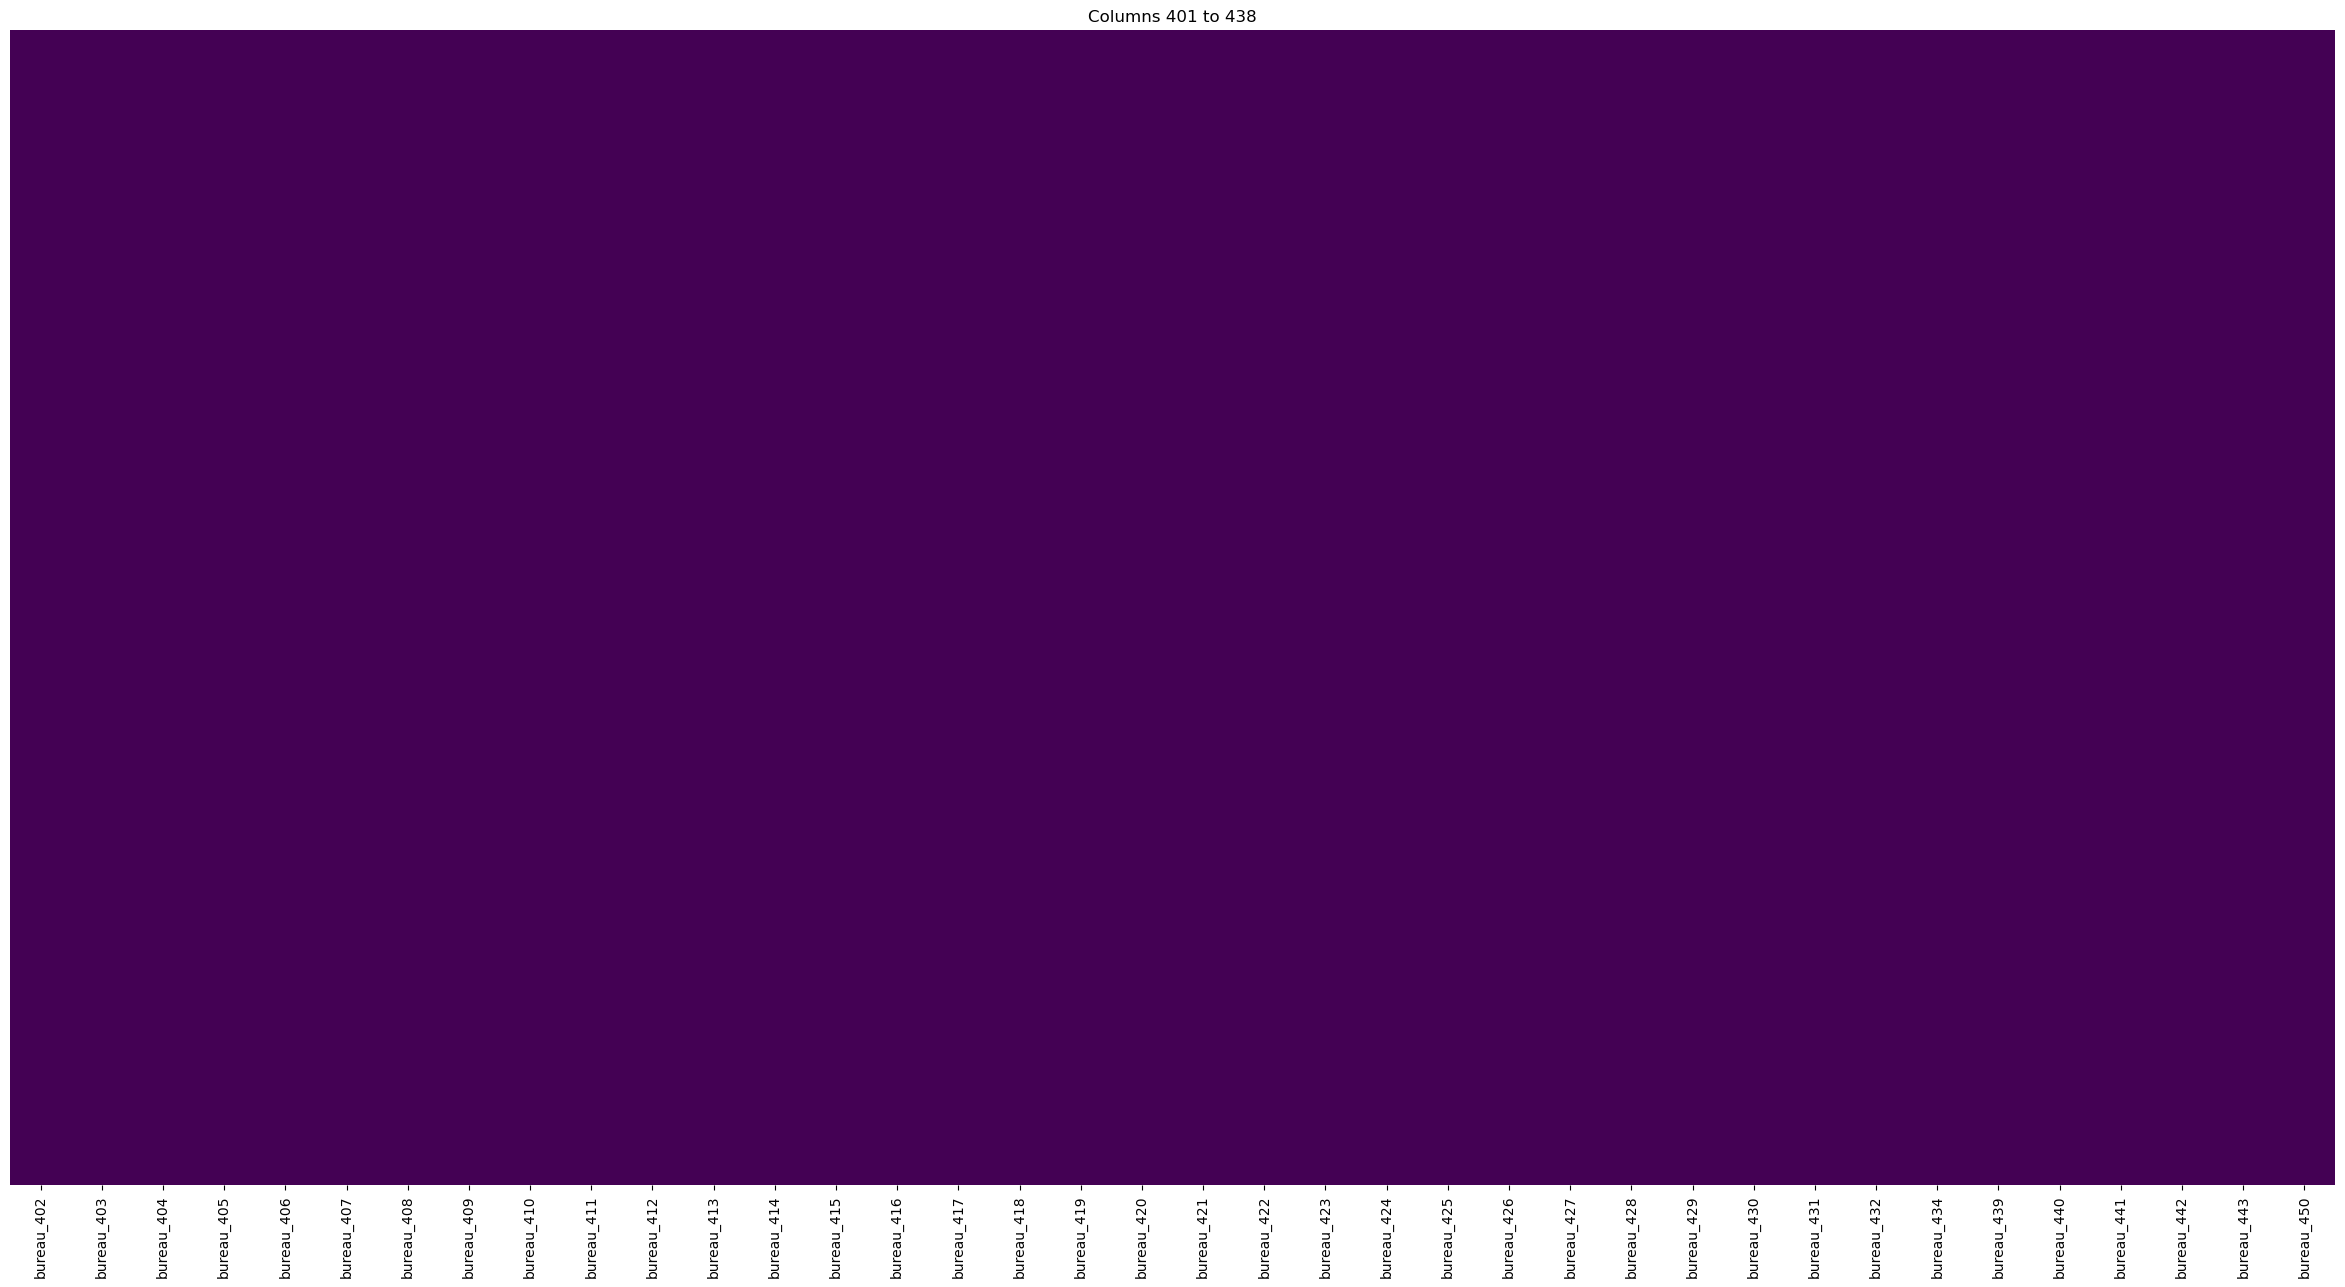

In [10]:
# again check

columns_per_plot = 50  # Number of columns per plot
total_columns = df_bureau.shape[1]  # Total number of columns
start = 0

# Loop through the DataFrame in chunks of columns_per_plot
for i in range(0, total_columns, columns_per_plot):
    plt.figure(figsize=(30,15))  # Adjust figure size as needed
    sns.heatmap(df_bureau.iloc[:, i:i + columns_per_plot].isnull(), 
                yticklabels=False, 
                cbar=False, 
                cmap='viridis')
    plt.title(f'Columns {i+1} to {min(i+columns_per_plot, total_columns)}')
    plt.show()


In [11]:
# now our data is completed 

In [12]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 438 entries, bureau_1 to bureau_450
dtypes: float64(438)
memory usage: 323.5 MB


In [13]:
df_bureau.describe()

,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,bureau_9,bureau_10,...,bureau_430,bureau_431,bureau_432,bureau_434,bureau_439,bureau_440,bureau_441,bureau_442,bureau_443,bureau_450
count,96806.000000,96806.000000,96806.000000,96806.0,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,...,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000,96806.000000
mean,0.384948,2.103406,0.402759,0.0,0.486461,0.621777,5.165762,2.244329,11.960298,2.097445,...,44.171089,0.336029,0.329434,0.968145,0.291594,0.180243,0.403407,0.495756,0.372183,0.327033
std,0.974970,3.624567,0.942350,0.0,0.863122,2.828959,4.374374,3.828166,9.825627,3.774632,...,37.145939,0.462656,0.372008,204.296194,0.392384,32.014010,35.727887,0.951759,32.154856,0.503554
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-6.532311,-6.532311,-25038.000000,-6.532311,-9960.000000,-4.582061,-6.870207,-9960.000000,-6.532311
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,...,20.500000,0.101467,0.085892,0.292121,0.044431,0.000038,0.056148,0.227862,0.231356,0.062777
50%,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,4.000000,1.000000,10.000000,1.000000,...,32.111111,0.321259,0.312673,0.779482,0.237678,0.180243,0.255157,0.515769,0.495599,0.296320
75%,0.384948,3.000000,0.000000,0.0,1.000000,0.000000,7.000000,3.000000,16.000000,3.000000,...,53.000000,0.510068,0.507617,0.968145,0.458677,0.435898,0.441248,0.734277,0.737340,0.509834
max,76.000000,91.000000,25.000000,0.0,15.000000,167.000000,57.000000,172.000000,143.000000,171.000000,...,349.000000,86.393000,50.312312,58425.000000,49.070039,13.901576,11114.400000,233.225352,85.516320,85.516320


In [14]:
onus_attributes = [col for col in df.columns if col.startswith("onus")]
transaction_attributes = [col for col in df.columns if col.startswith("transaction")]

bureau_enquiry_attributes = [col for col in df.columns if col.startswith("bureau_enquiry")]

In [15]:
column_indices = list(range(667,1118))
bureau_attributes = df.iloc[:, column_indices]  # Example: Select columns from index 10 to 29


In [16]:
for col in bureau_attributes:
   
   print(bureau_attributes[col].skew())

12.642854017850965
4.986518693490179
4.0752646881530765
0.0
2.8388876929951072
15.871334110864774
1.719180977456001
8.401290844689353
1.793744688160806
8.667486612797282
1.8693441156259865
1.9244941310716739
4.64903138596616
3.008651934479213
2.971495559393325
0.0
3.831478758102588
10.485173062179541
1.4031270807901695
2.886048777101803
1.3708778610342096
1.3120243782861676
4.565253999246911
2.7506968599006156
2.9663189232300677
0.0
3.7205710529570526
10.804287027532215
1.3588379483912991
2.87783519267685
1.220862634909889
3.0371281453686434
1.28746558043041
1.1849307378816245
20.557060617782074
11.863387383034214
32.68924501288653
0.0
7.071924557261093
23.06350463711946
62.452968148492864
89.55439456662224
50.42980061894465
19.397111550445086
14.542814438829536
22.01522397189229
0.0
12.698134119568445
17.066549620490974
55.45045313684868
131.96701203617567
64.76916533162822
16.516635061161566
7.096079988991889
22.19581797637266
0.0
16.508222492743908
17.609527477676494
20.644414395011

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(df_bureau)

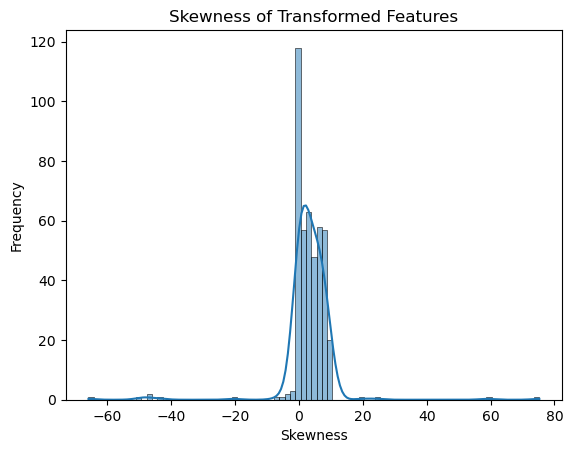

In [18]:
skewness_transformed = pd.DataFrame(df_transformed).skew()

# Histogram of skewness
sns.histplot(skewness_transformed, kde=True)
plt.title('Skewness of Transformed Features')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()

In [19]:
skewness_transformed = 1 / (skewness_transformed + 1)  # Add 1 to avoid division by zero

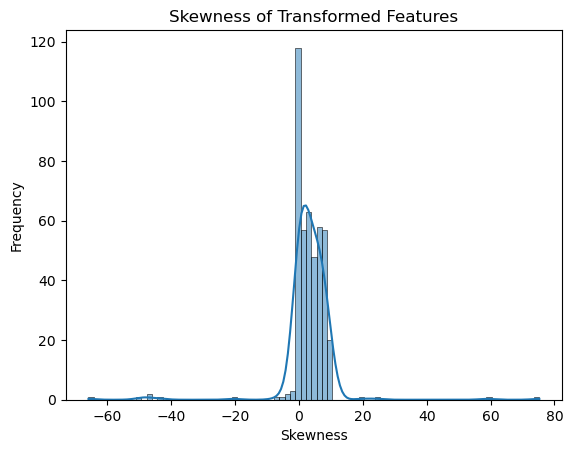

In [20]:
skewness_transformed = pd.DataFrame(df_transformed).skew()

# Histogram of skewness
sns.histplot(skewness_transformed, kde=True)
plt.title('Skewness of Transformed Features')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()

In [21]:
#import numpy as np
#df_bureau = np.log1p(df_bureau)  # log1p to handle zeros safely

In [22]:
'''from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['transformed_feature'] = pt.fit_transform(df[['feature']])
'''

"from sklearn.preprocessing import PowerTransformer\npt = PowerTransformer(method='yeo-johnson')\ndf['transformed_feature'] = pt.fit_transform(df[['feature']])\n"

In [46]:
# constant feature remove 
# outlier feature hatao
# variance threshold ki help se feature remove (scikit learn use) 
# random forest mein train karna hai

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [56]:
skewness_transformed=pd.DataFrame(skewness_transformed)
skewness_transformed.head(20)

,0
0,1.165843
1,0.183918
2,1.210471
3,0.000000
4,0.719630
5,1.885427
6,-0.011057
7,0.102096
8,-0.018825
9,0.139822


In [58]:
from sklearn.feature_selection import VarianceThreshold

# Set threshold to 0 to remove constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit()
df_filtered = skewness_transformed[skewness_transformed.columns[constant_filter.get_support()]]

TypeError: VarianceThreshold.fit() missing 1 required positional argument: 'X'